In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Case Study of Georgia (and Scott Hersey)'s Office

In [2]:
file = "data/combined_milas_hall/Flo2.3-A2-26.csv"
df = pd.read_csv(file)
df.head()

timestamp  DprPos  FlSpt  HwVlvPos      RmTmp  RmTmpCspt  \
0  2020-10-09 10:00:00   100.0  400.0   0.00000  62.570312  63.078125   
1  2020-10-09 10:15:00   100.0  400.0  78.90625  62.210938  63.500000   
2  2020-10-09 10:30:00   100.0  594.0   0.00000  62.976562  62.992188   
3  2020-10-09 10:45:00   100.0  400.0   8.59375  62.539062  63.125000   
4  2020-10-09 11:00:00   100.0  413.0   0.00000  62.664062  63.132812   

   RmTmpHpst   SaFl  
0  62.578125  431.0  
1  63.000000  444.0  
2  62.492188  444.0  
3  62.625000  451.0  
4  62.632812  450.0

In [ ]:
# filtered_df = df[100000:300000]
filtered_df = filtered_df.copy()  # Avoid "Setting with a copy" warning
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])
filtered_df['date'] = filtered_df['timestamp'].dt.date

/var/folders/tv/r11p_97n1pj07q4jqfpjv5440000gn/T/ipykernel_9793/513020329.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


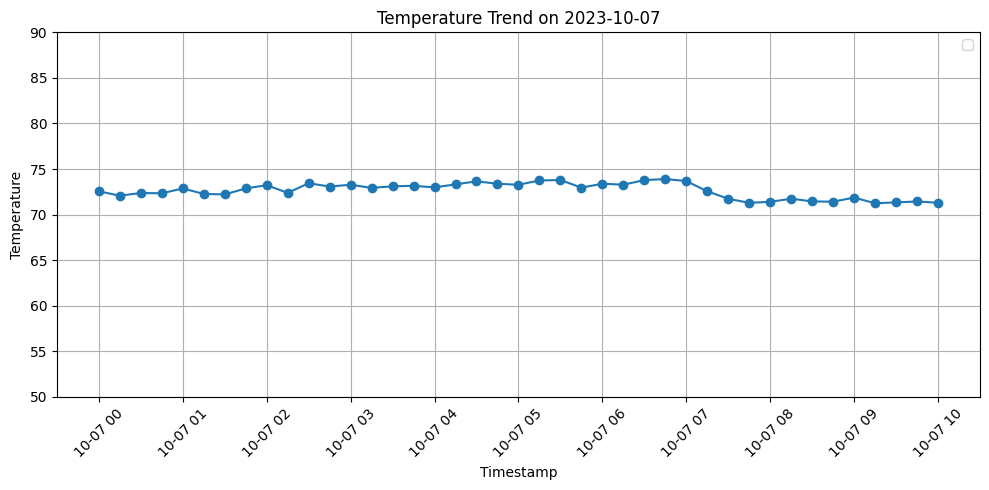

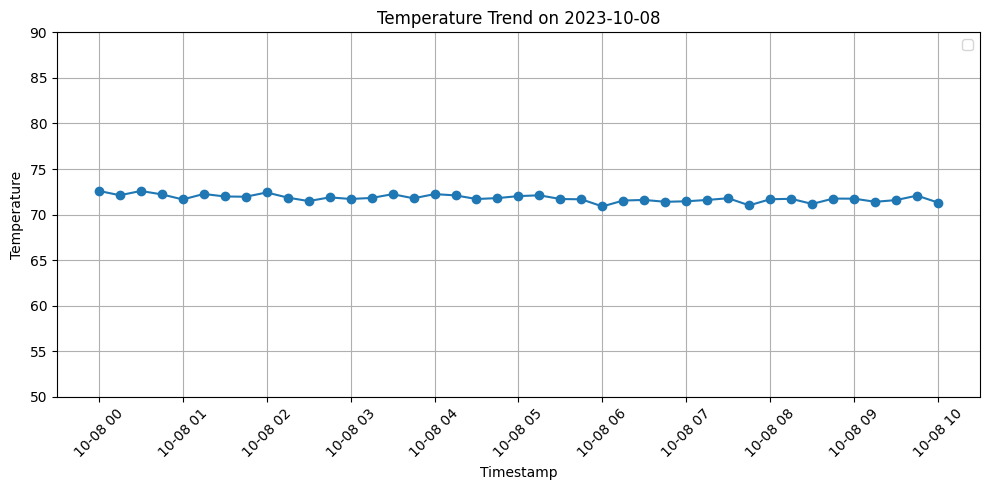

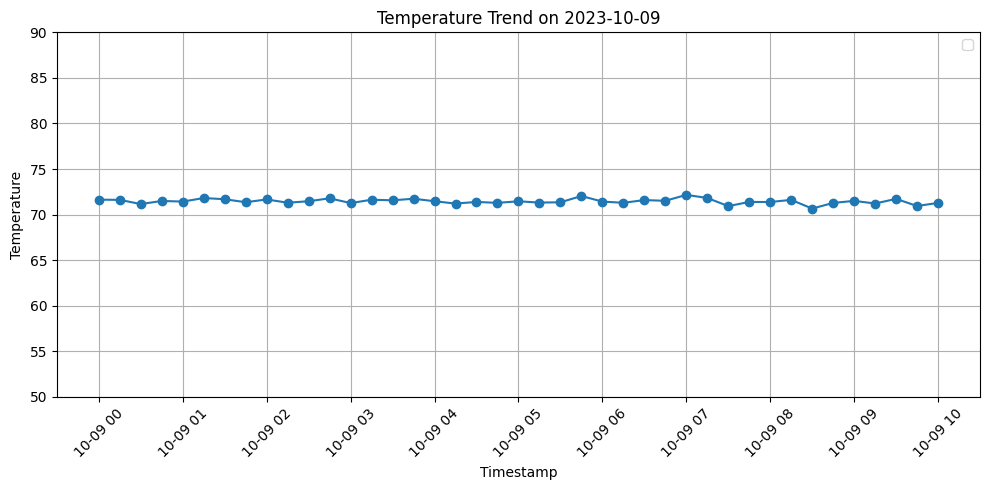

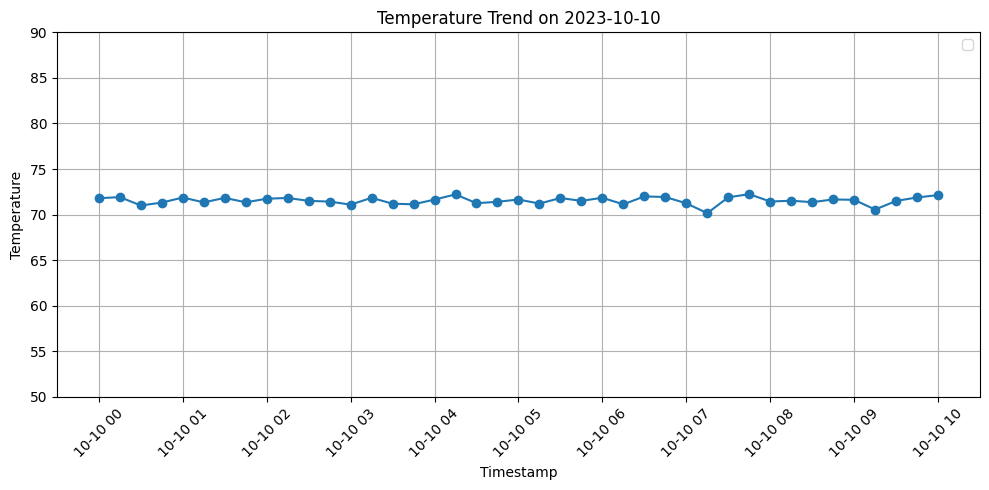

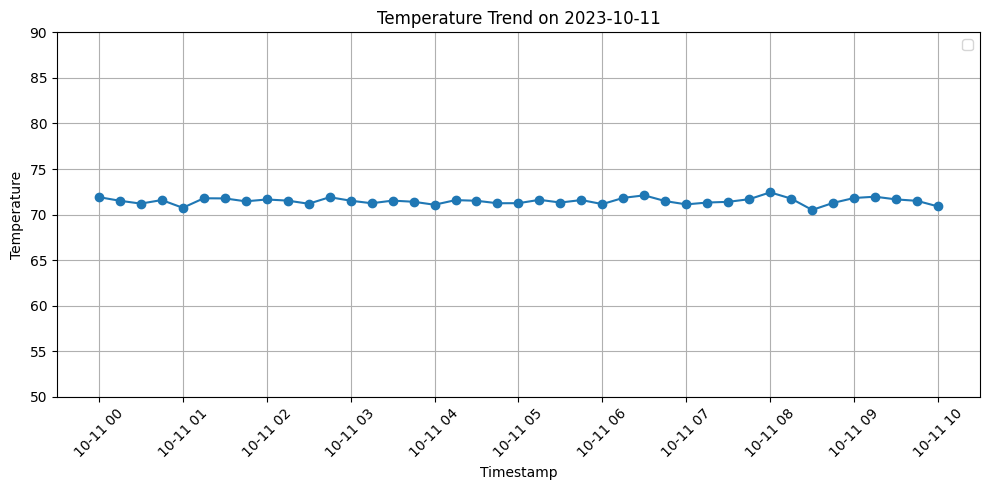

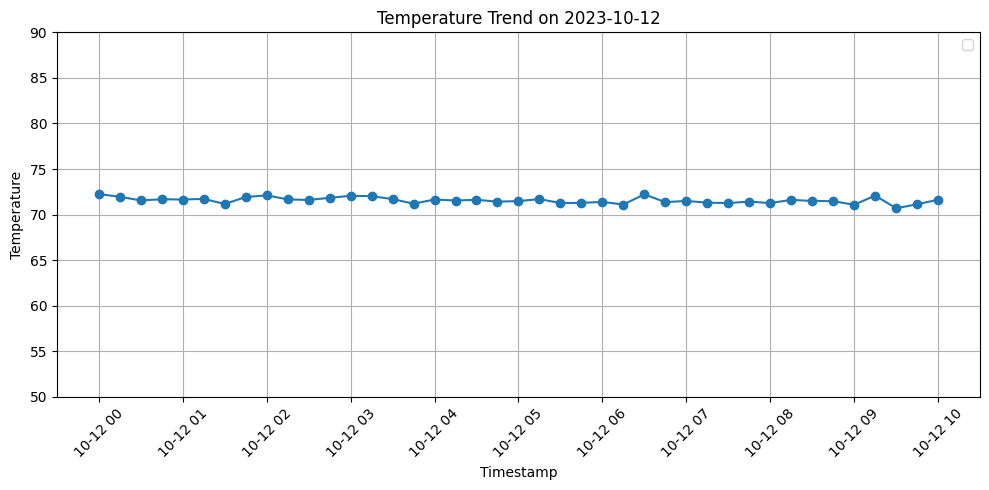

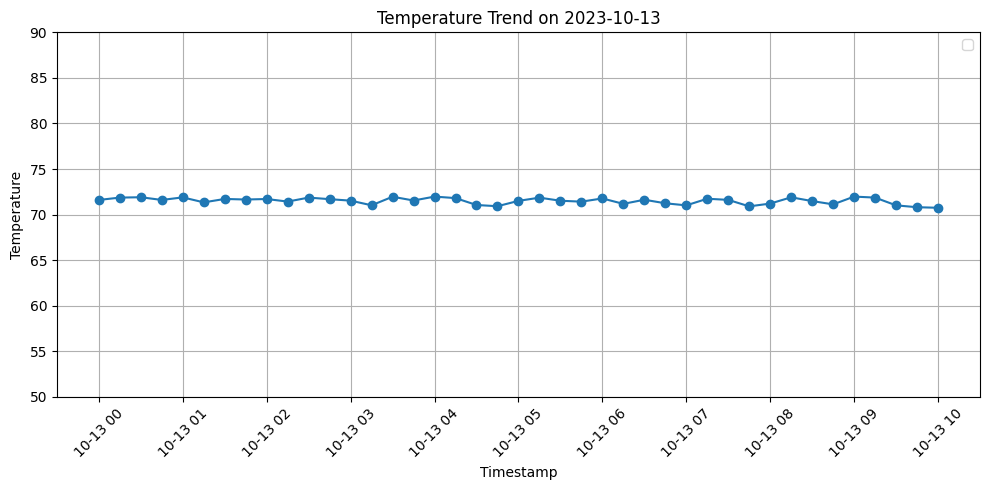

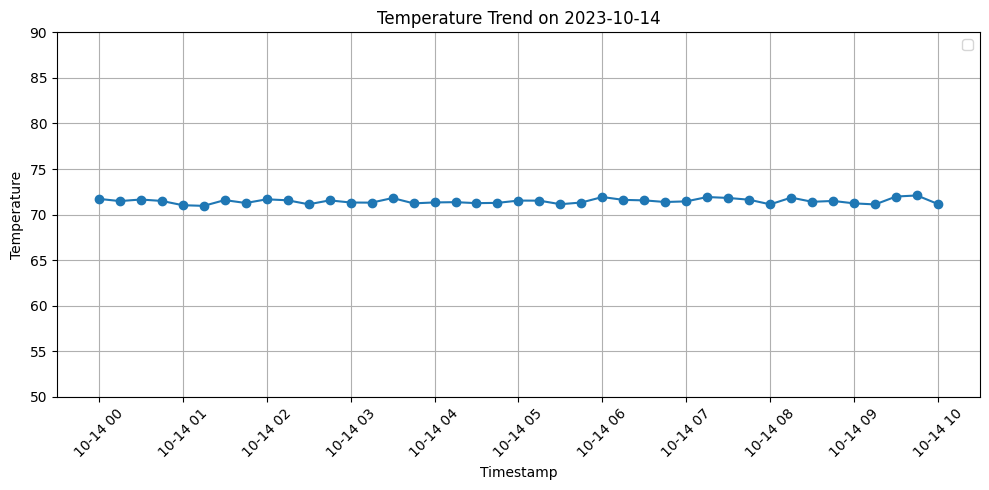

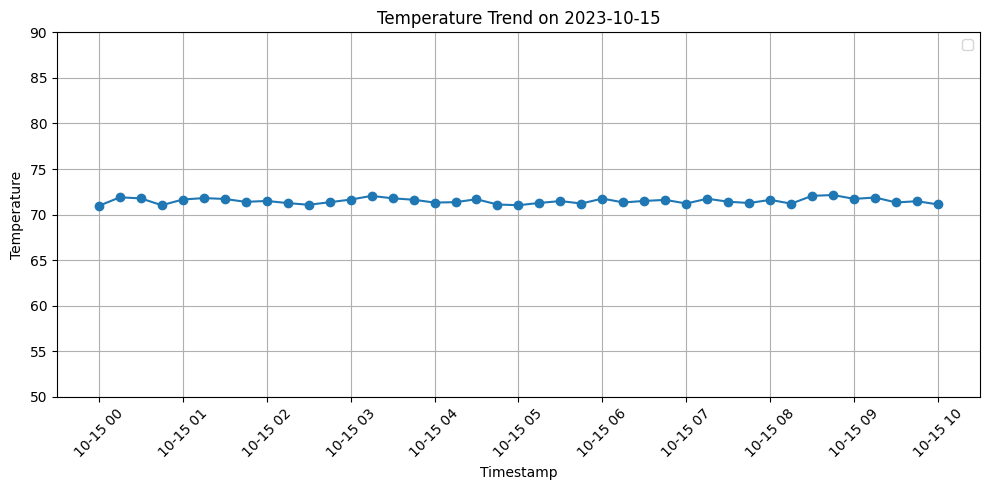

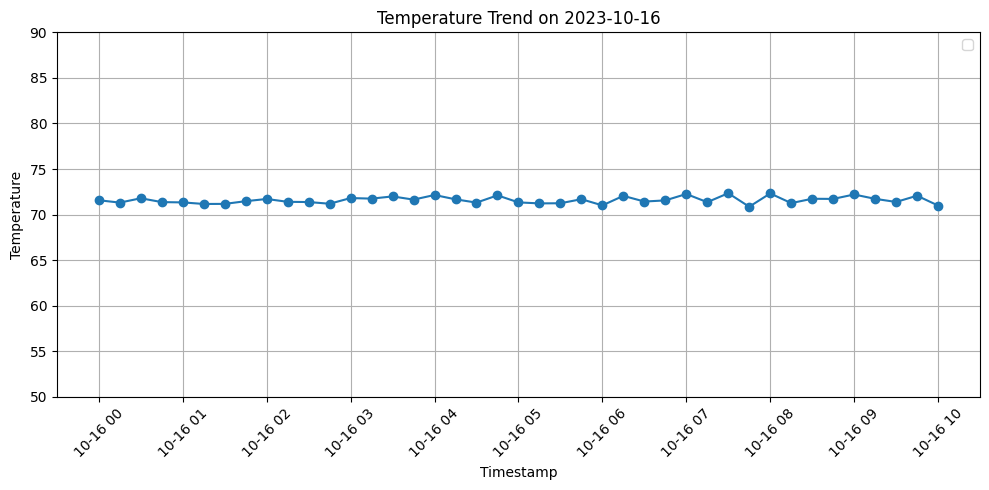

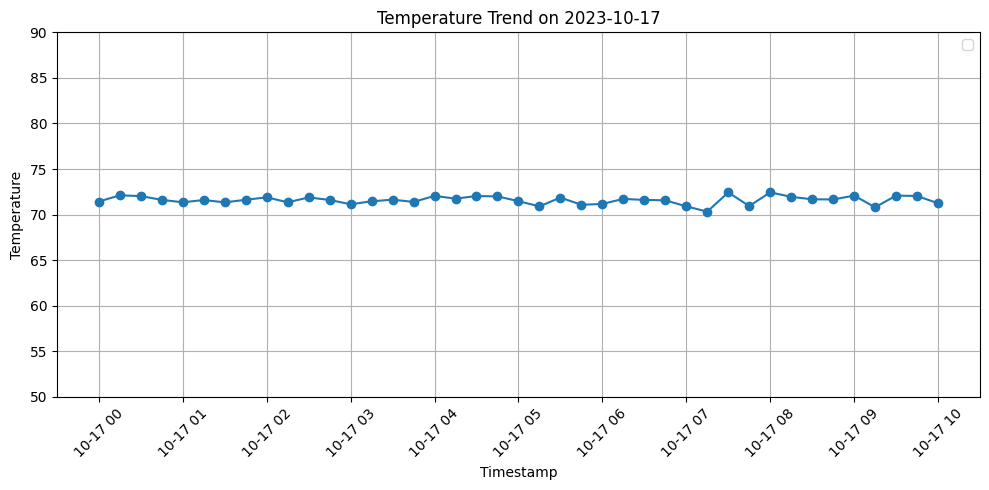

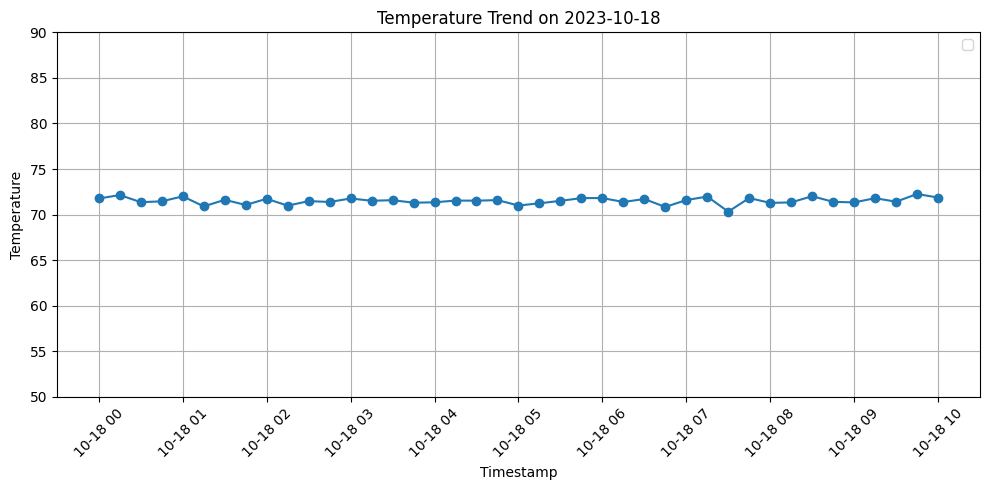

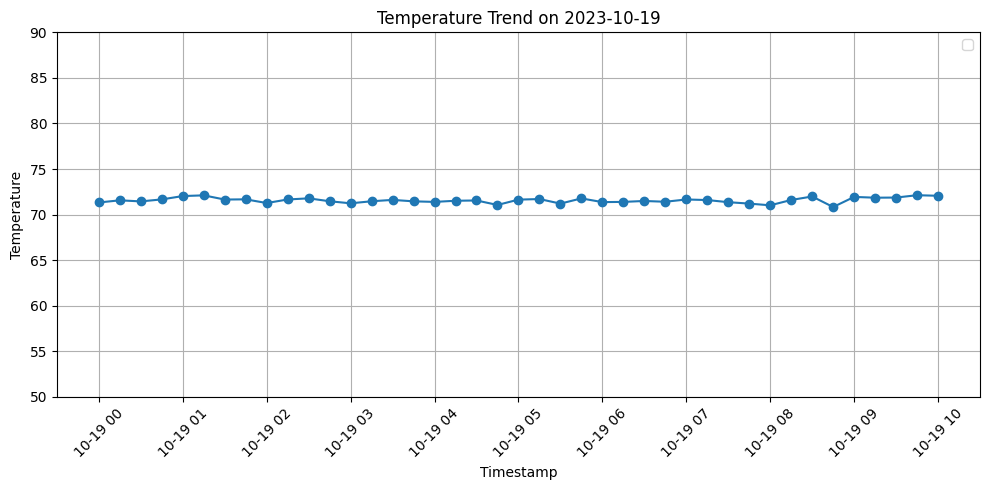

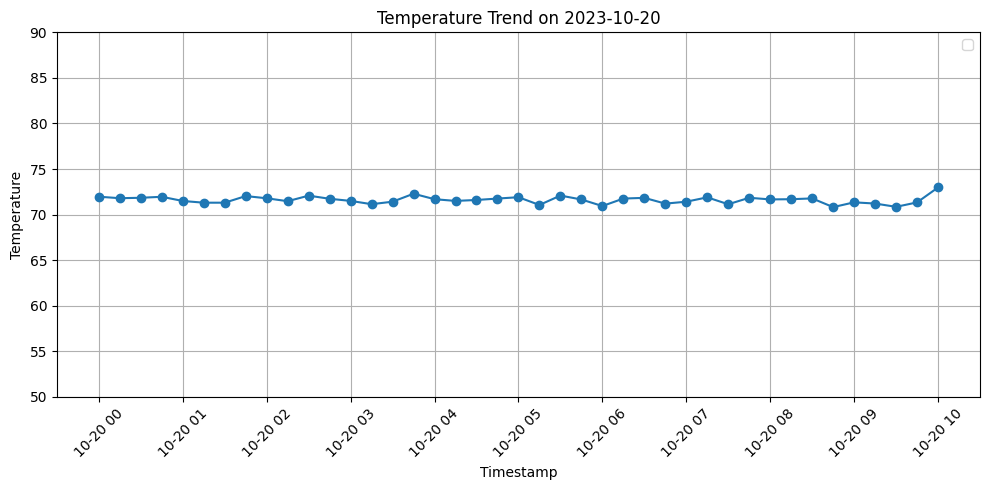

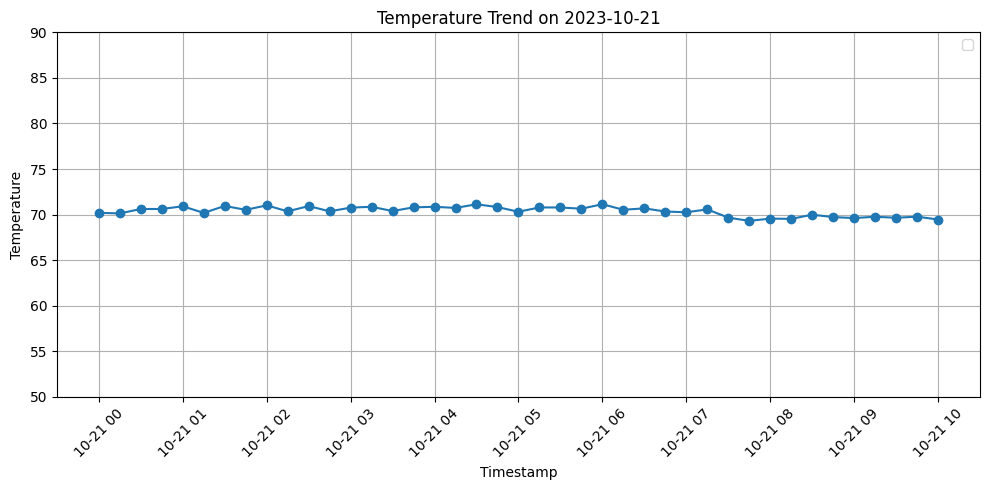

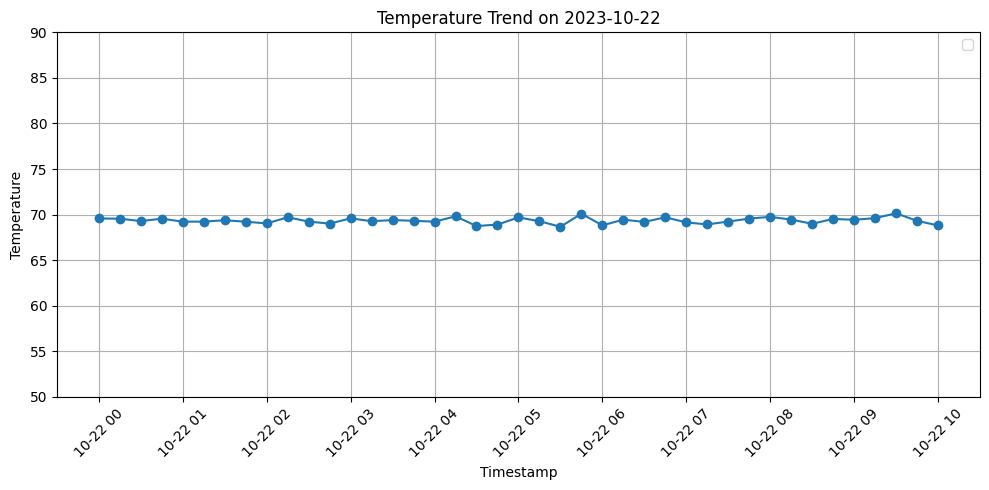

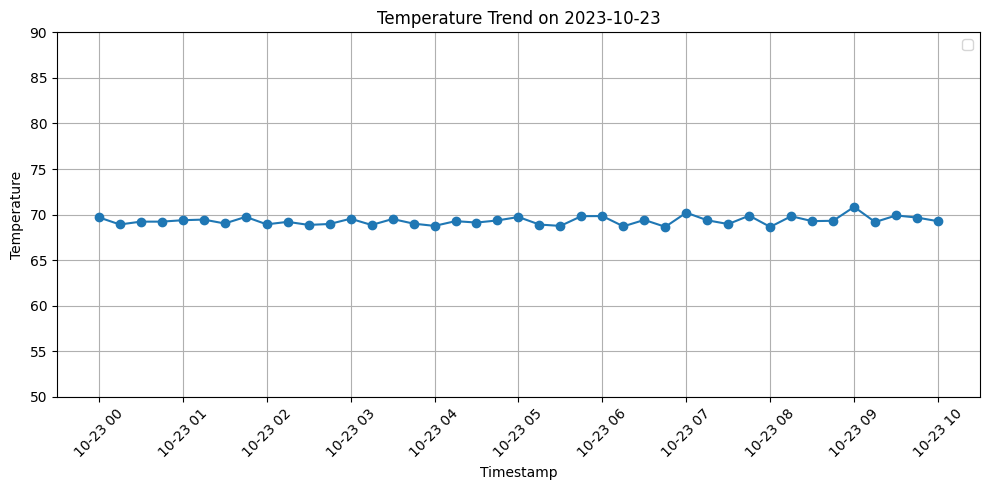

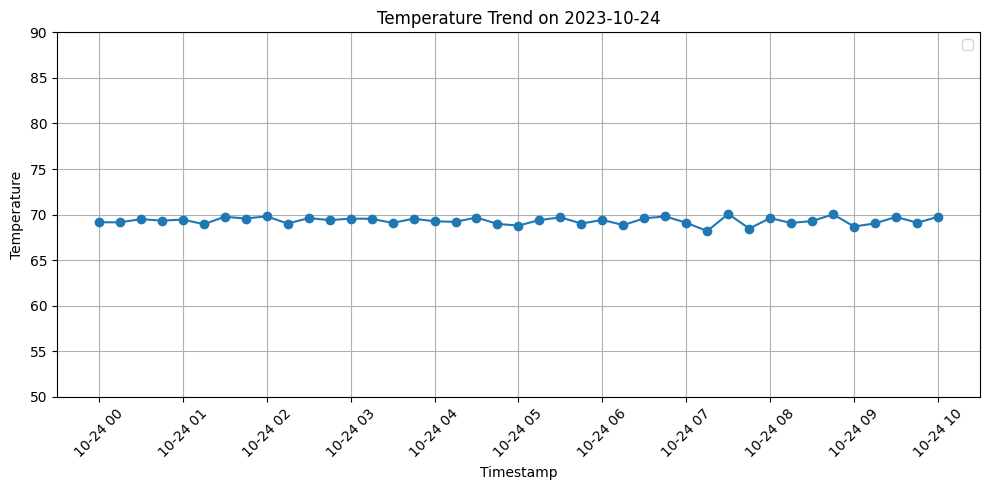

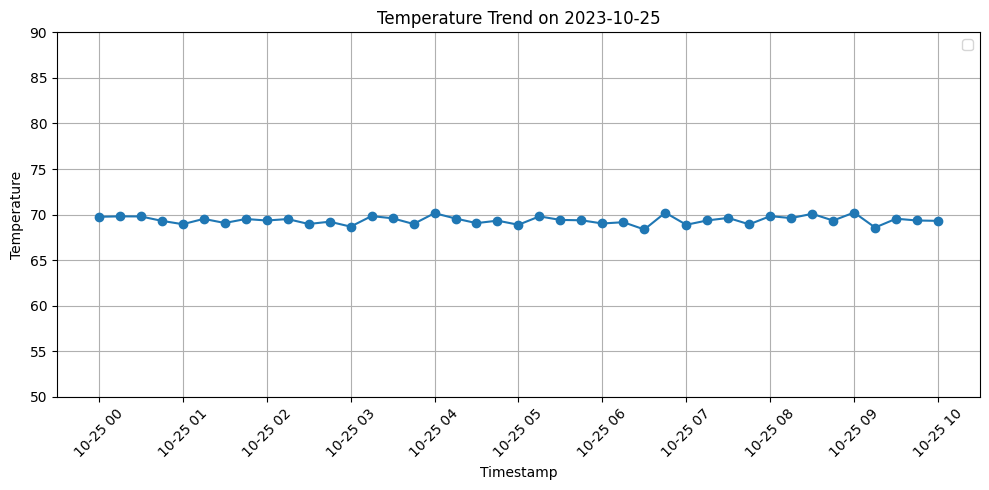

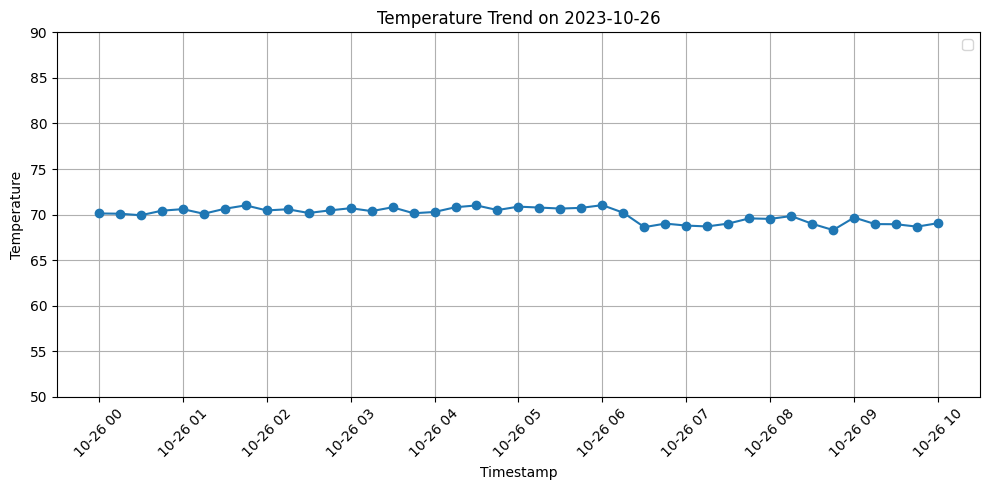

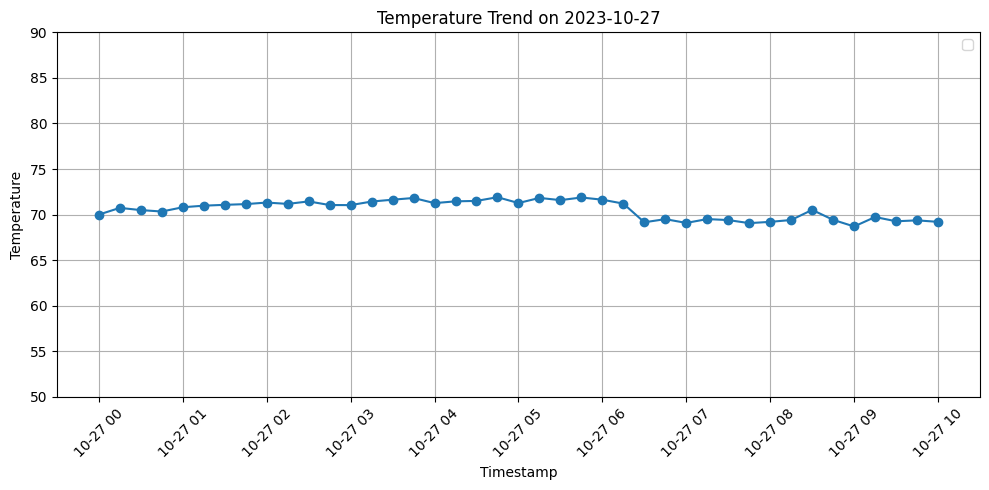

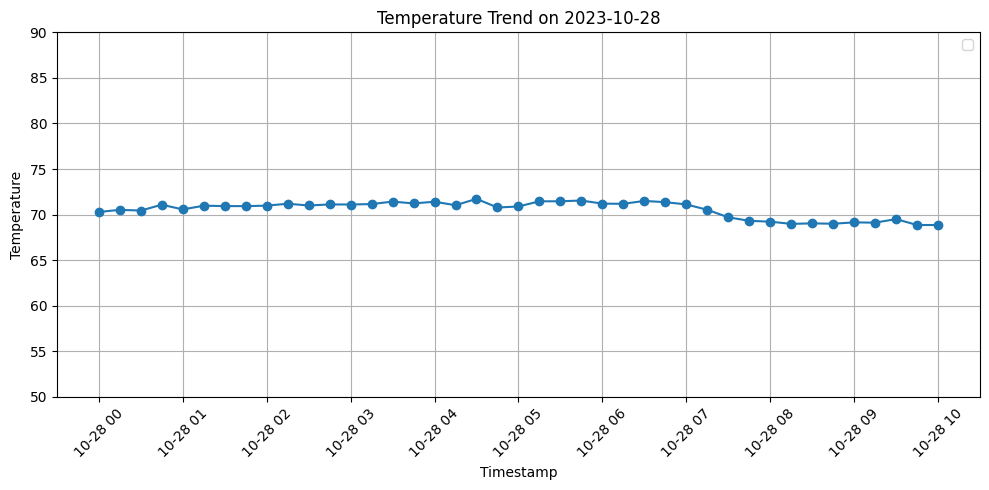

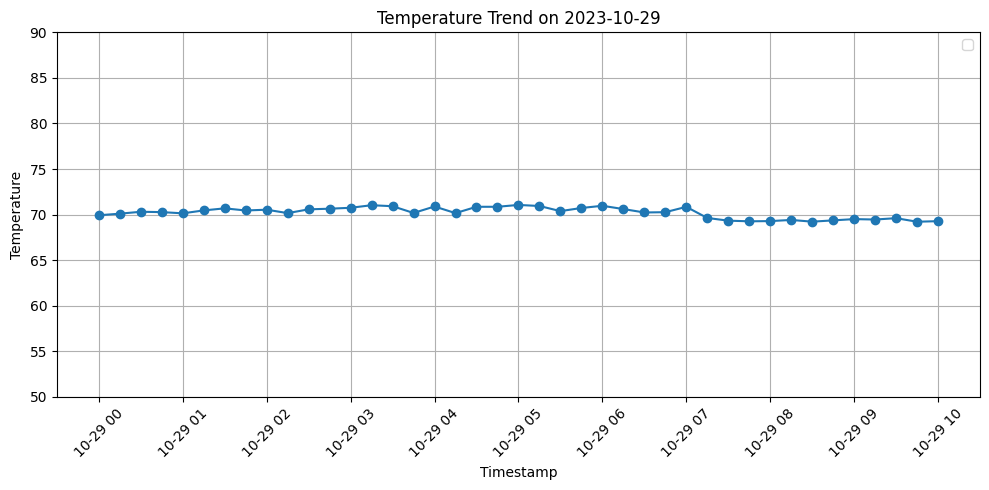

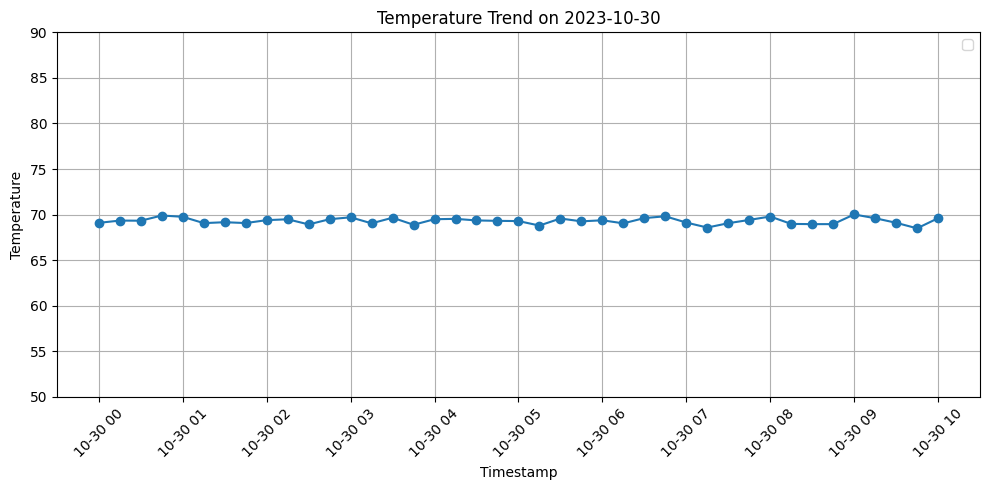

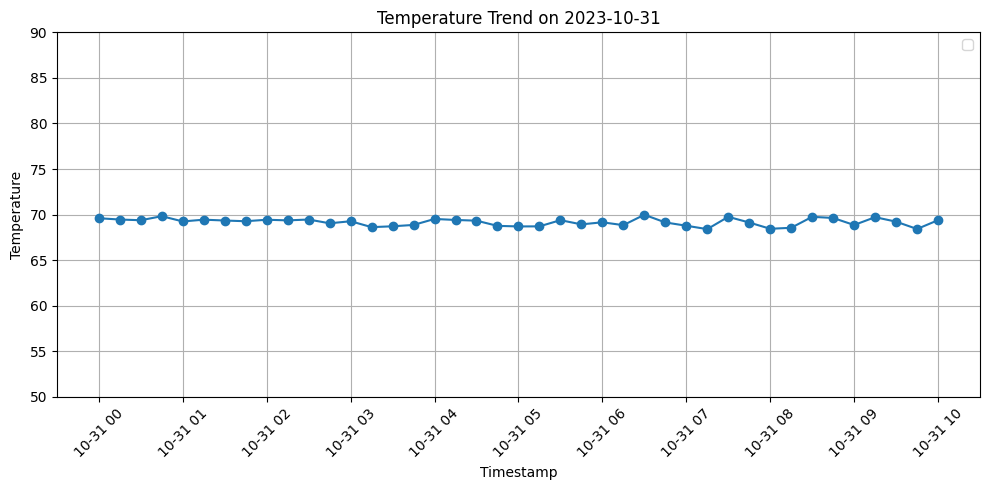

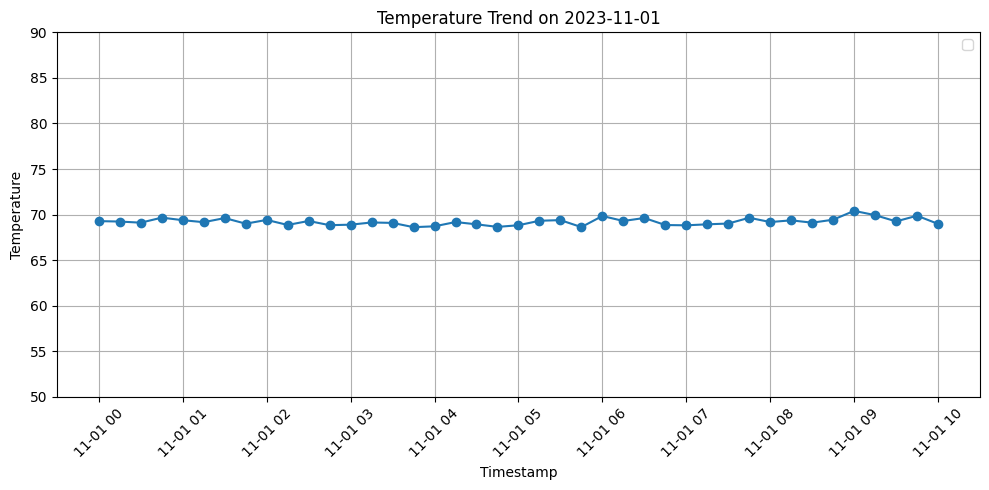

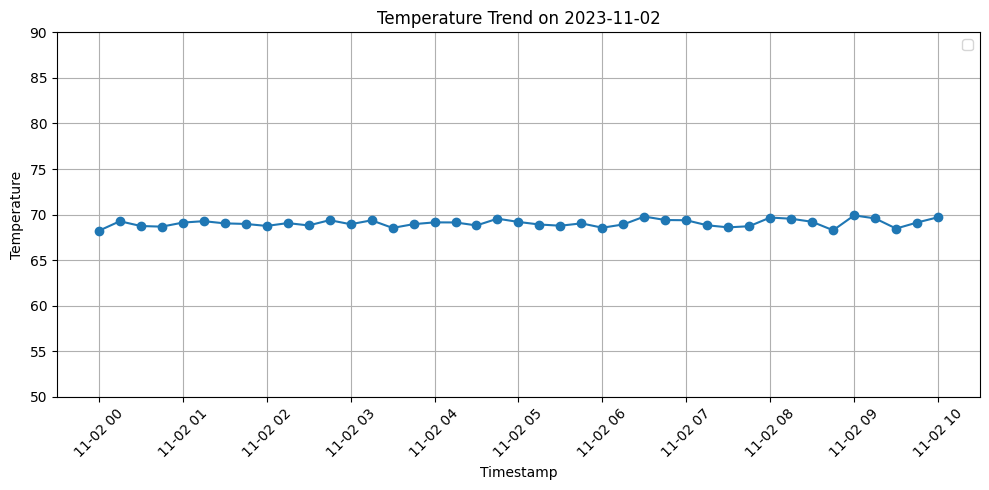

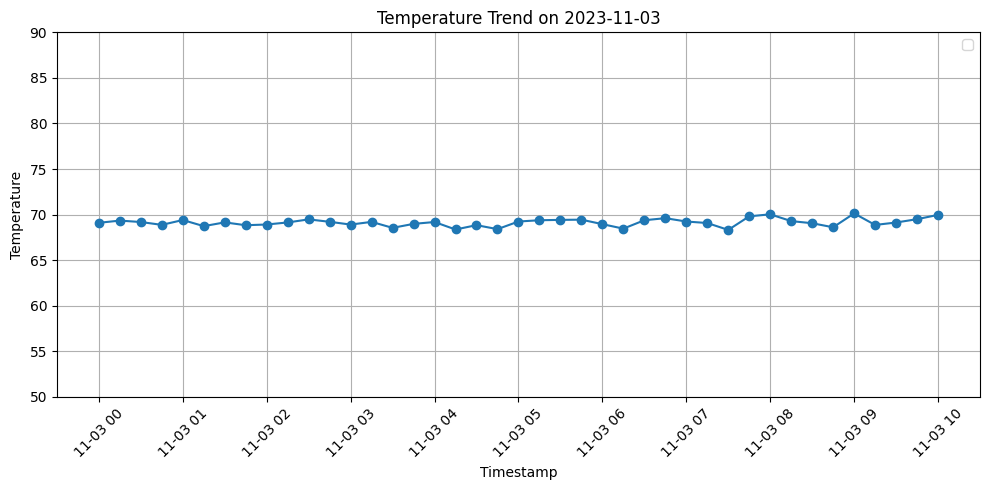

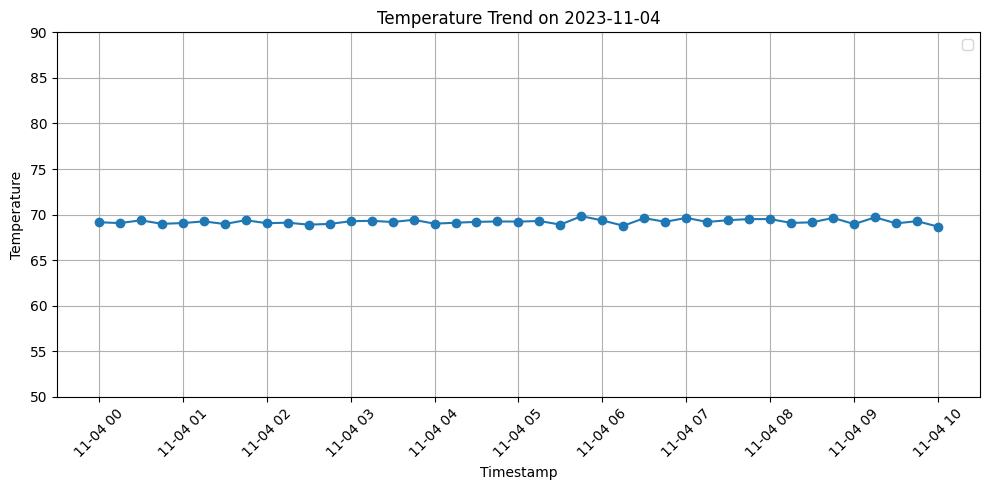

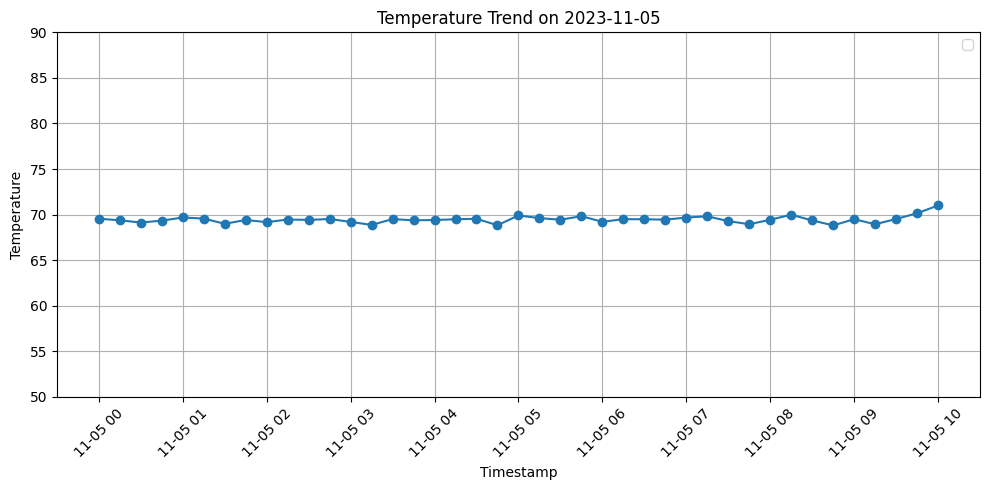

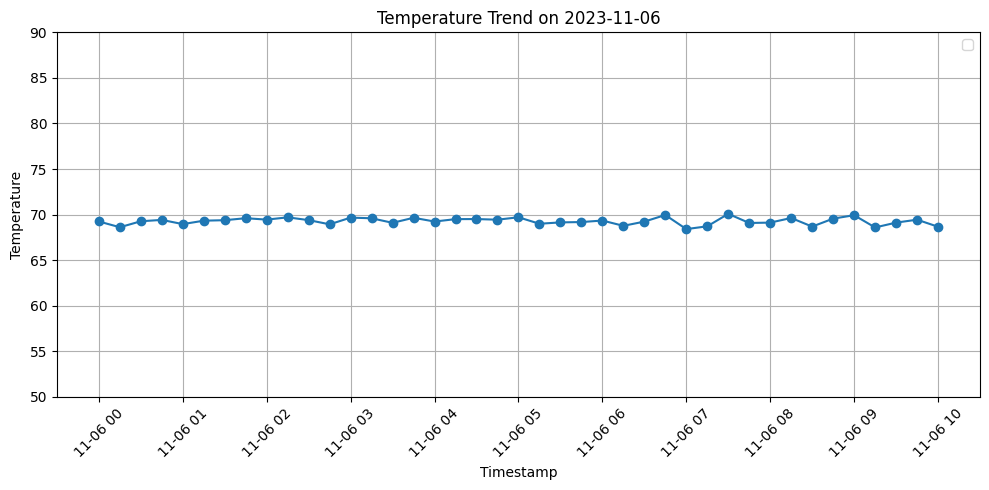

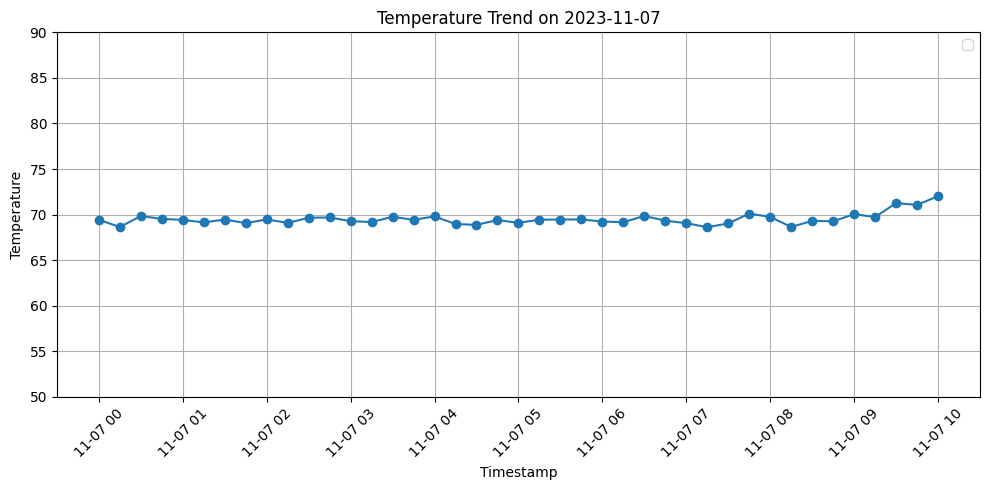

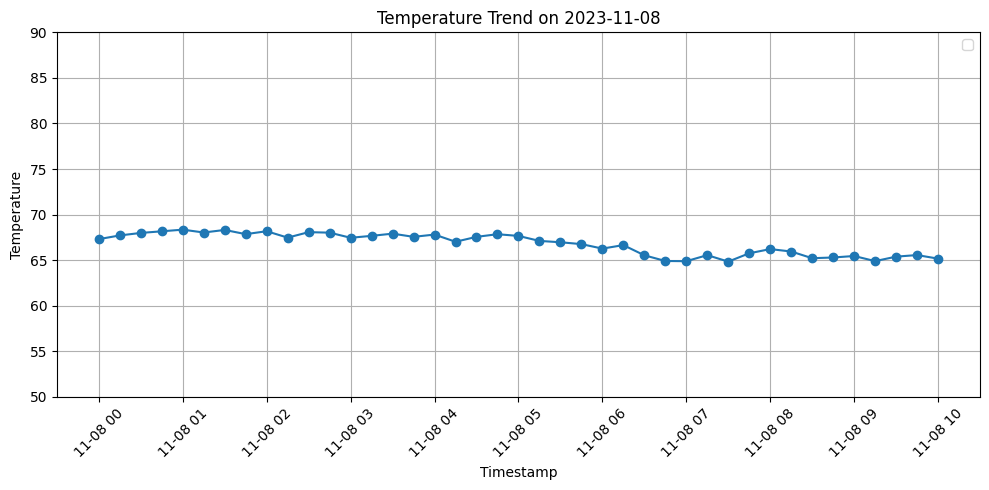

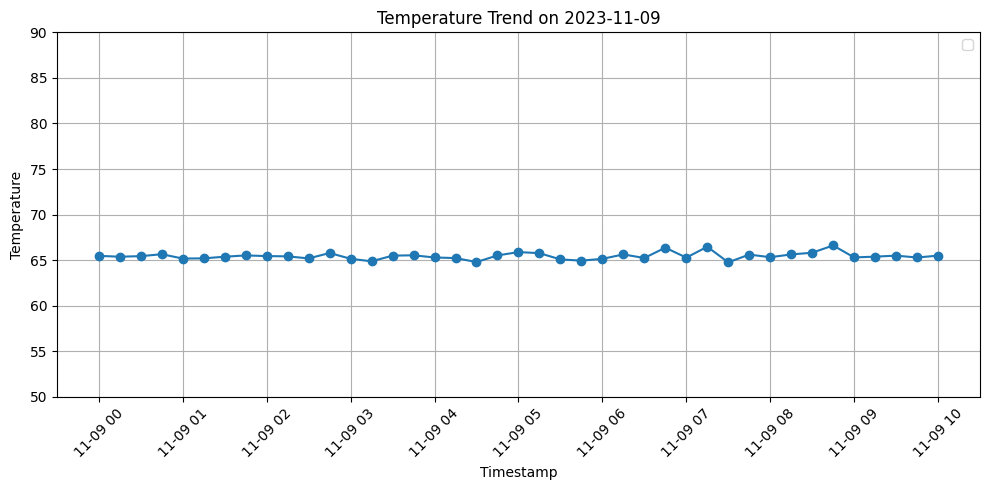

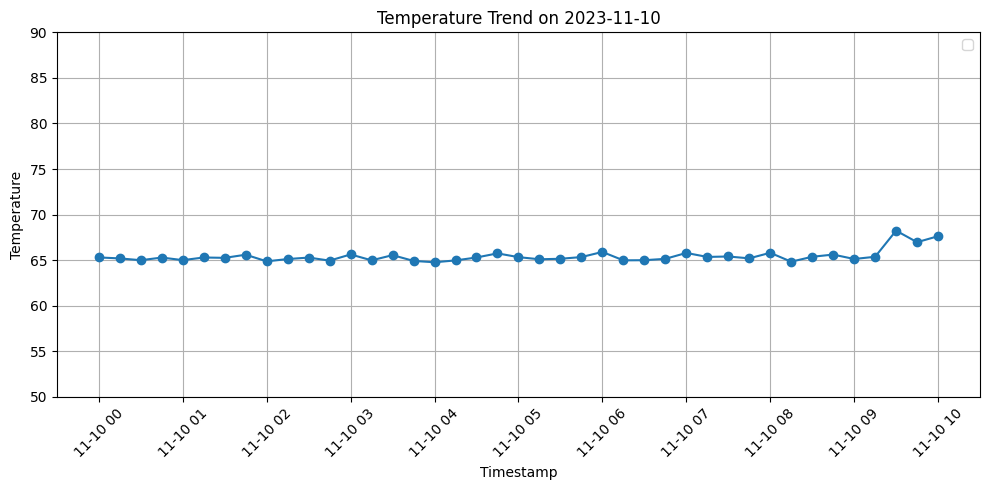

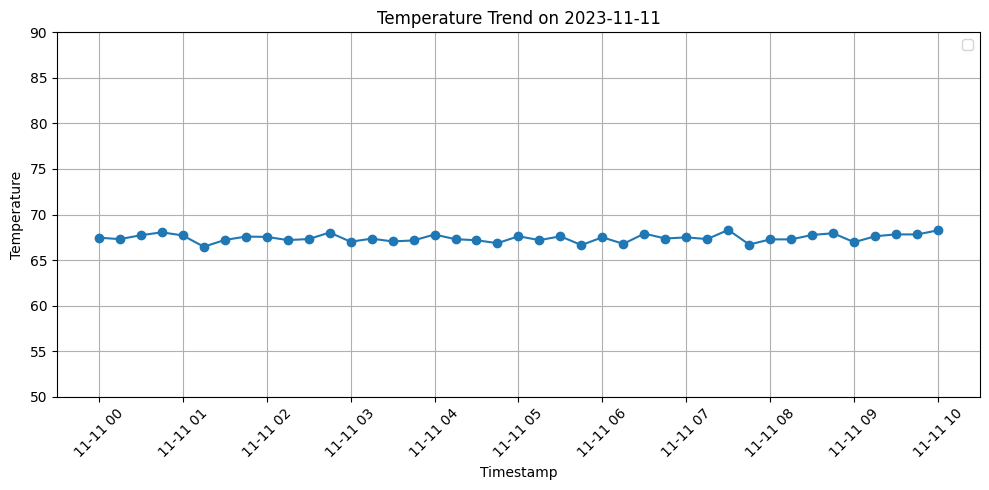

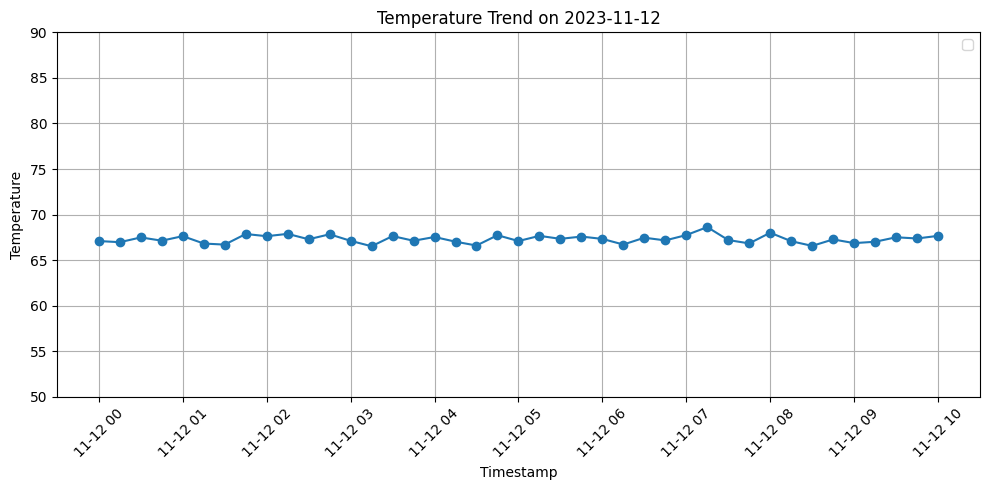

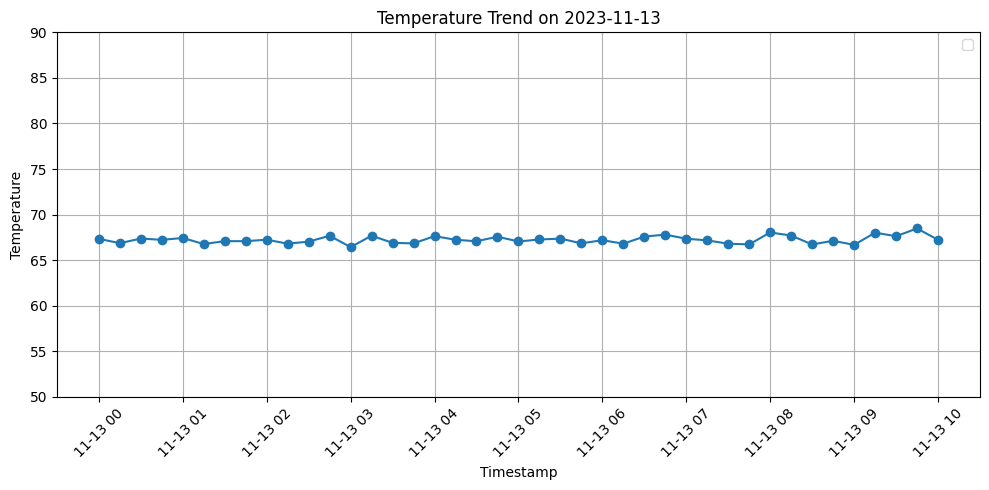

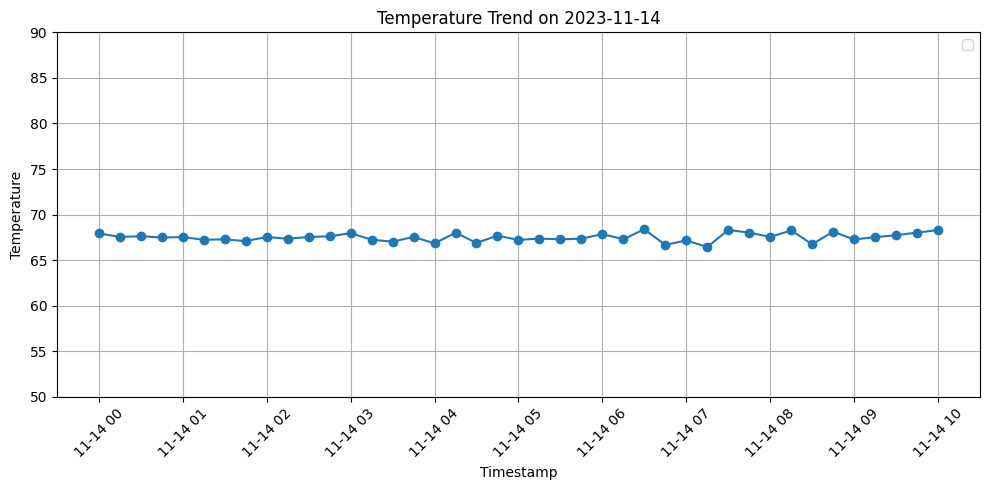

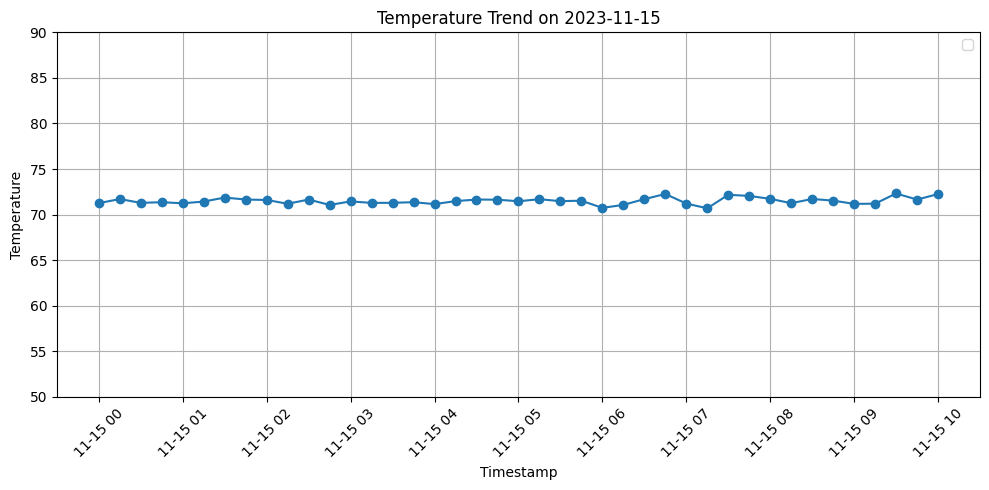

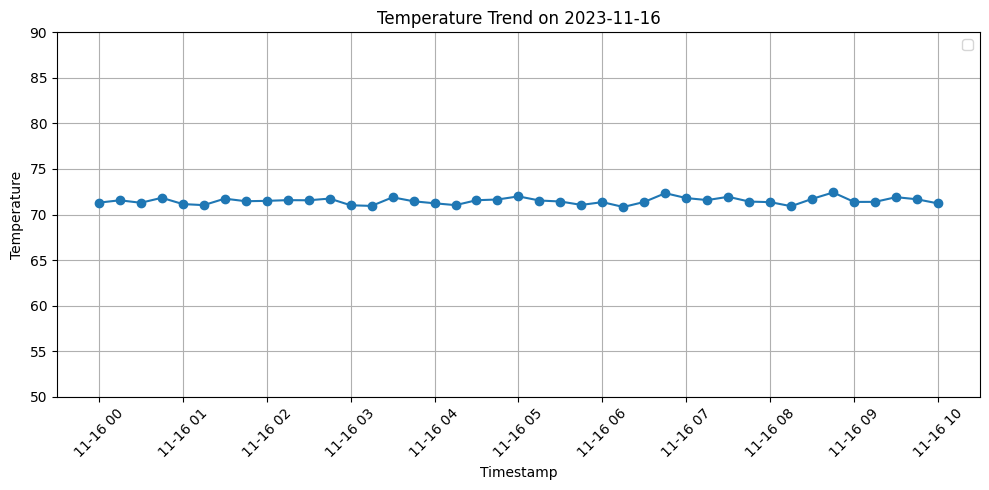

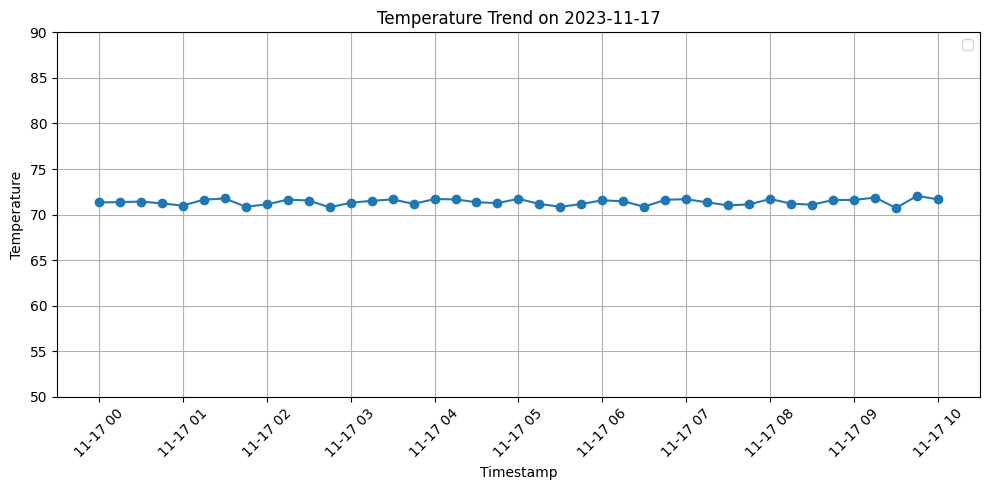

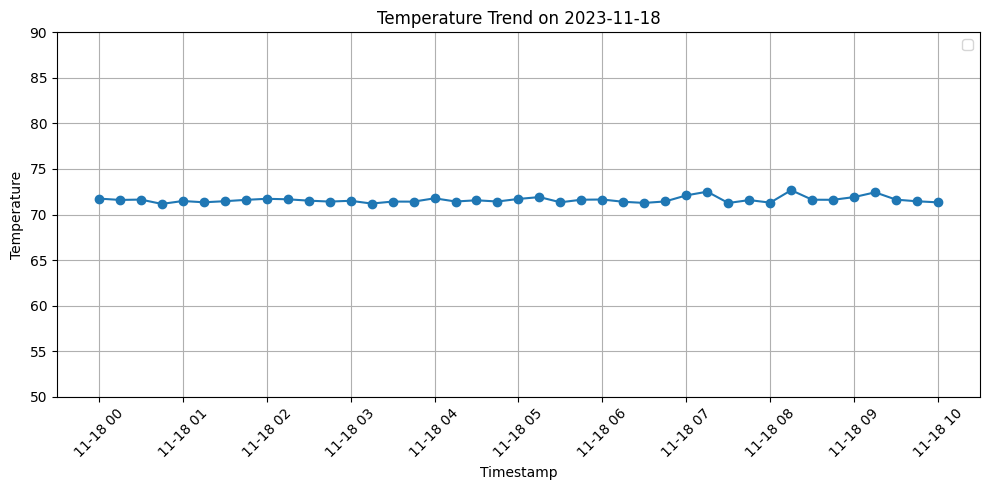

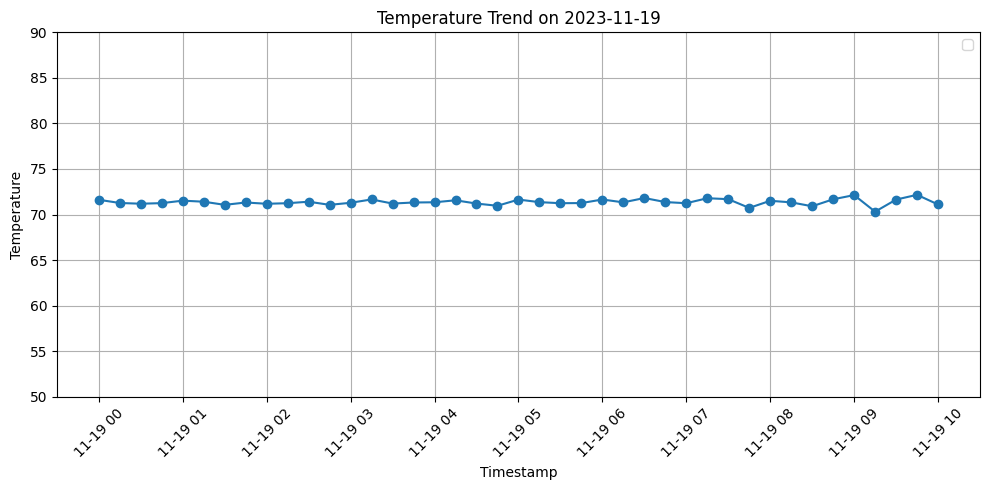

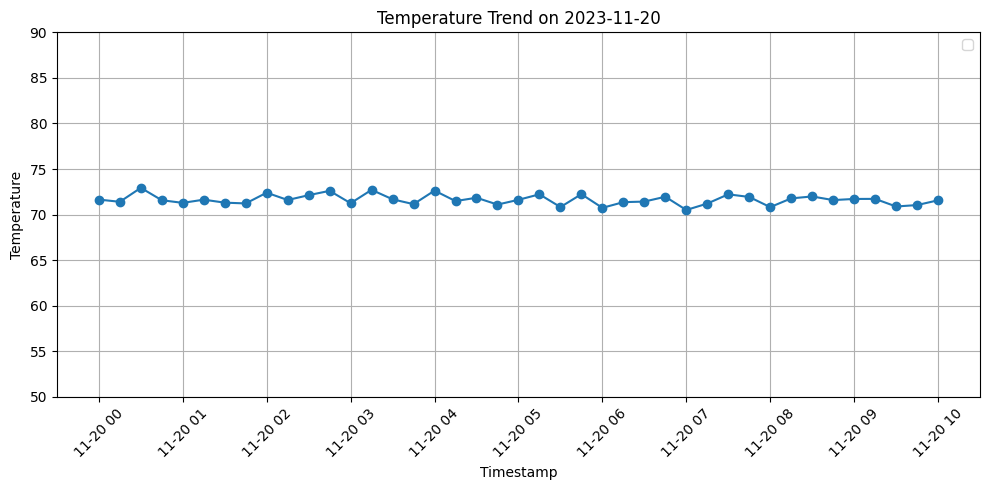

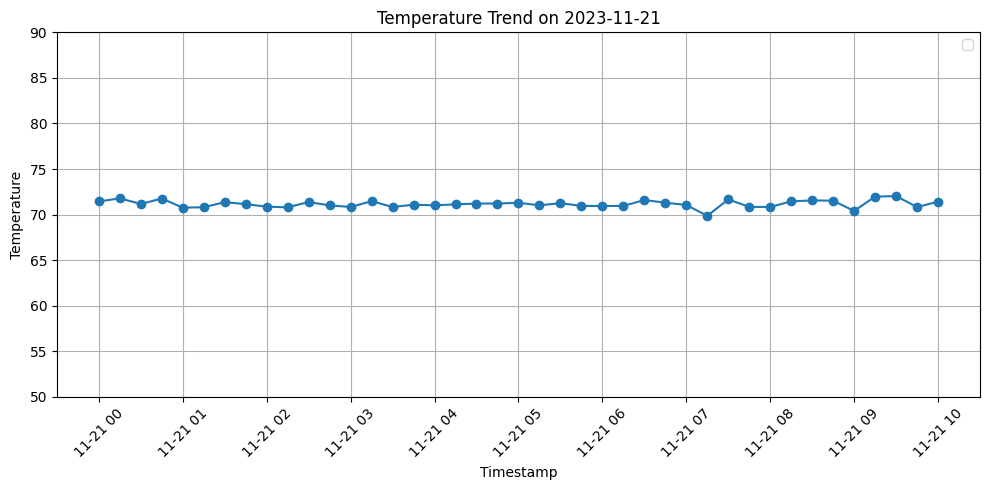

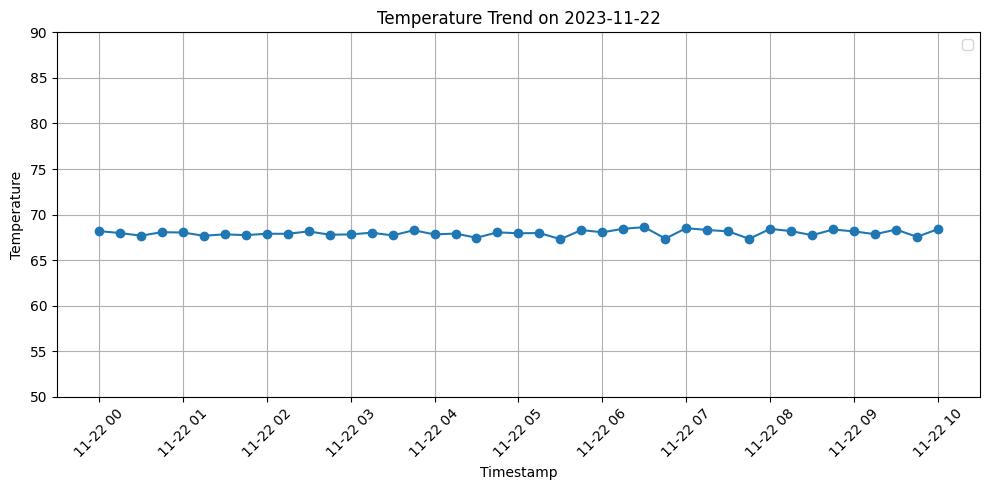

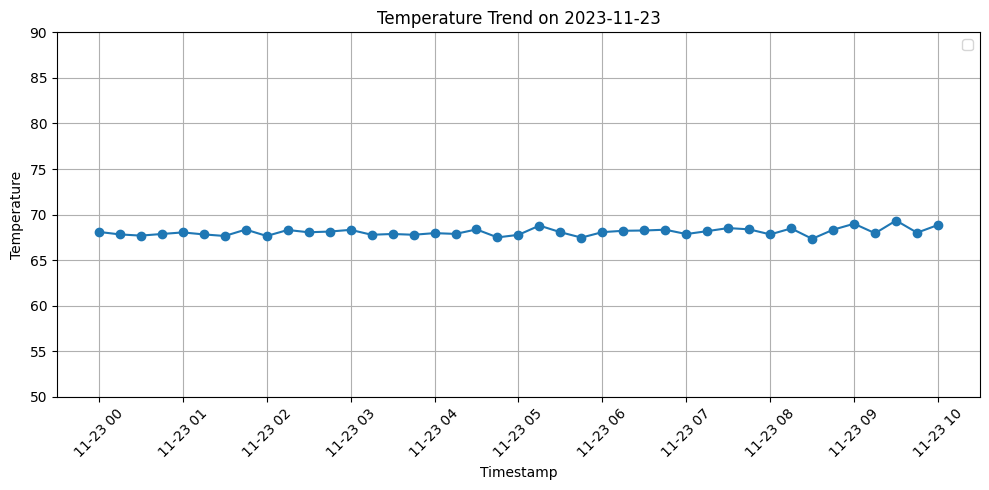

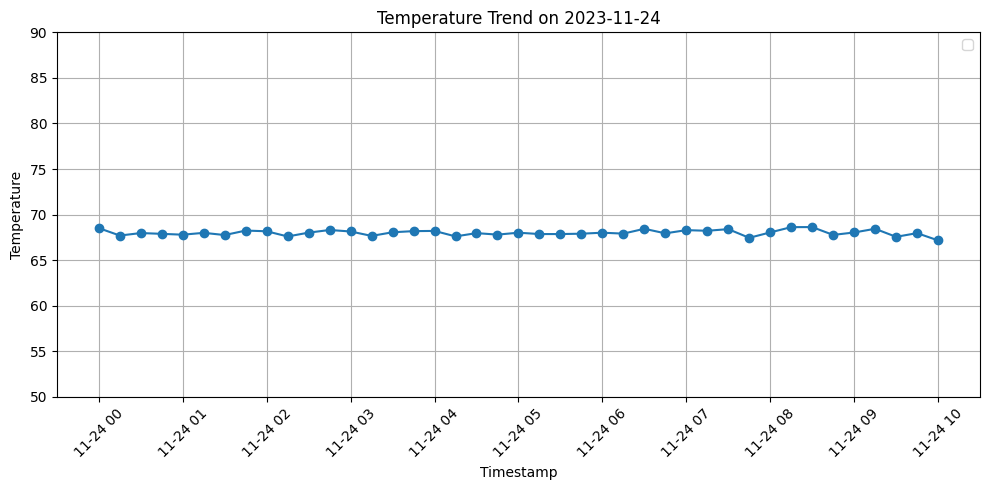

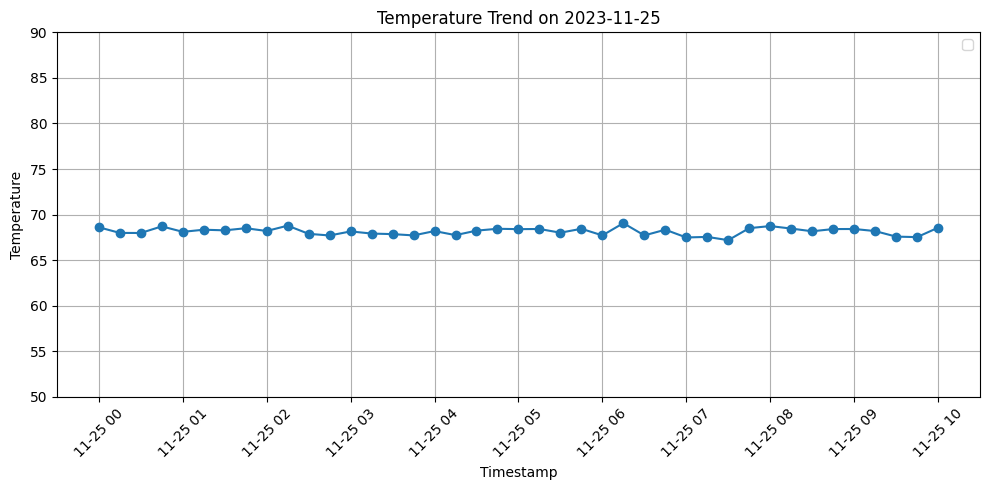

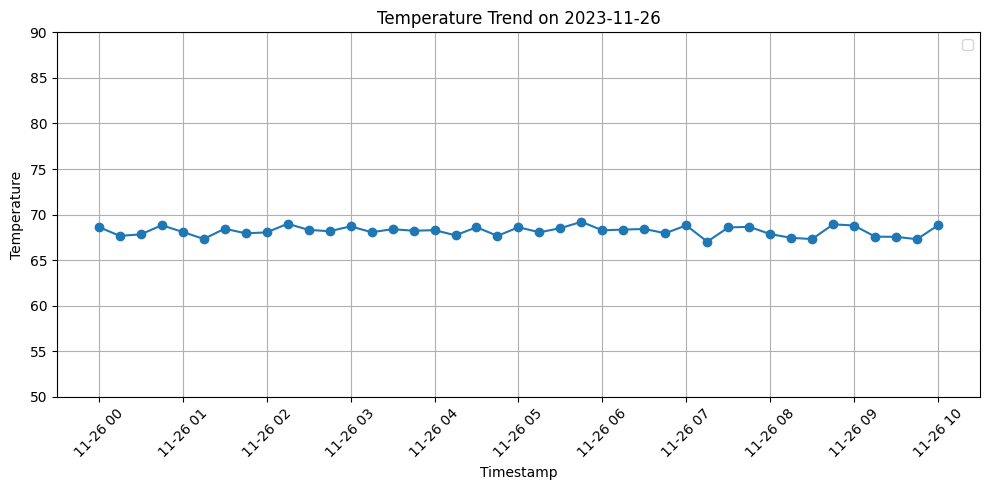

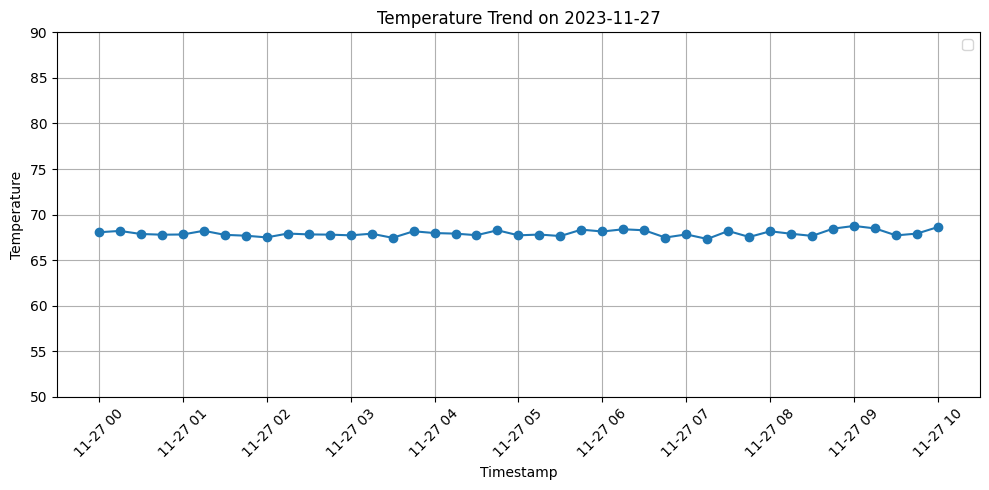

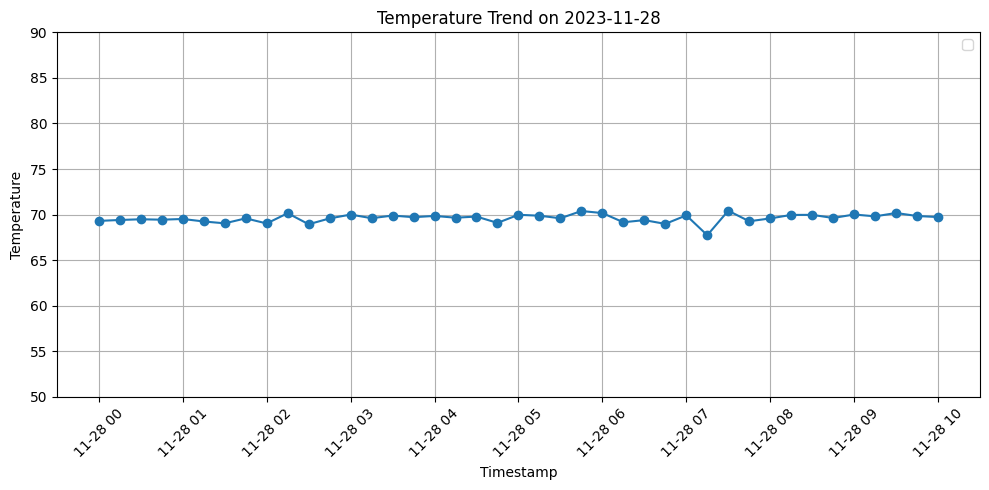

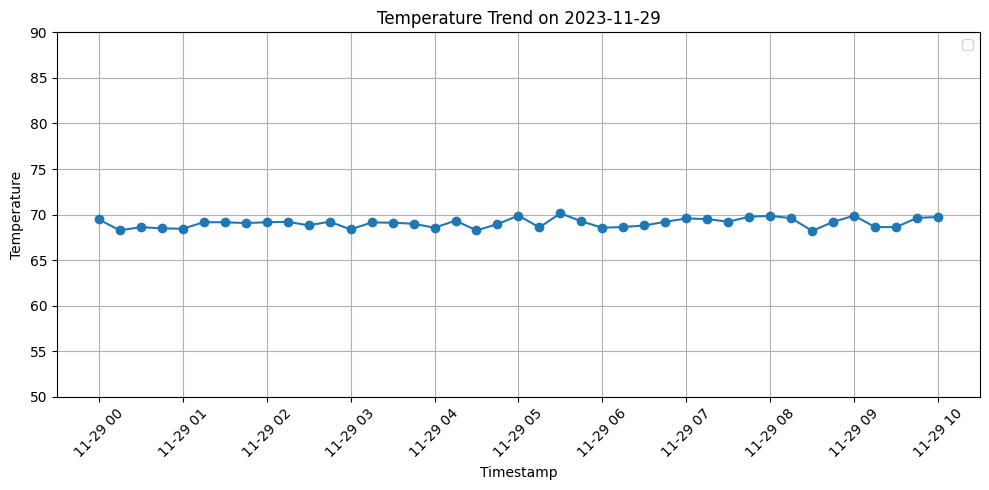

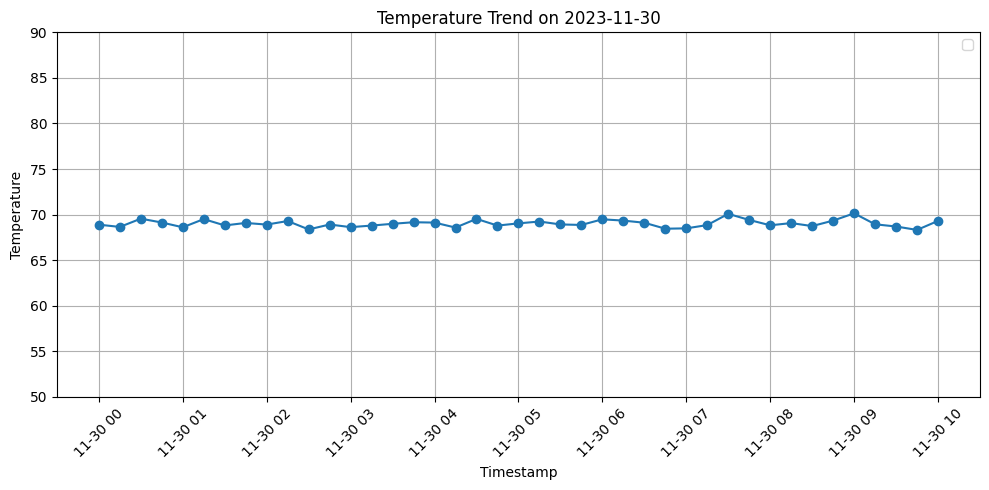

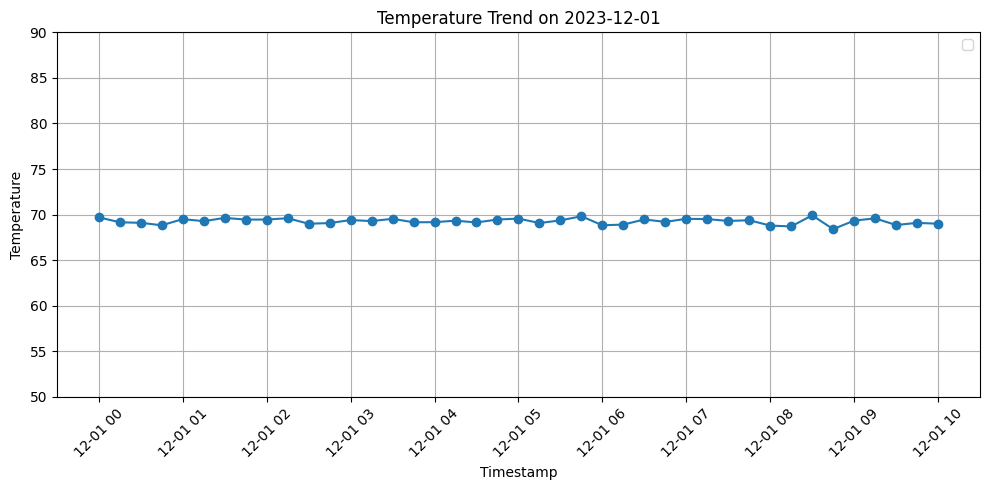

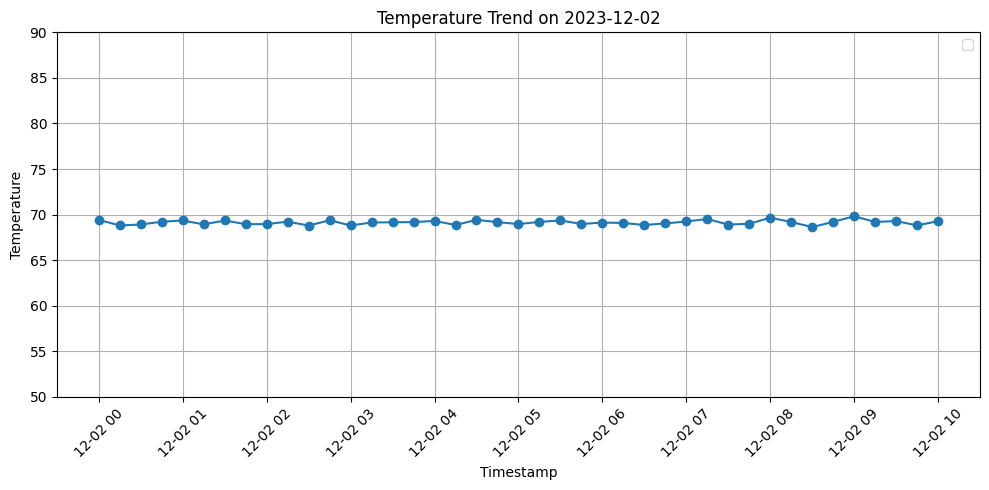

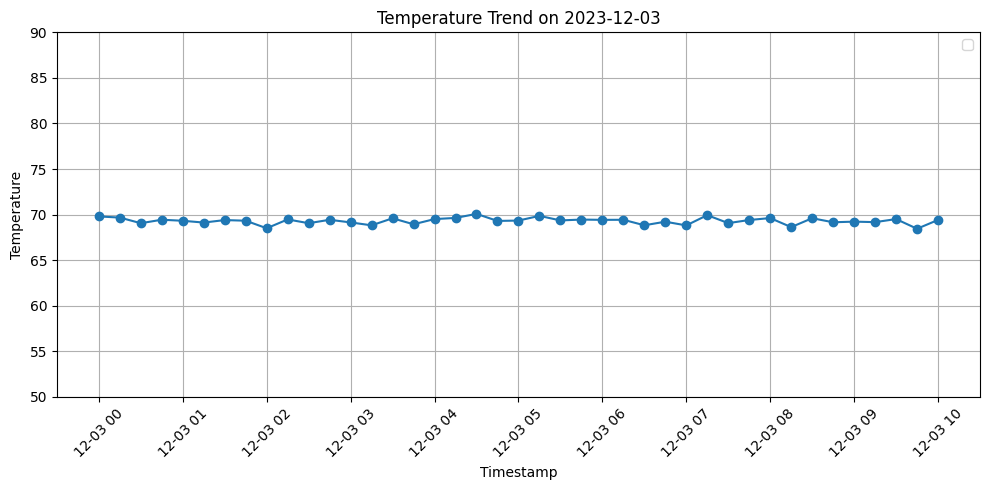

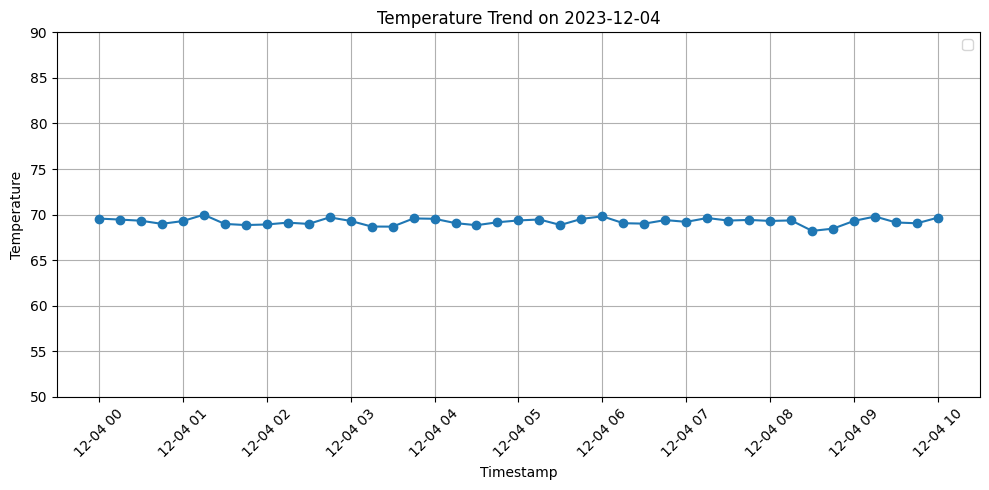

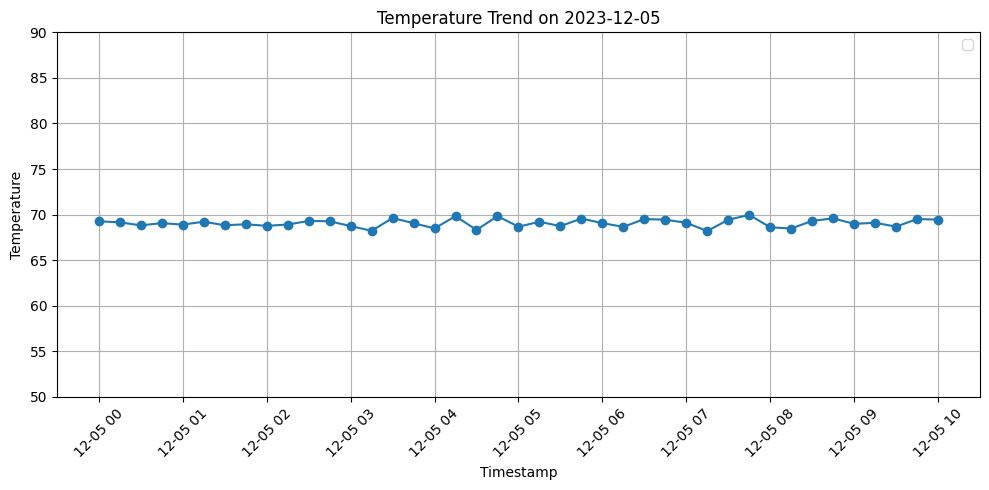

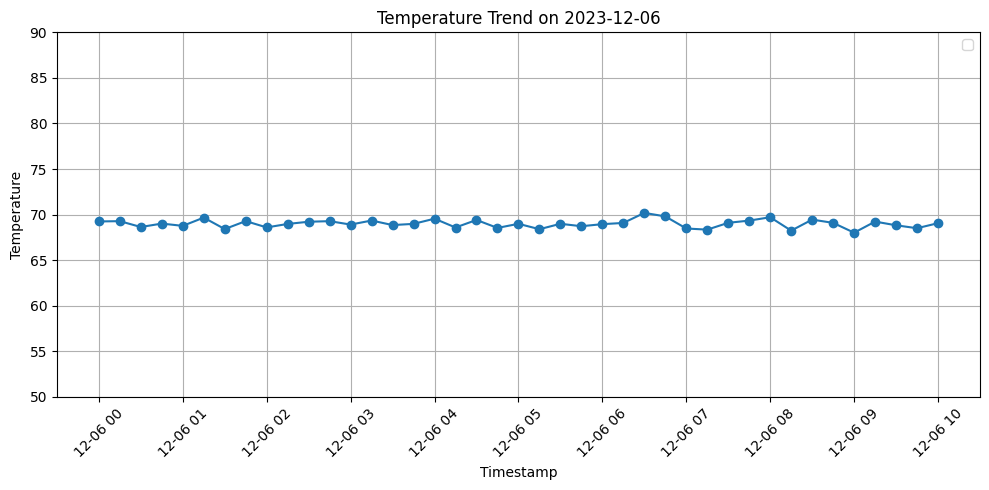

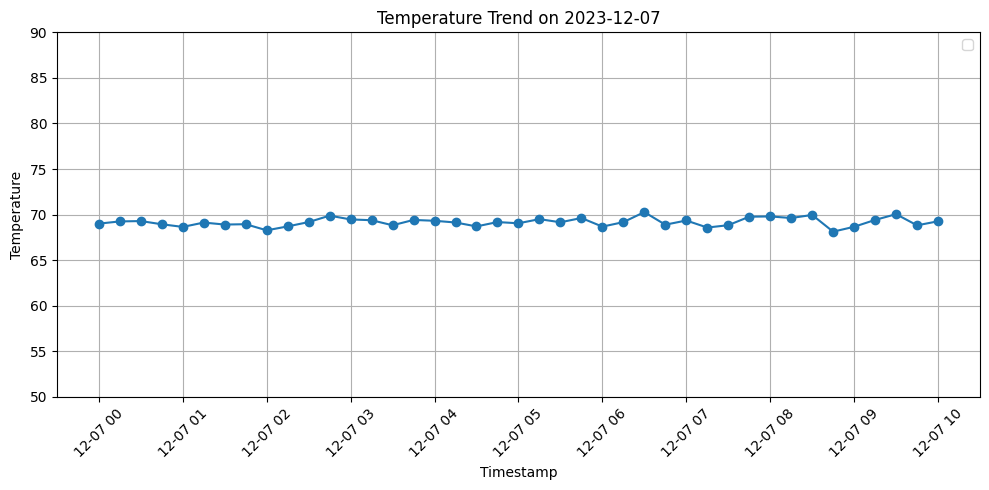

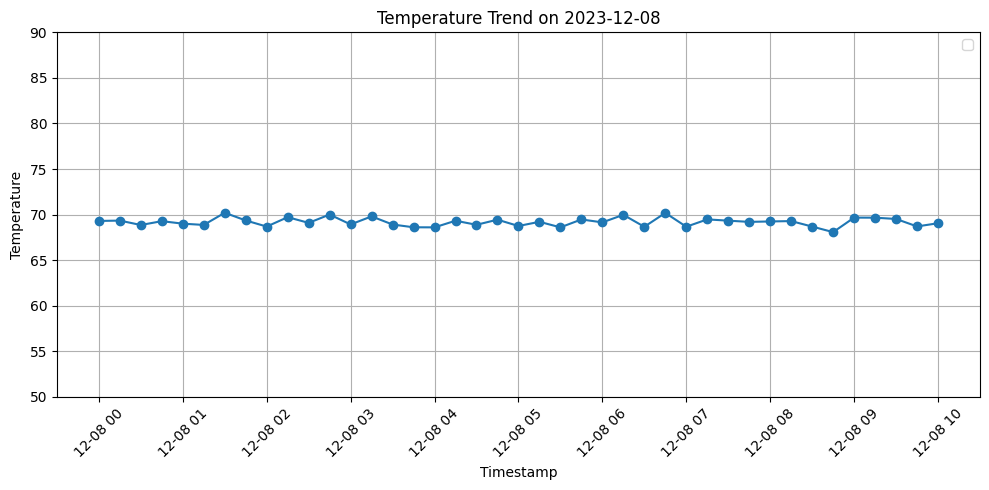

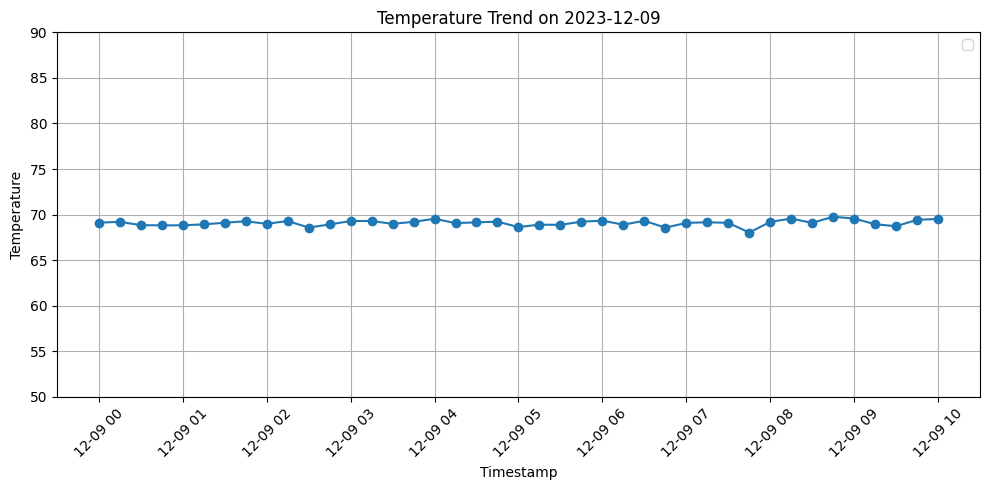

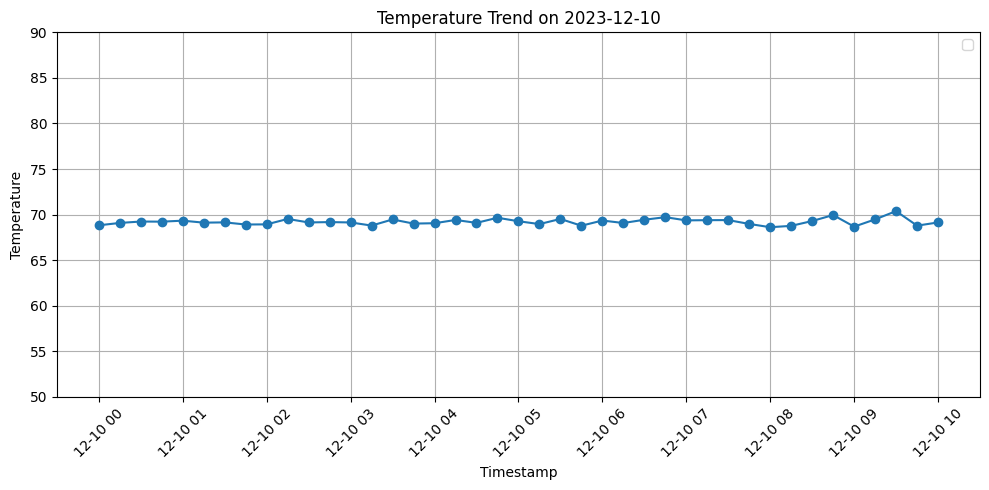

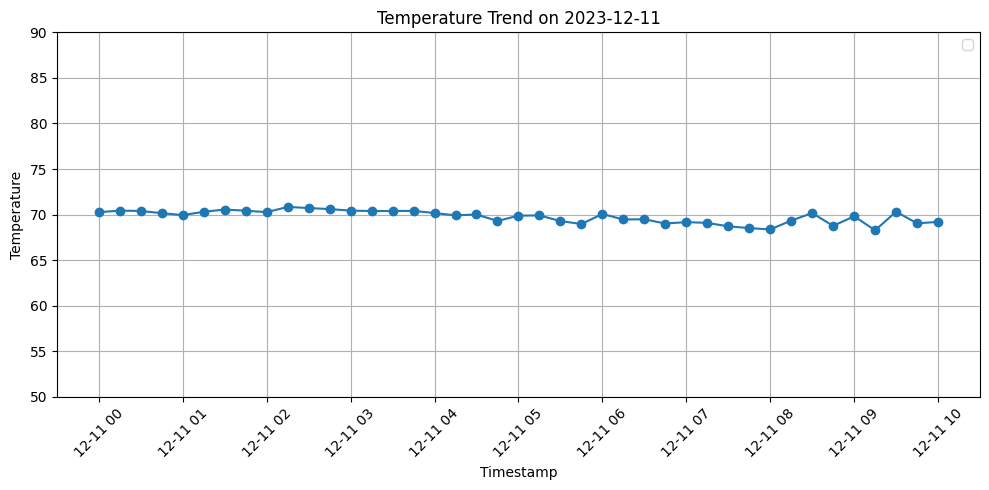

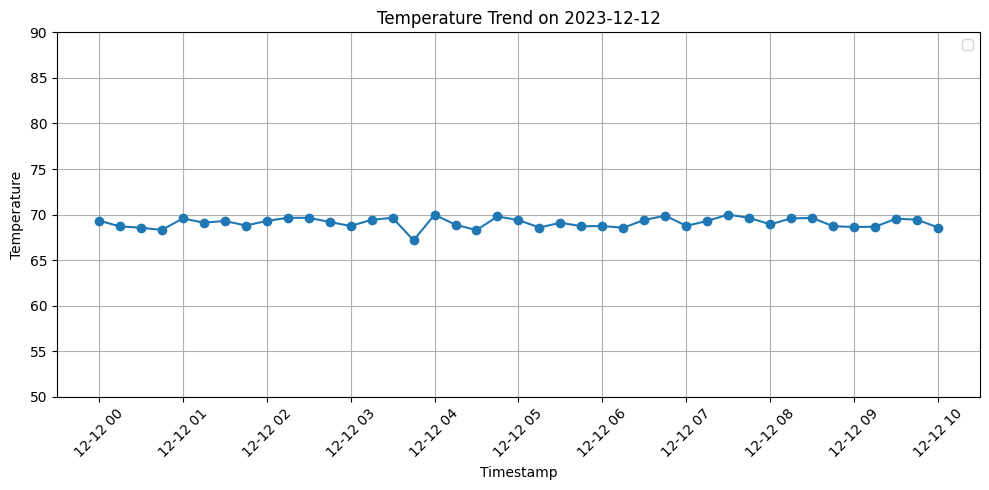

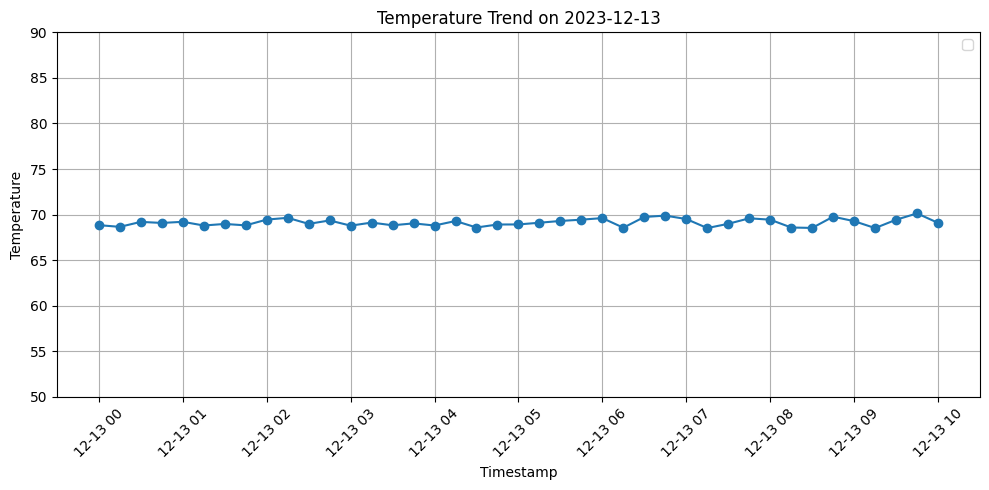

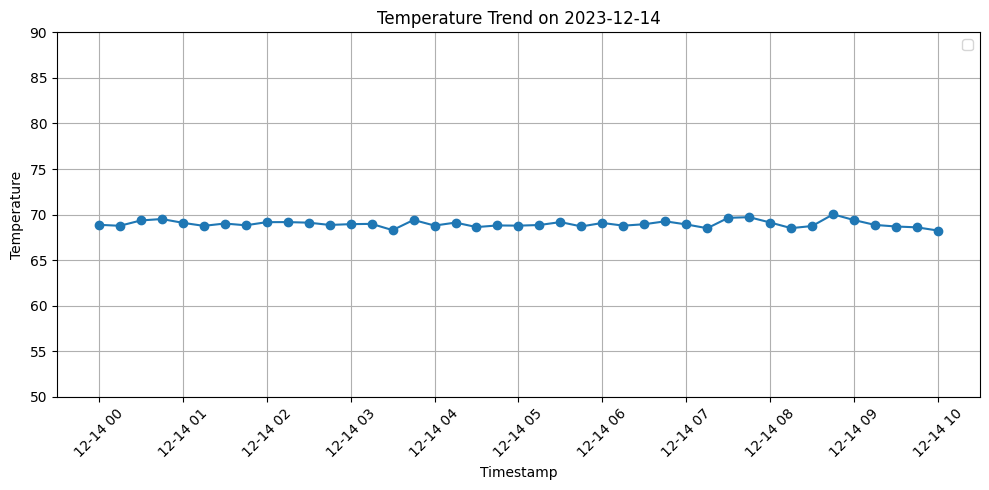

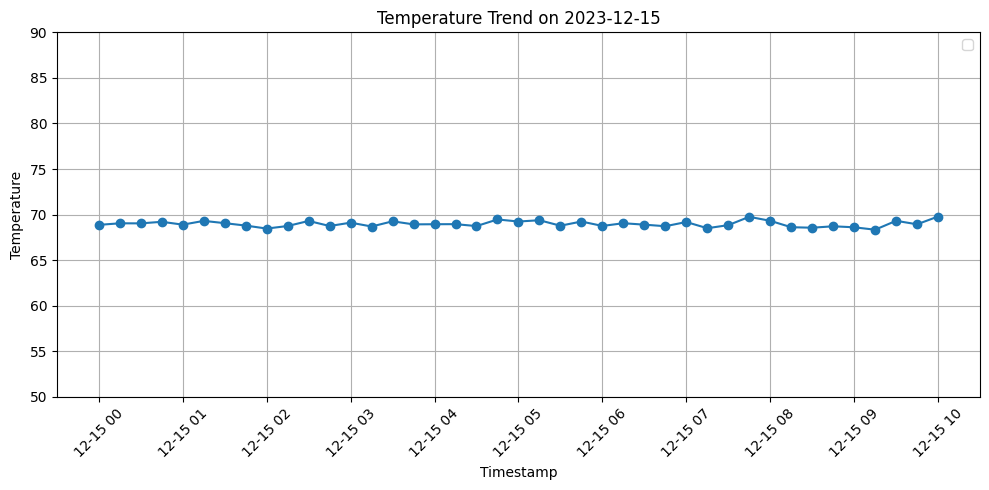

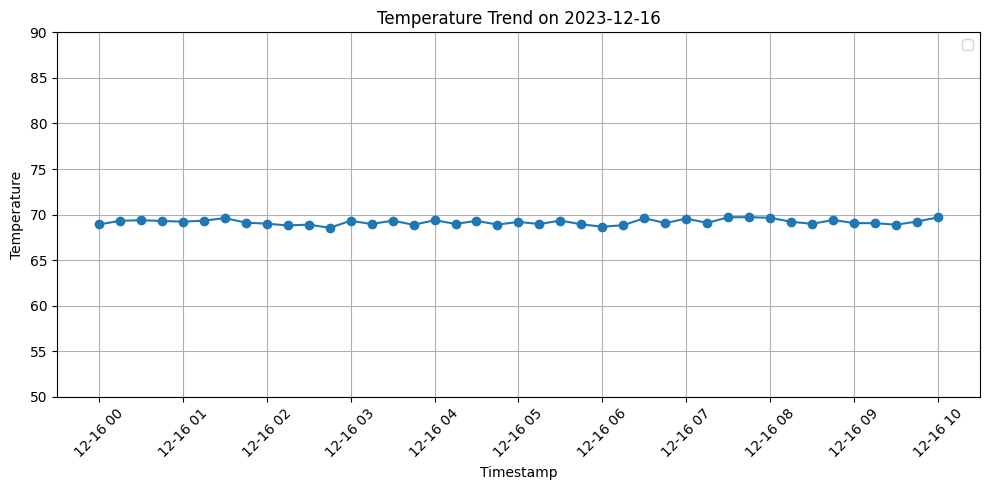

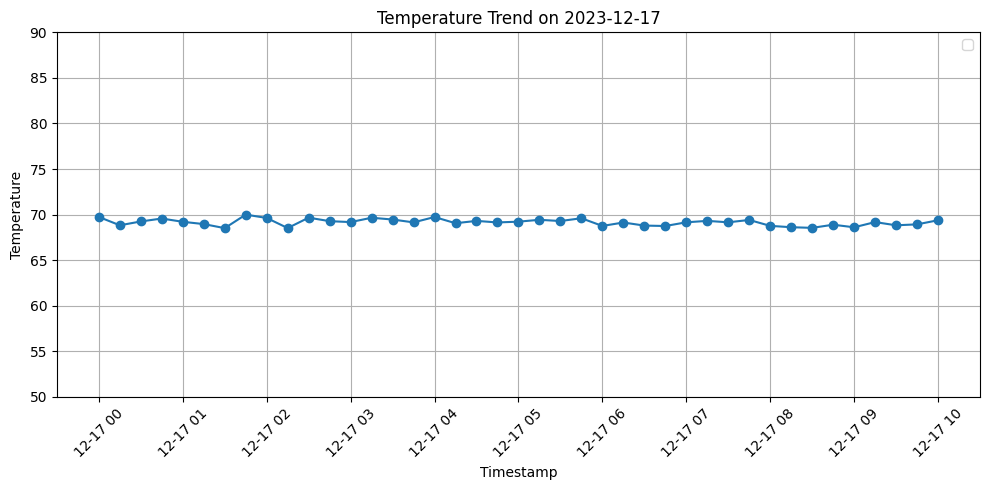

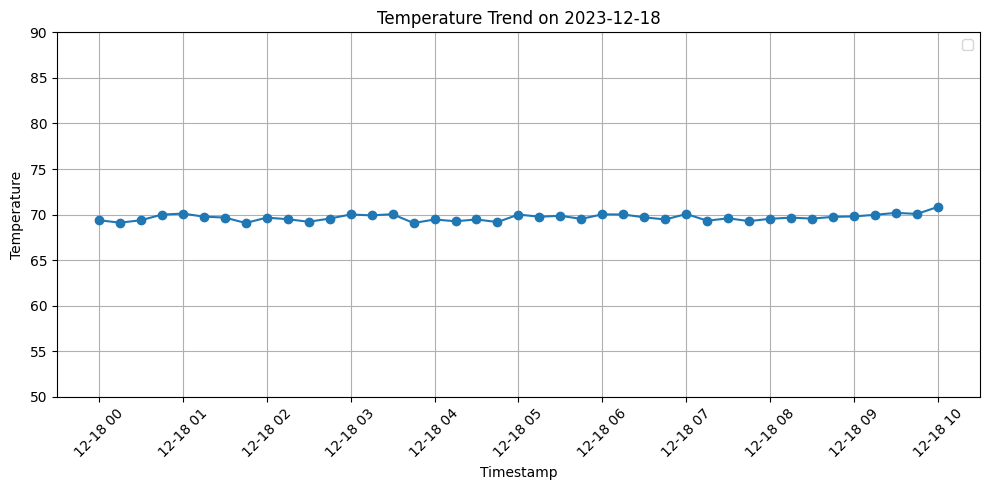

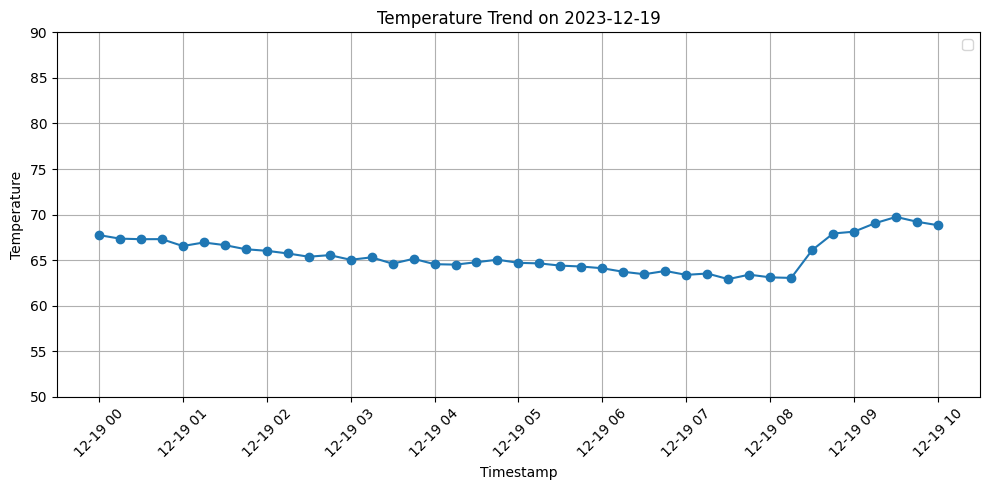

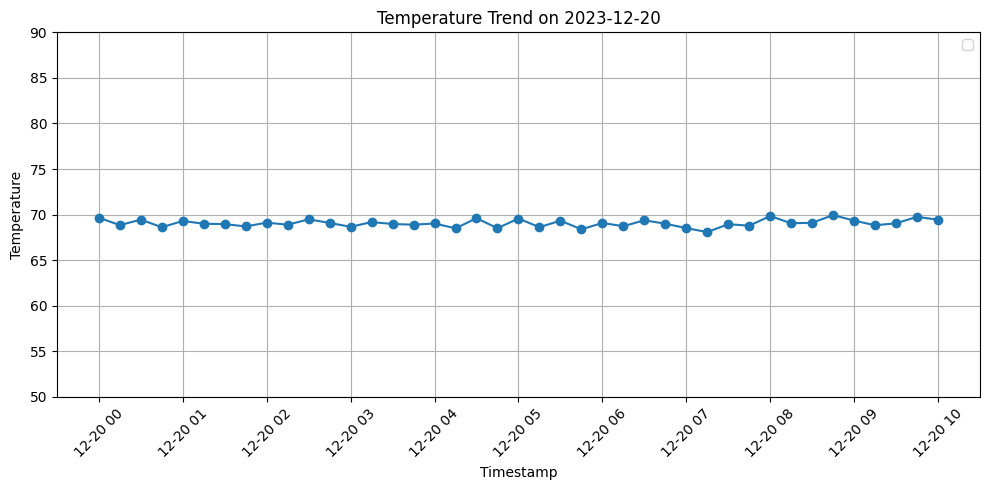

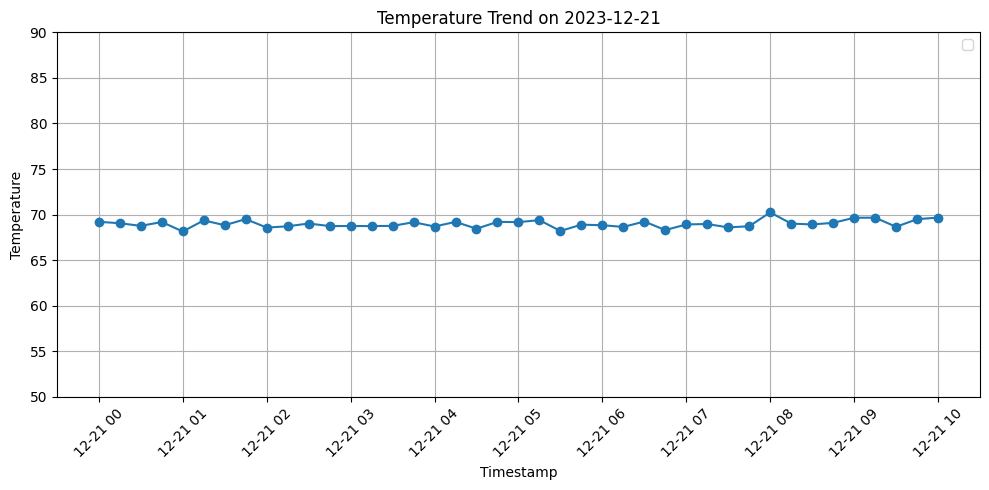

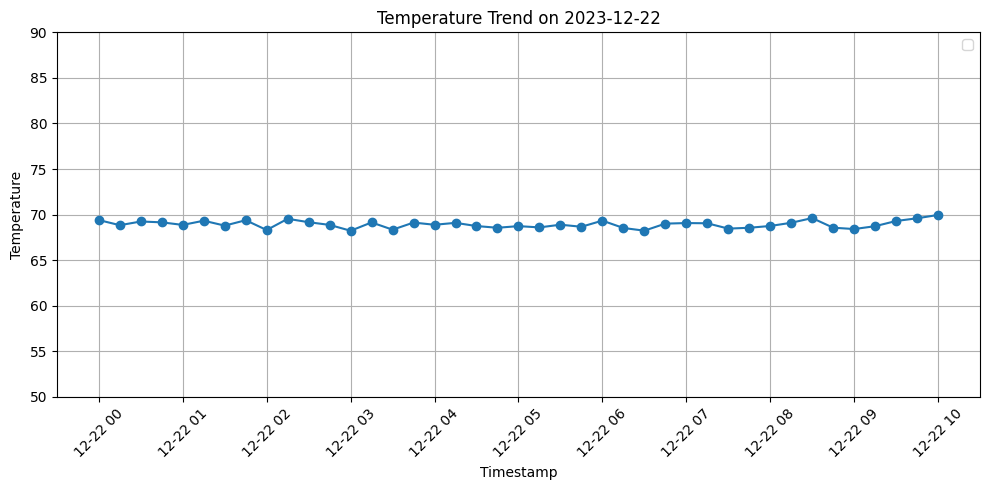

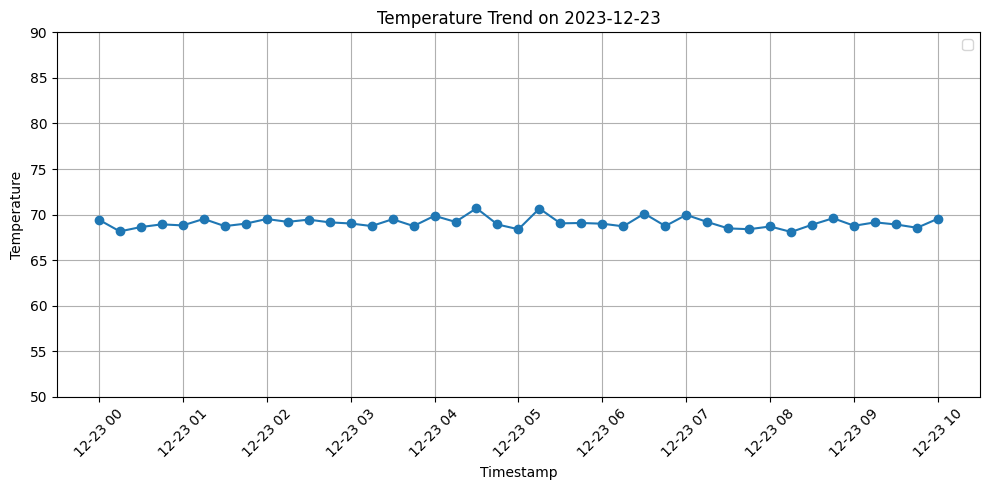

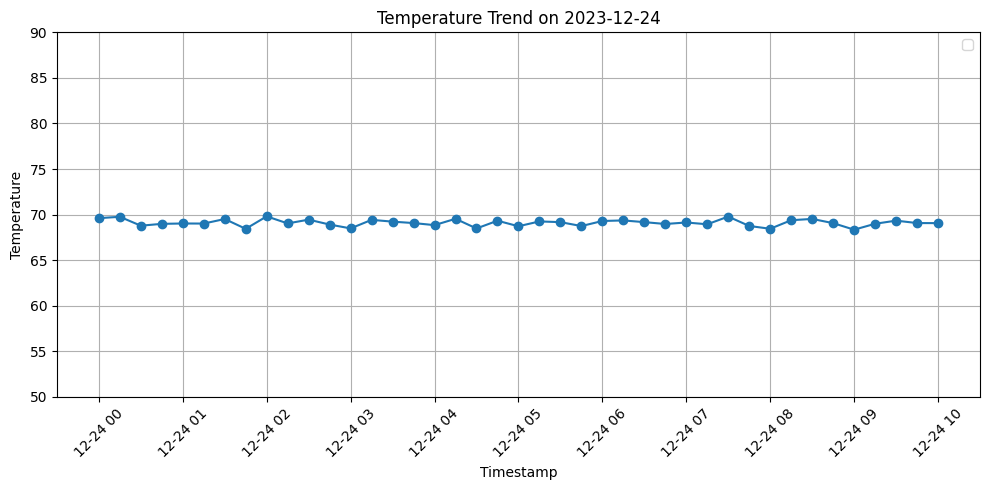

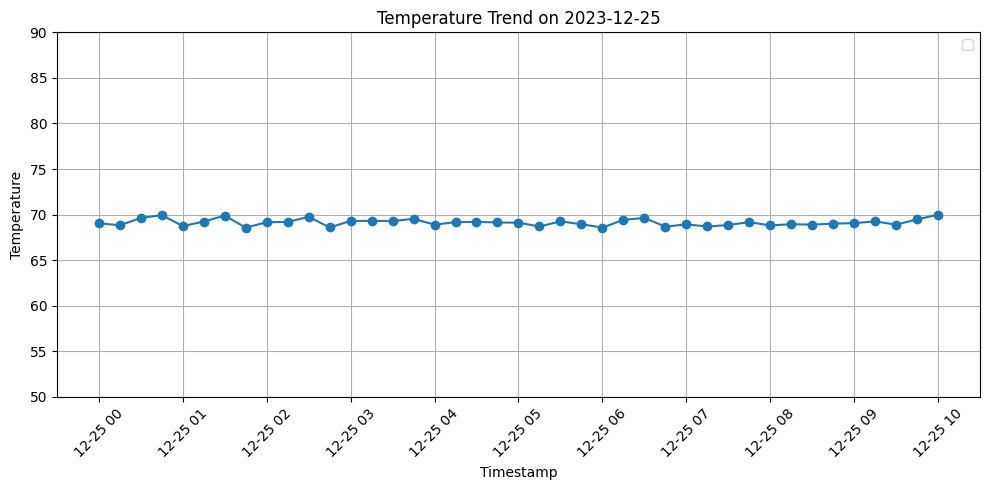

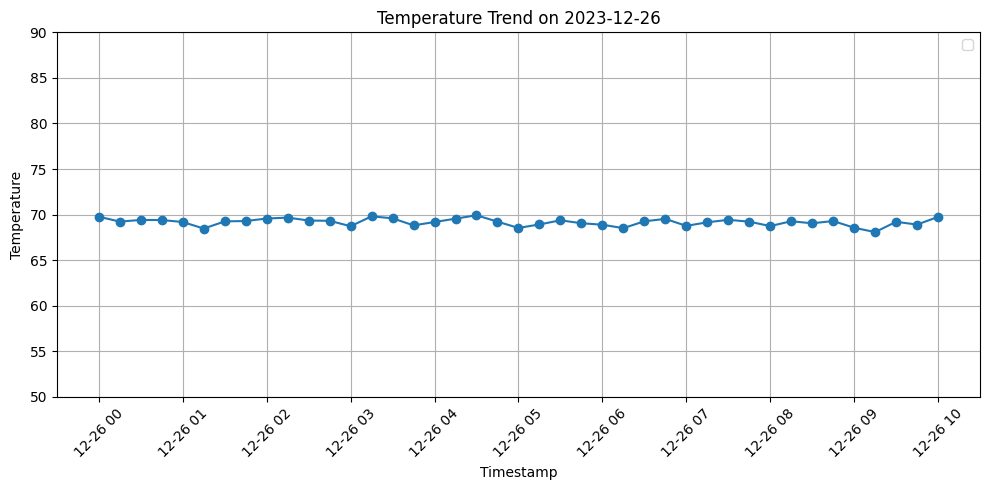

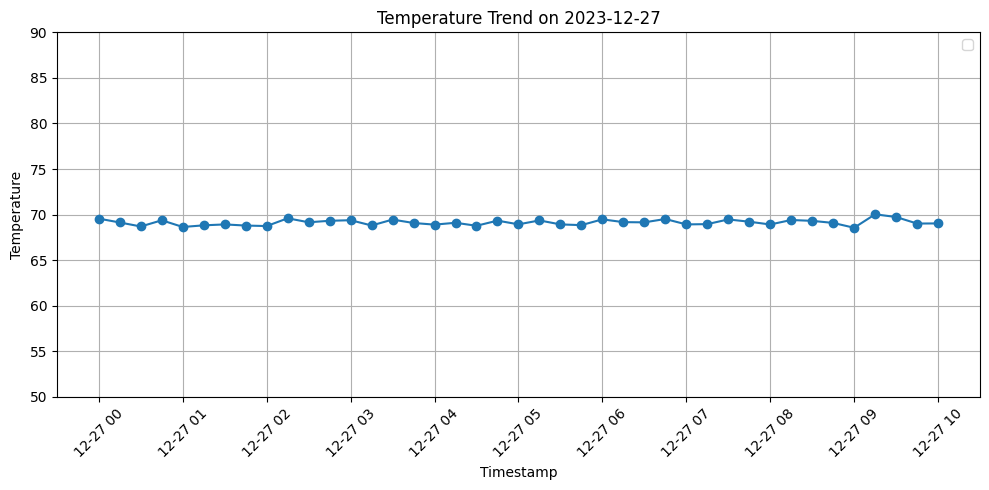

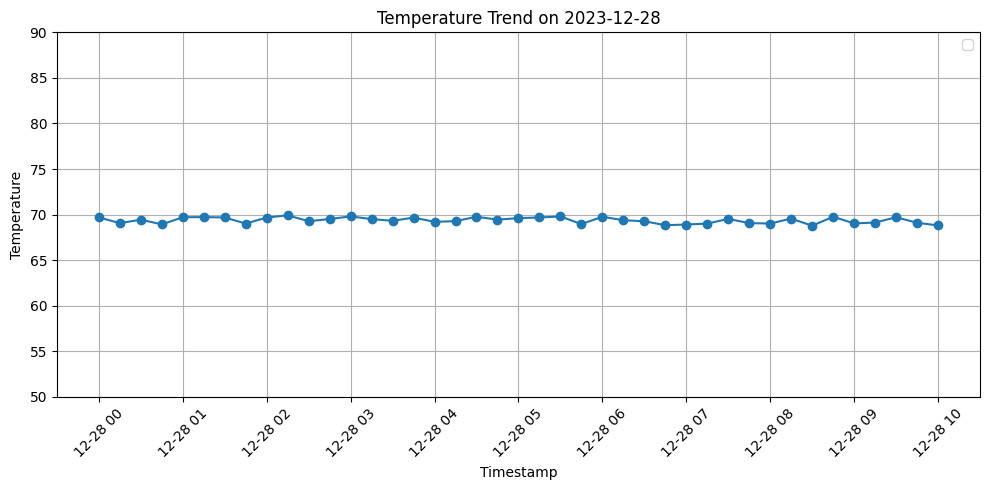

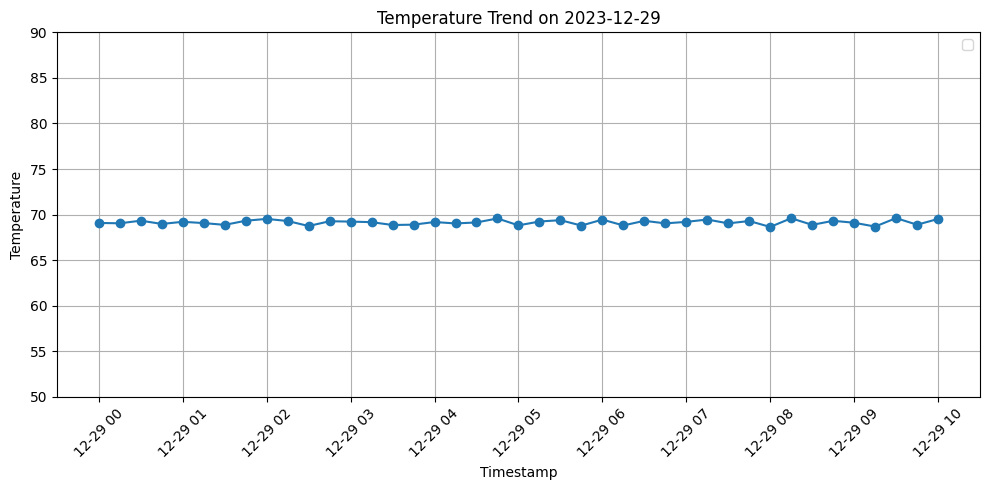

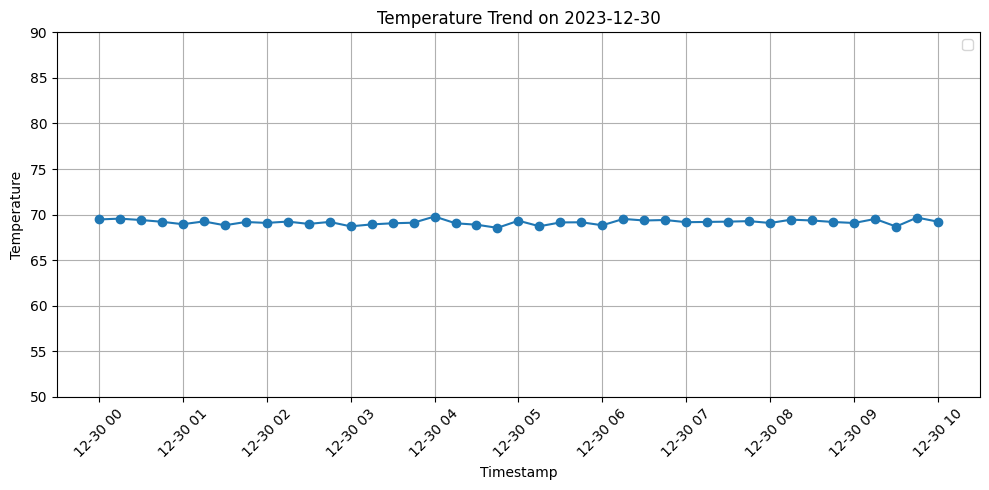

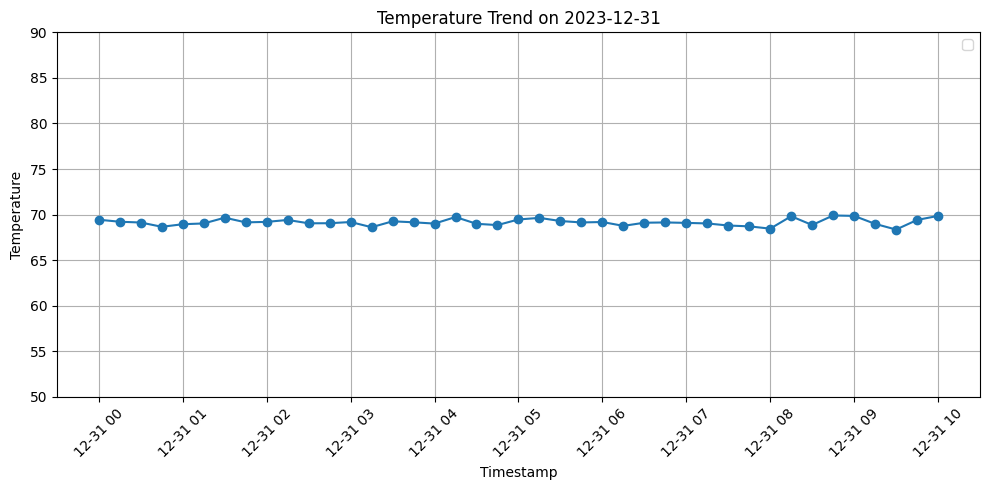

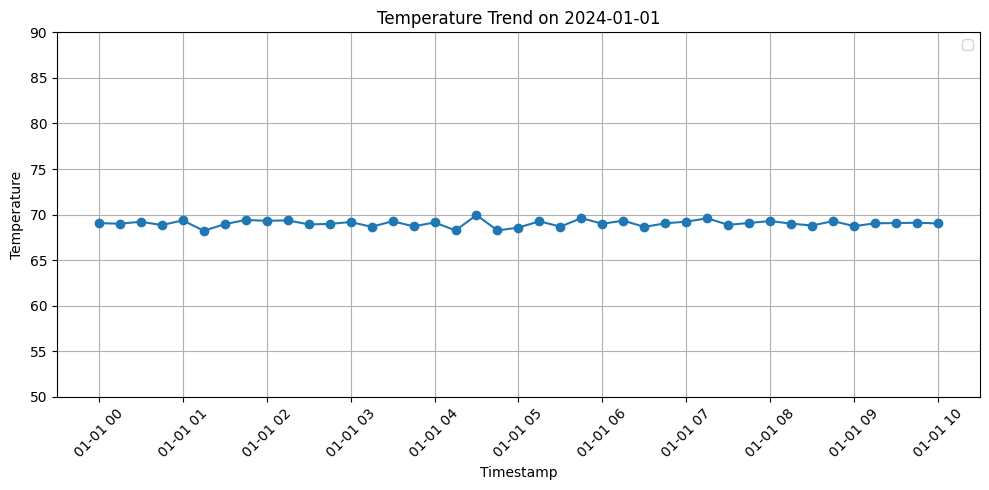

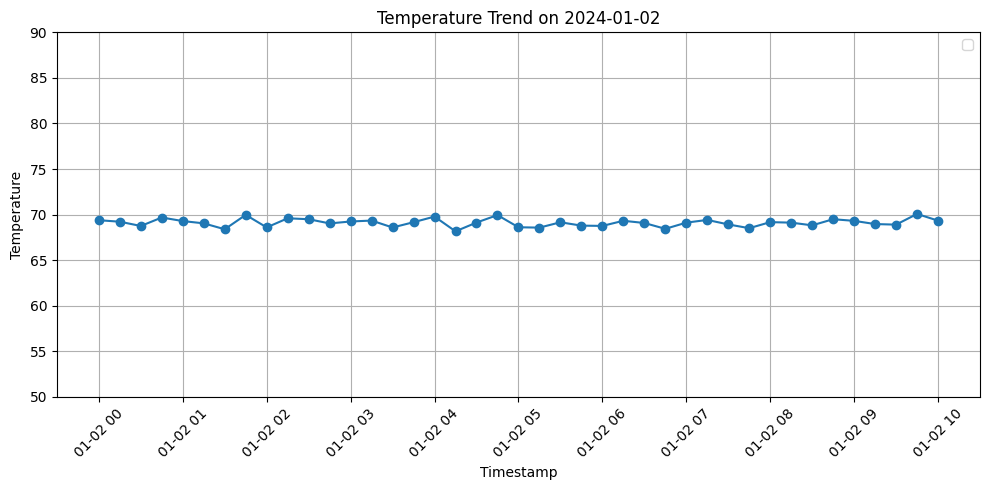

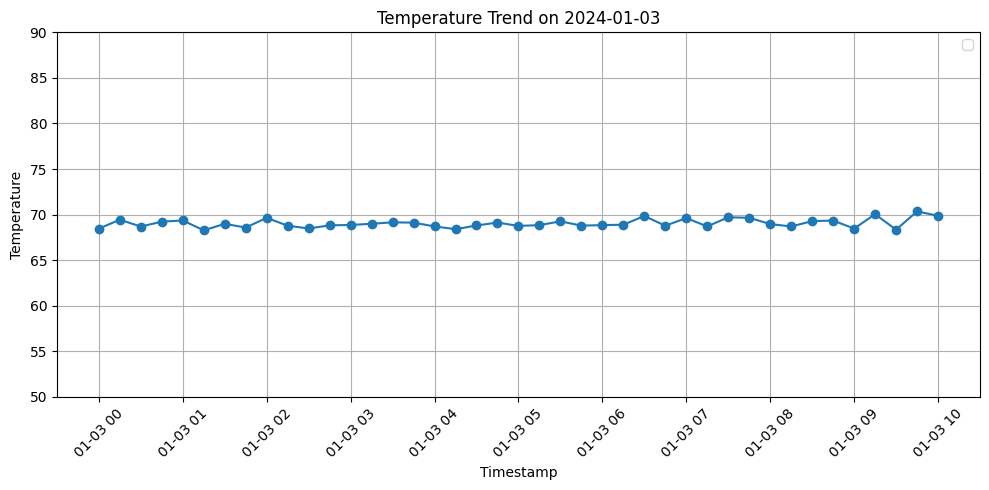

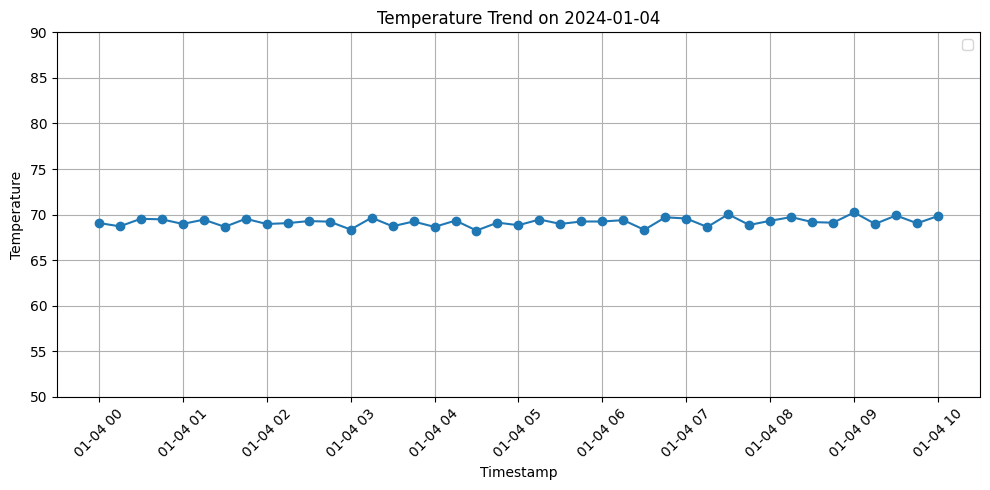

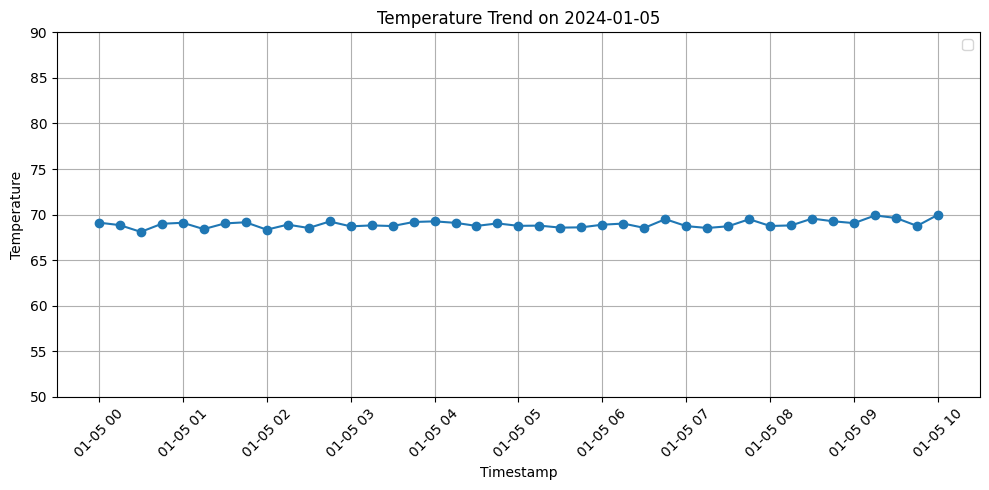

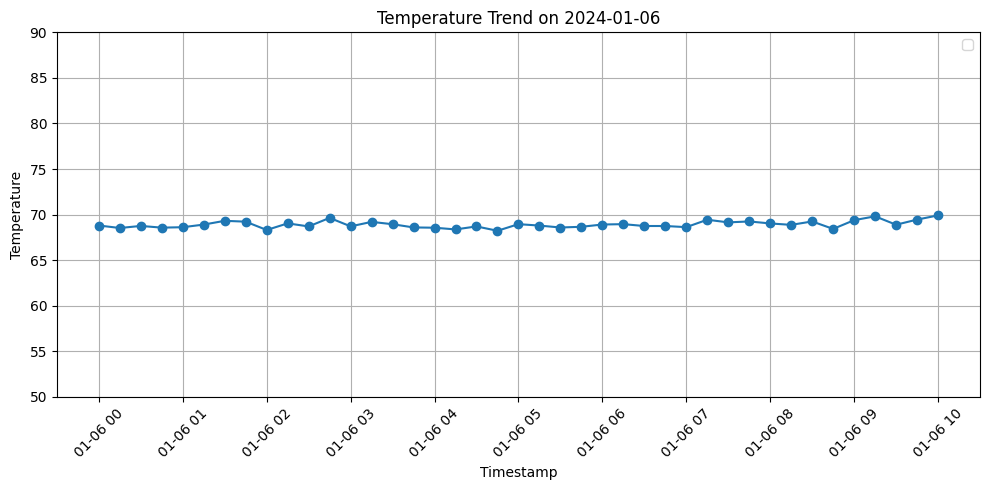

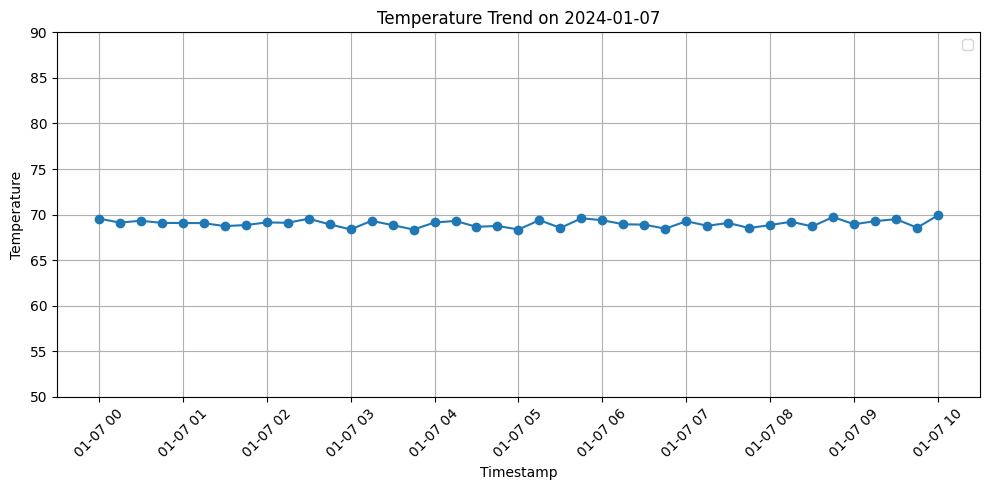

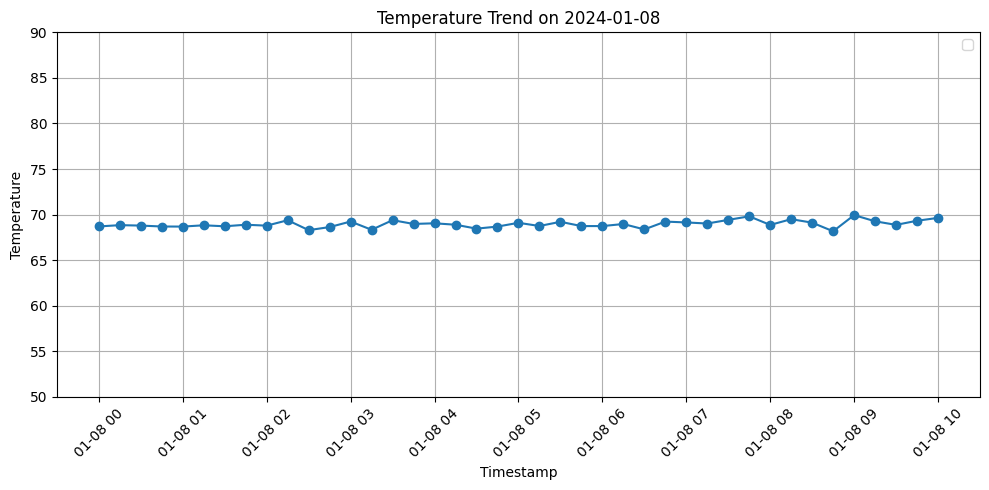

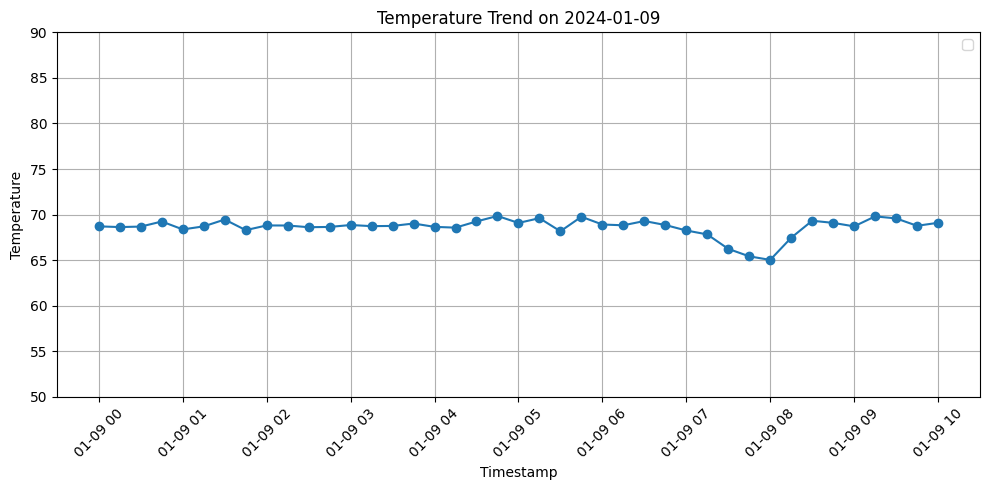

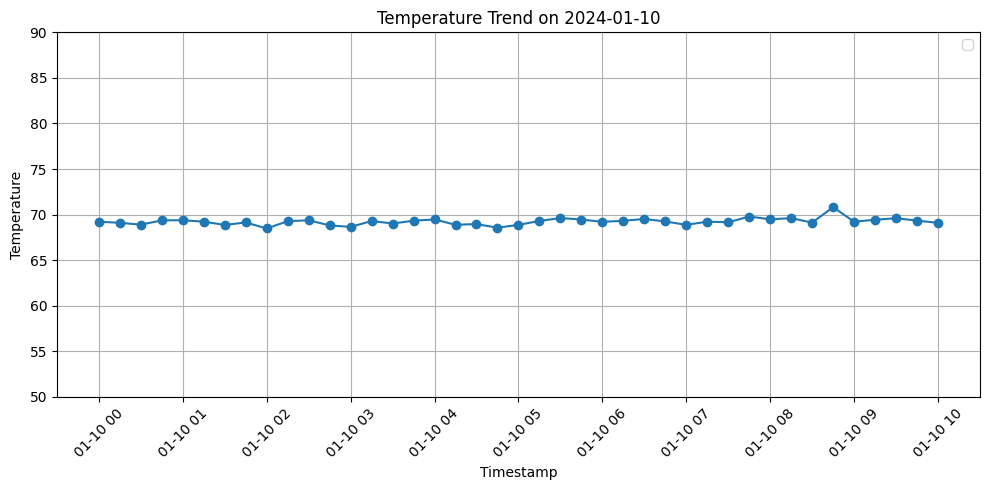

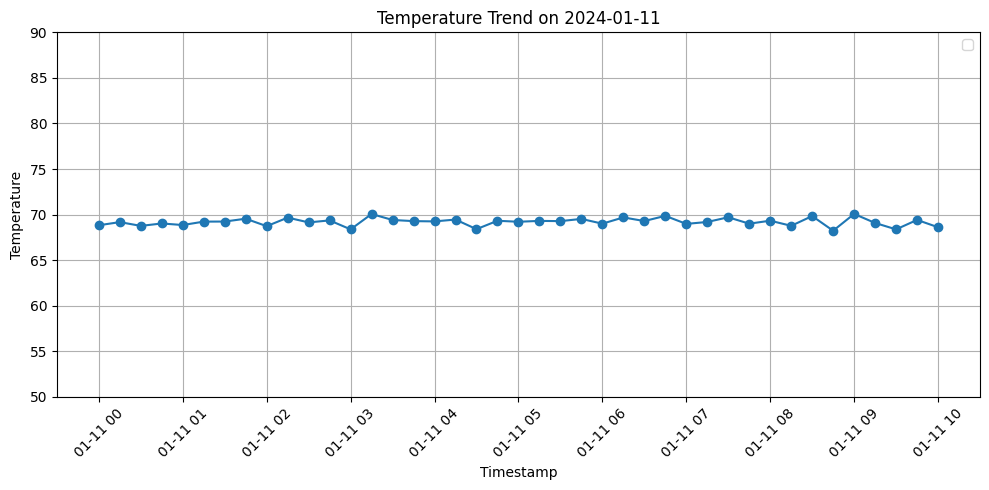

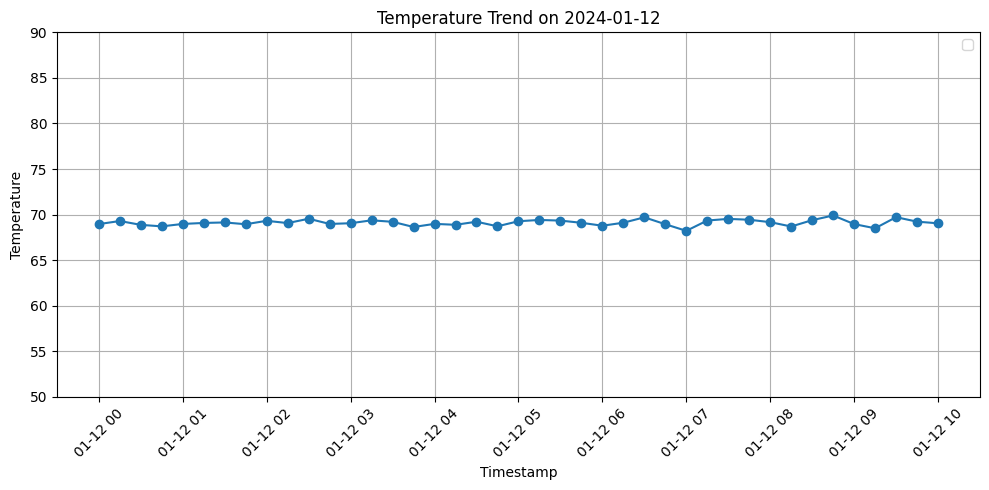

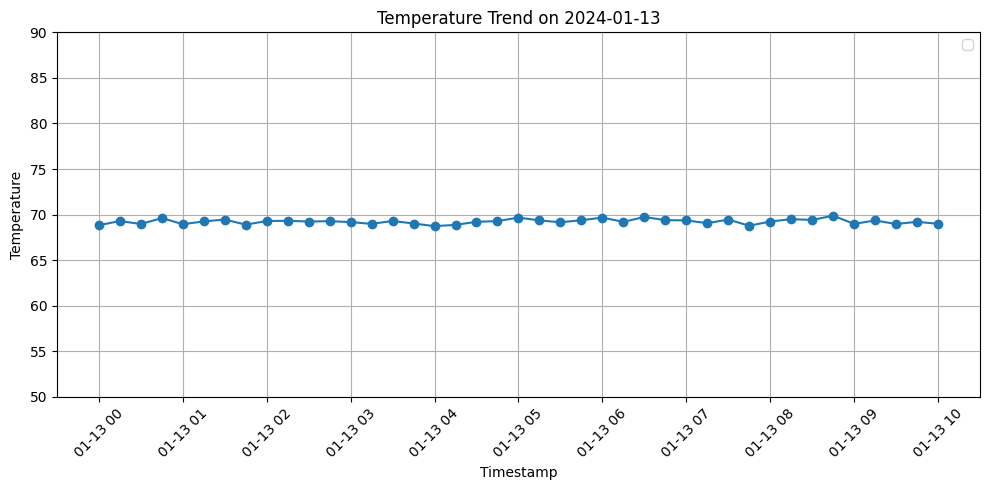

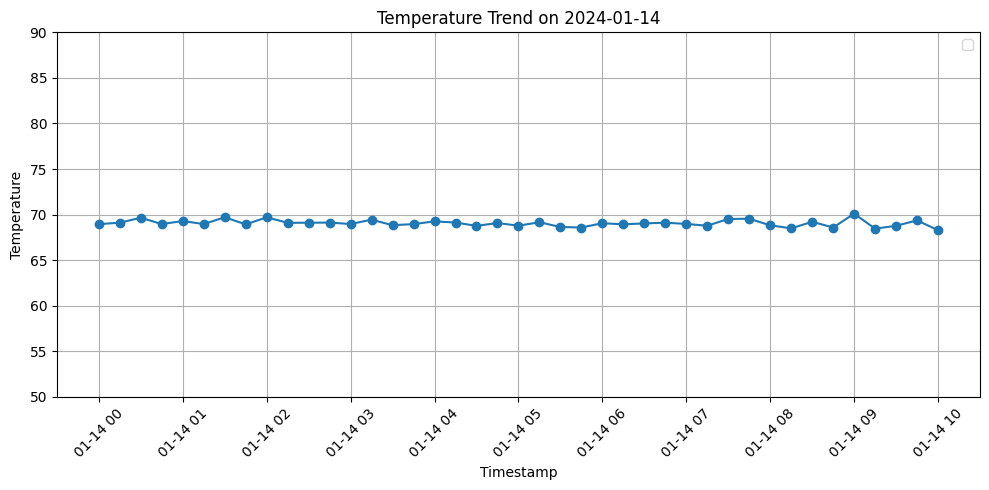

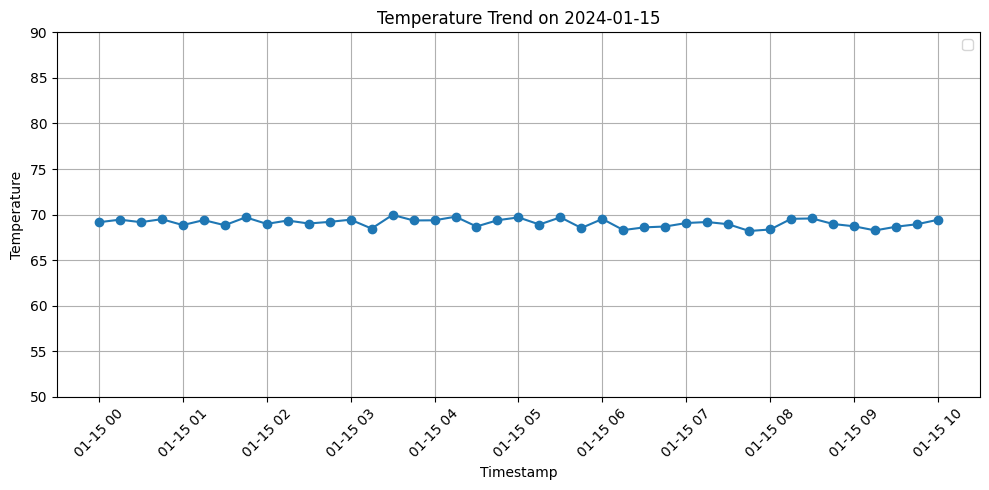

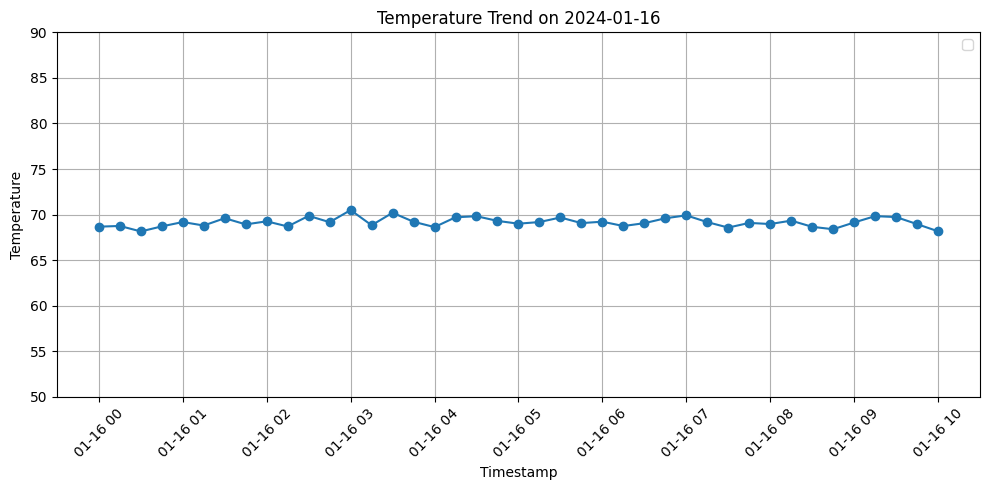

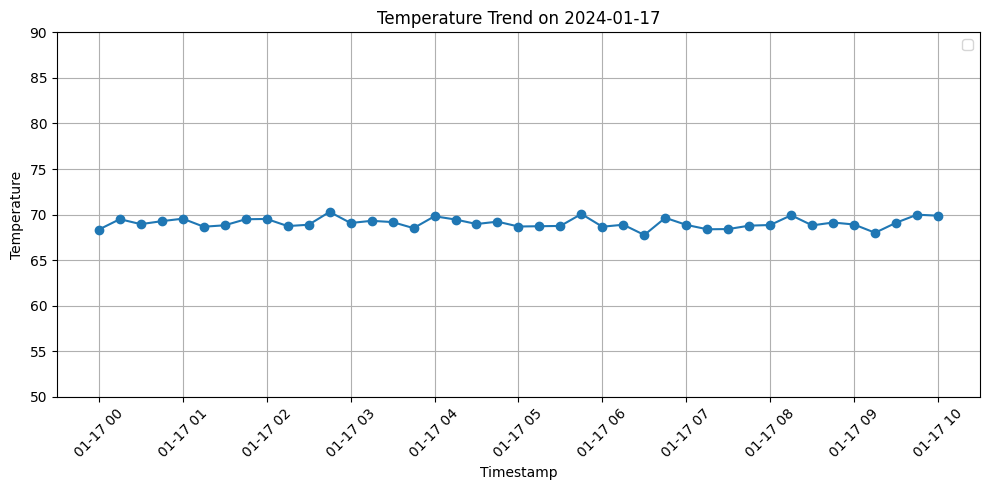

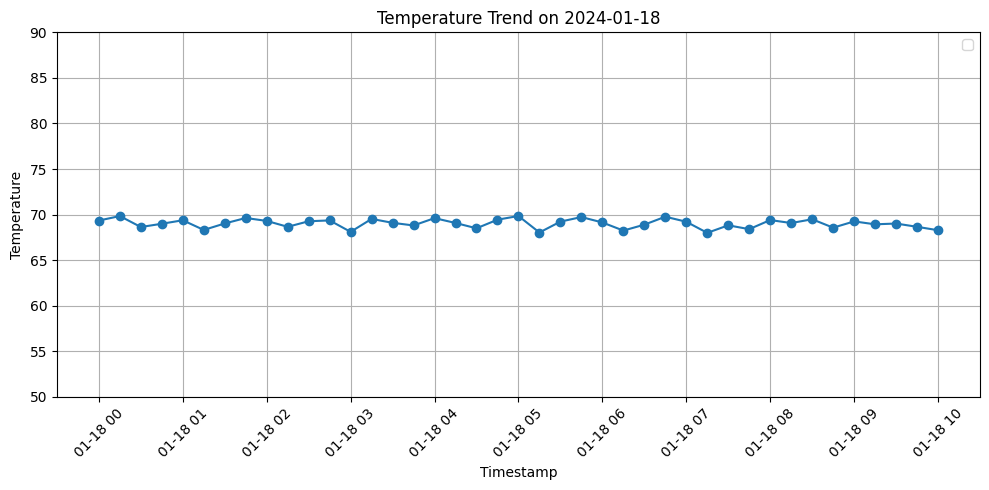

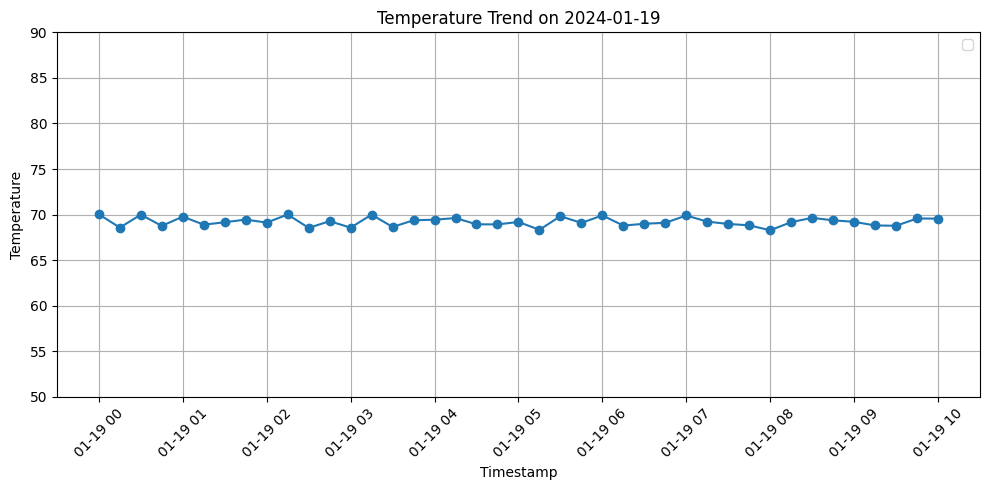

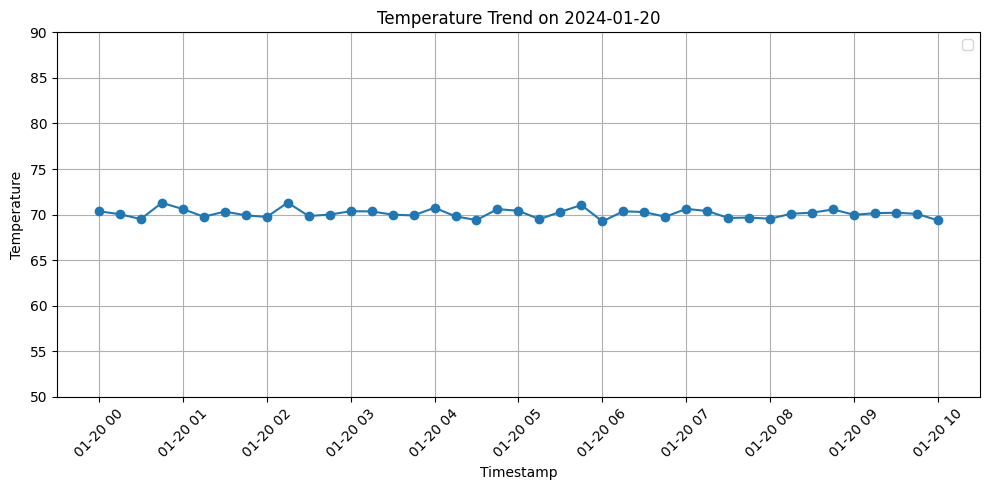

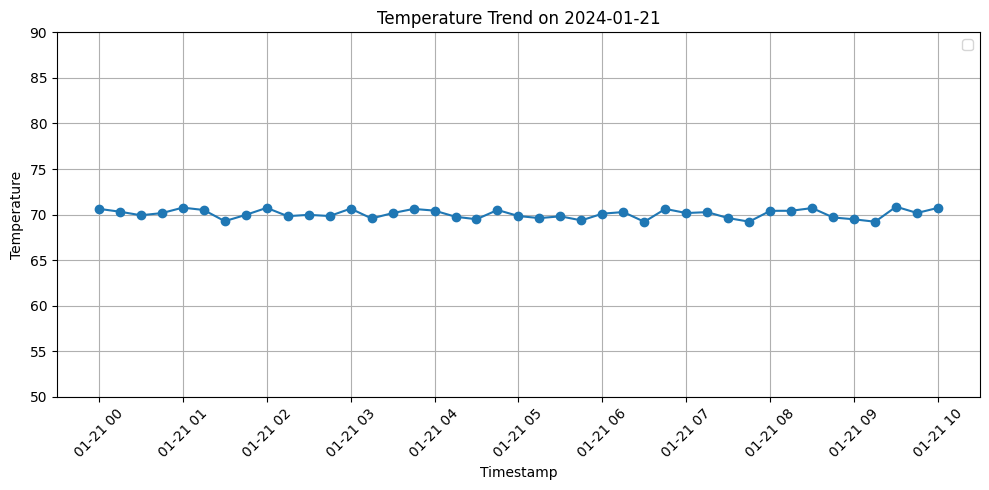

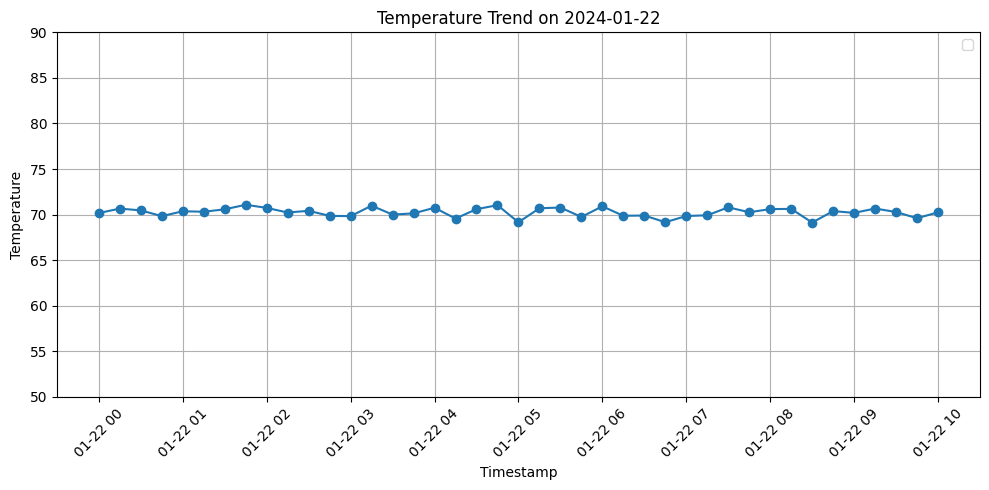

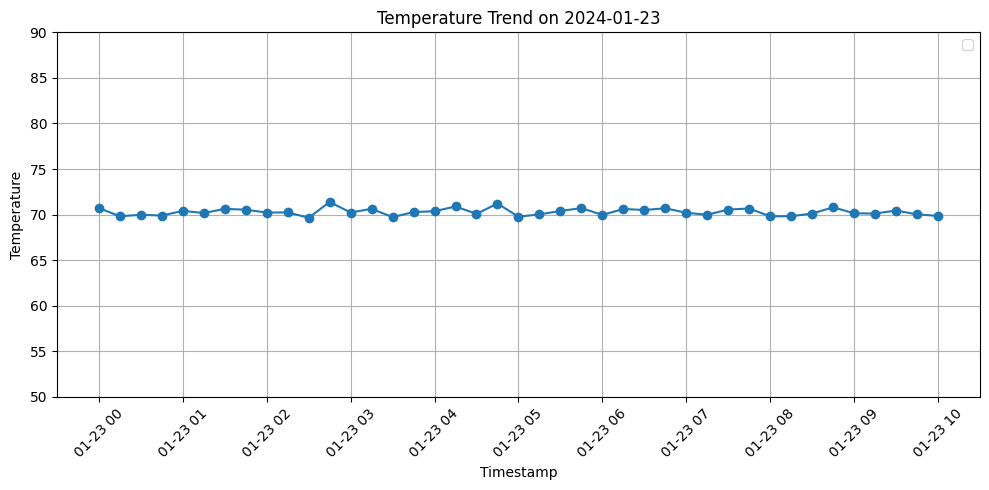

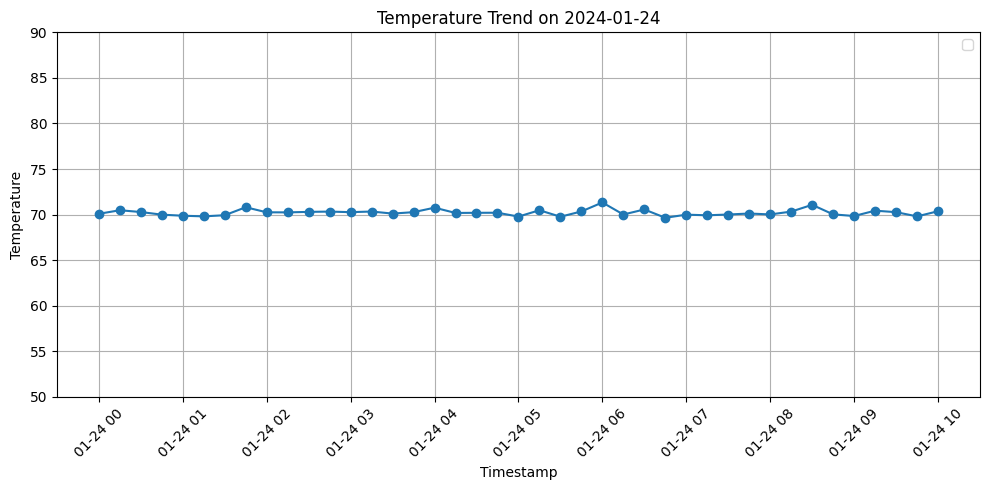

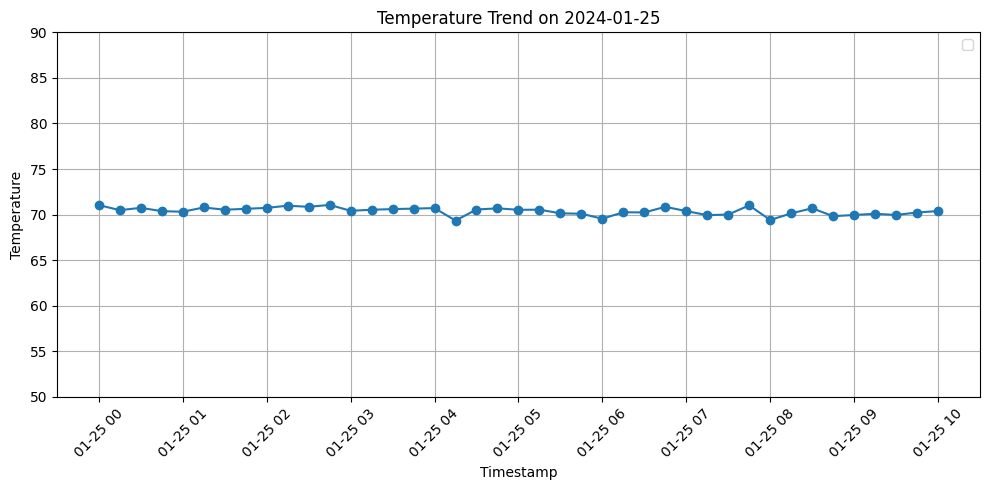

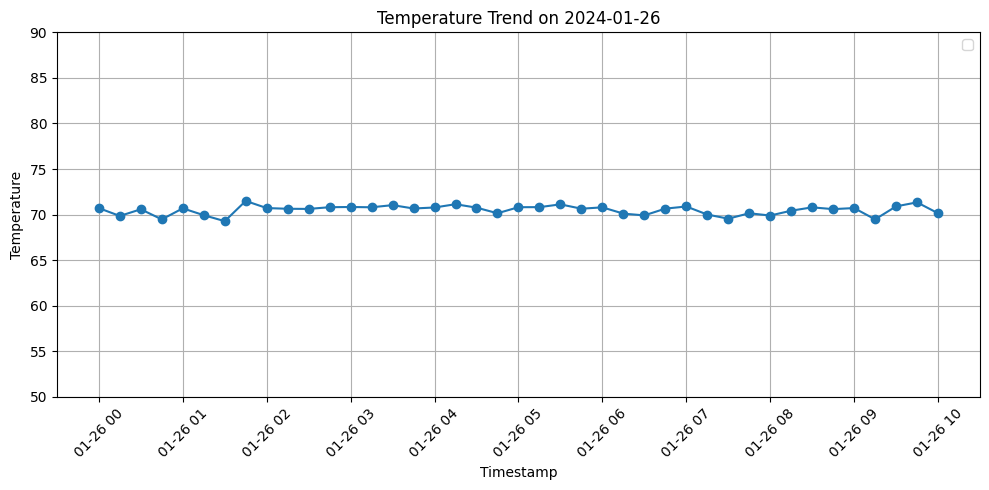

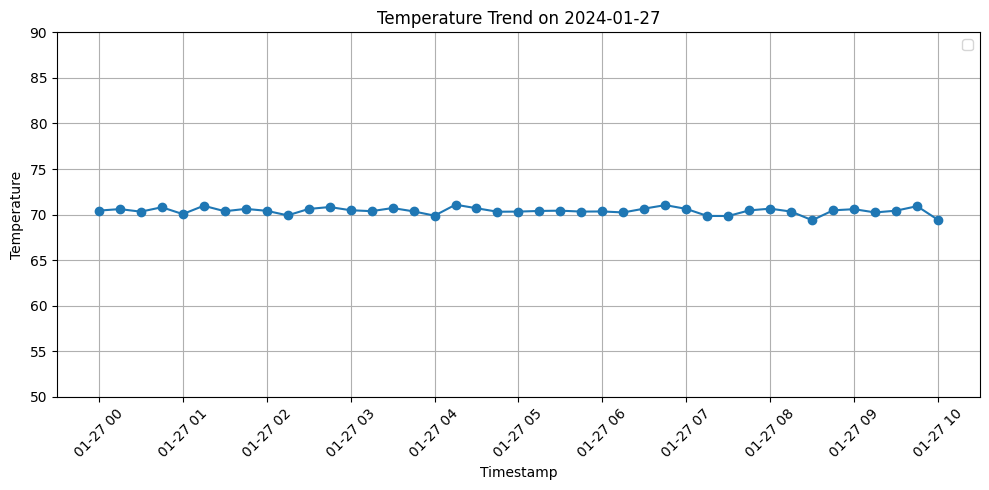

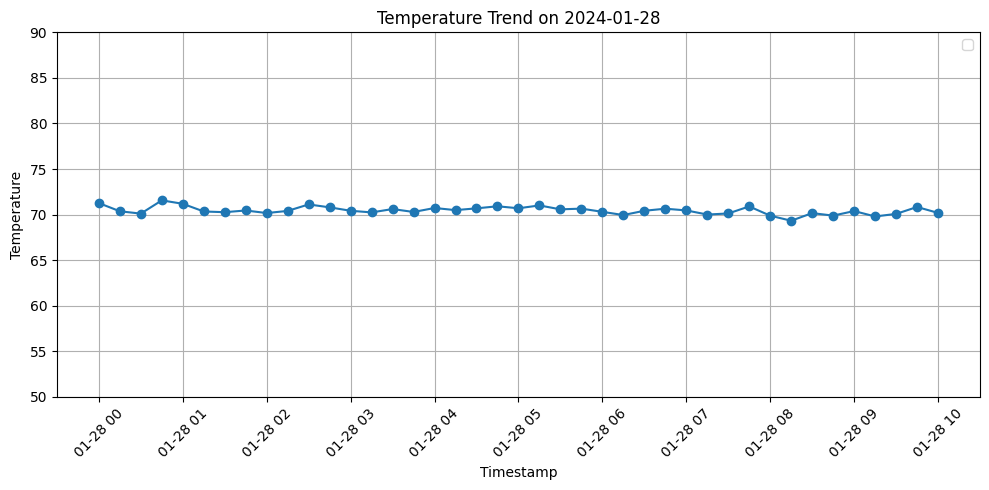

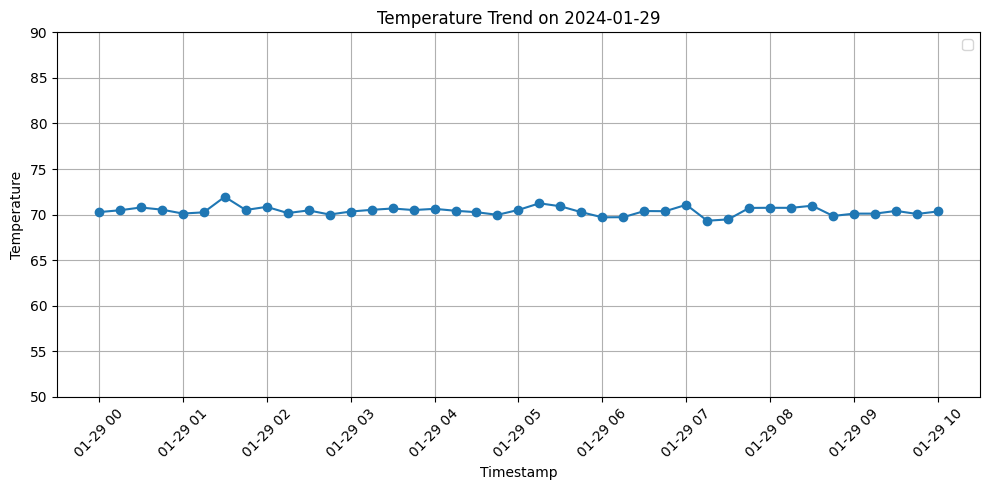

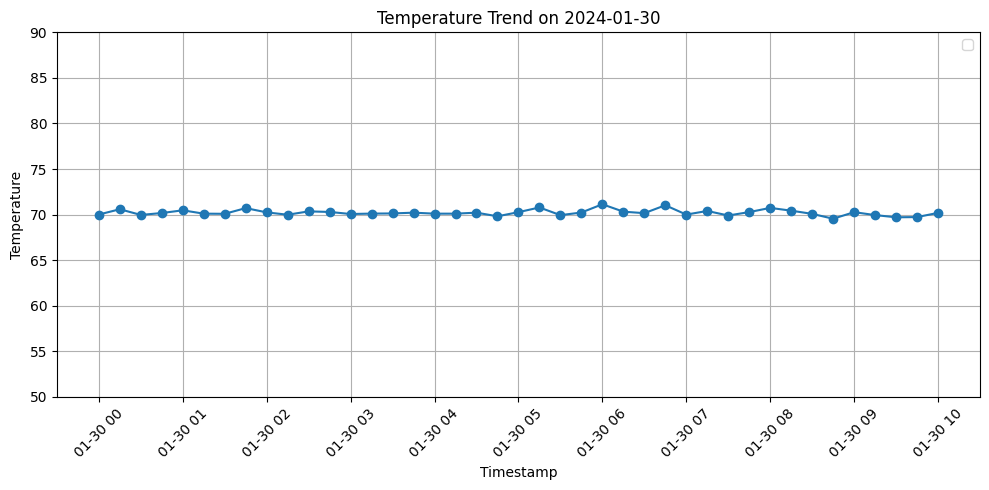

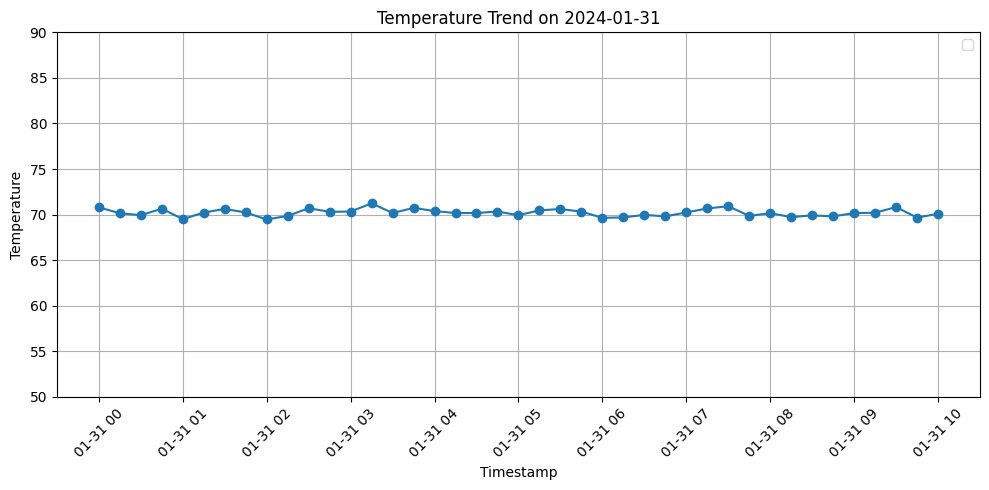

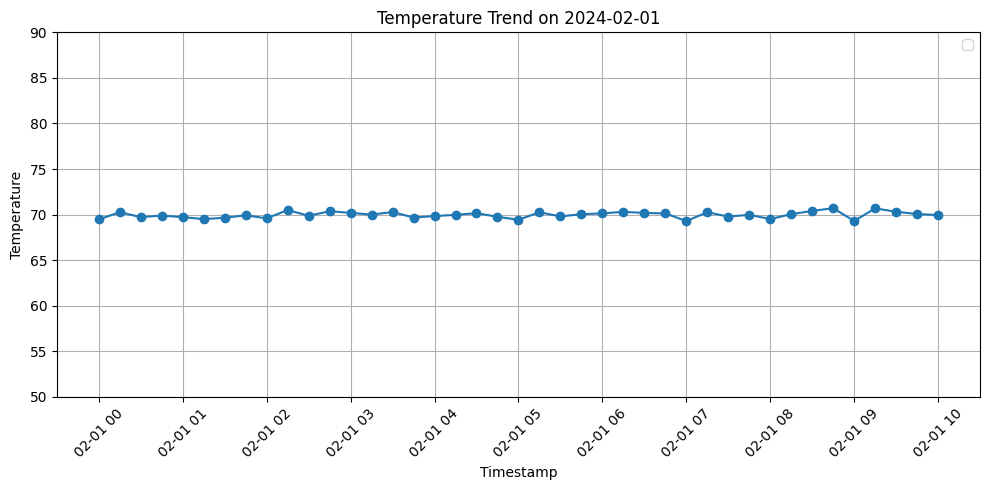

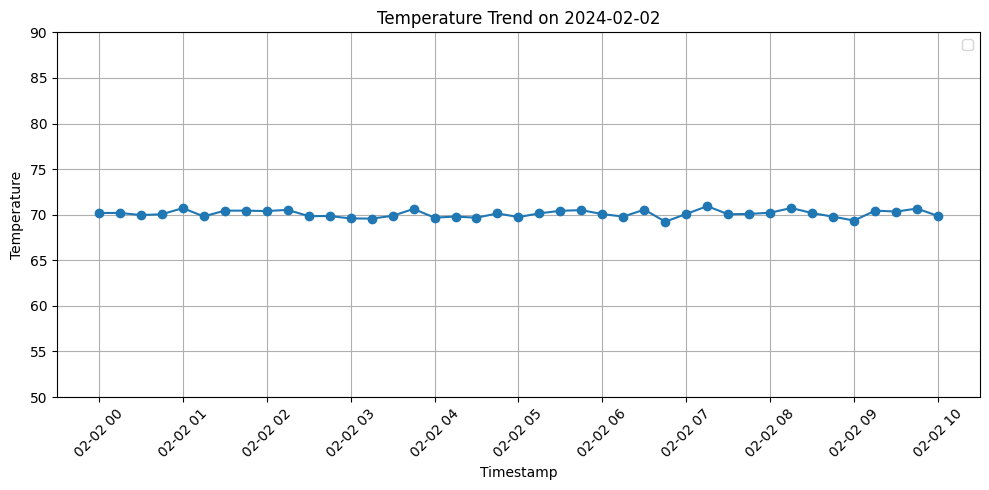

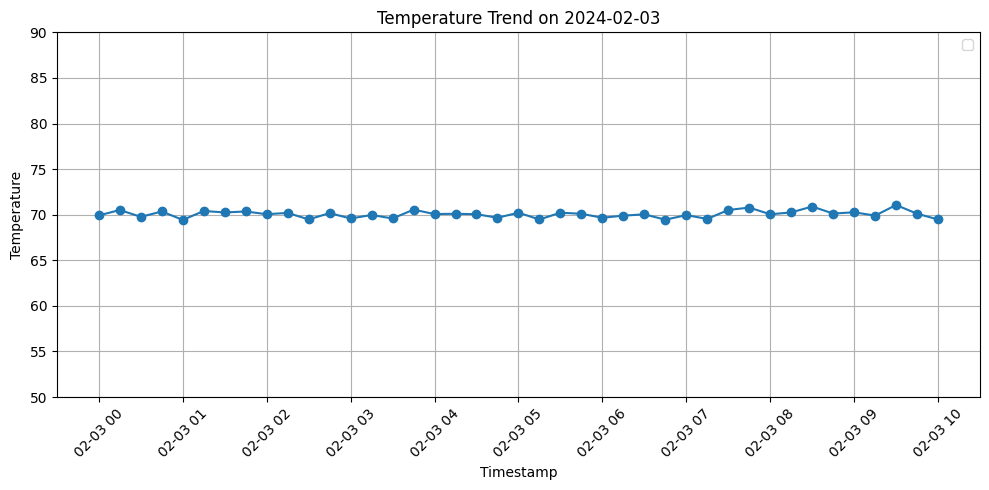

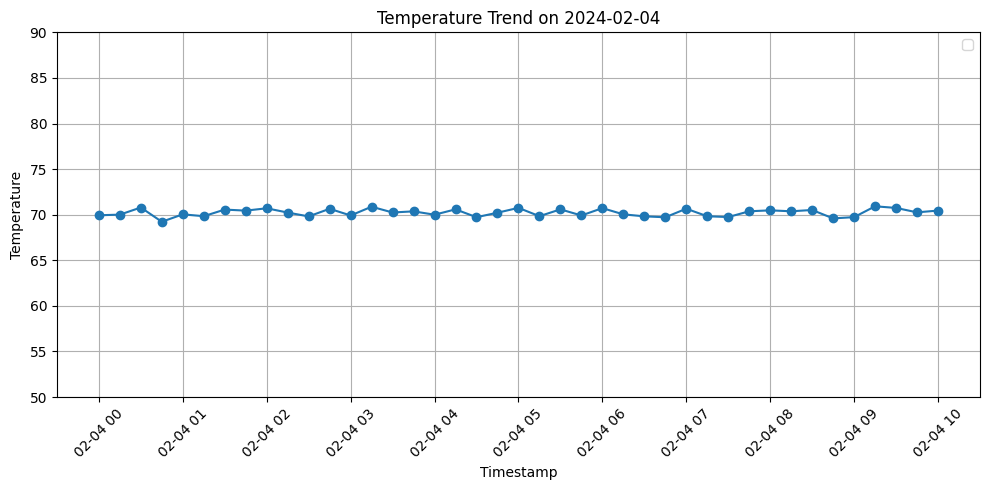

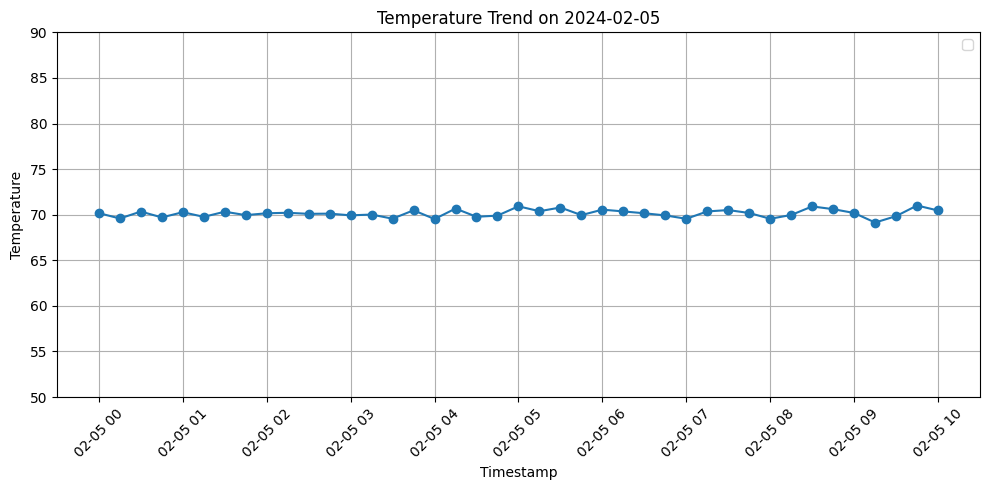

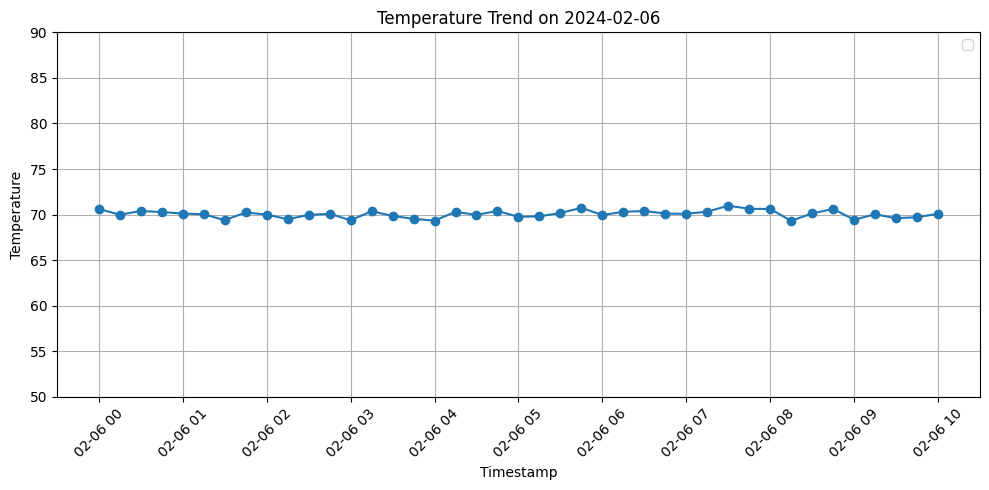

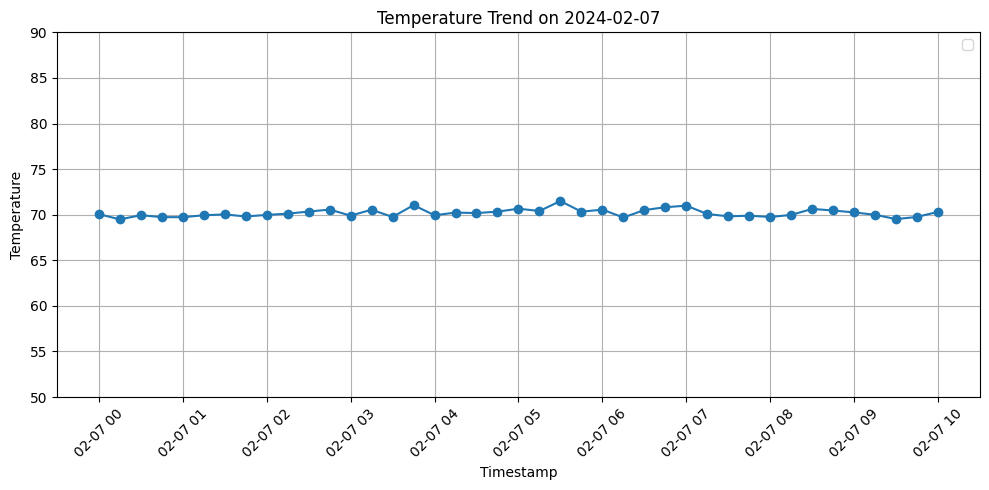

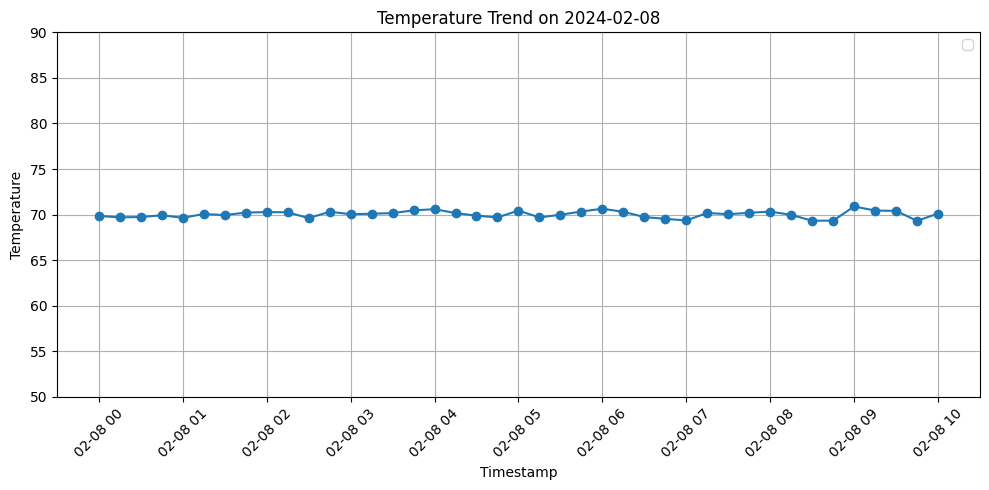

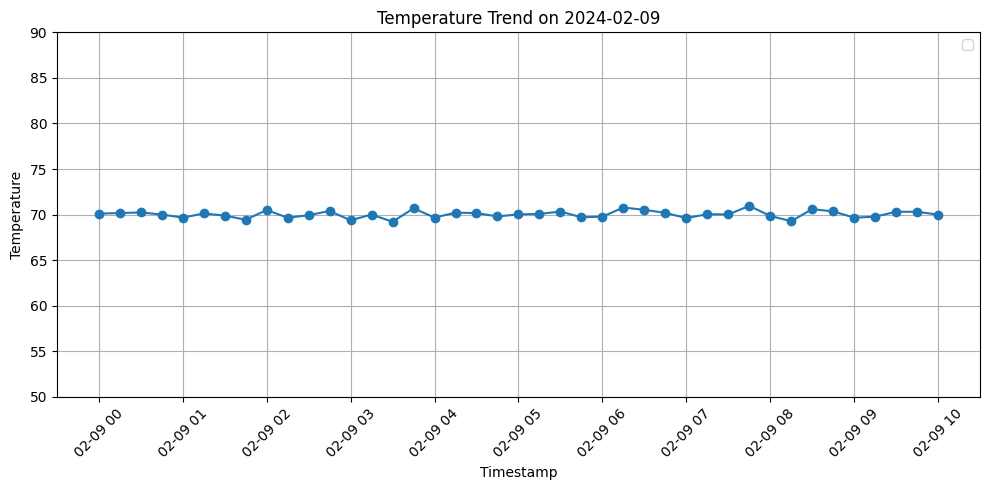

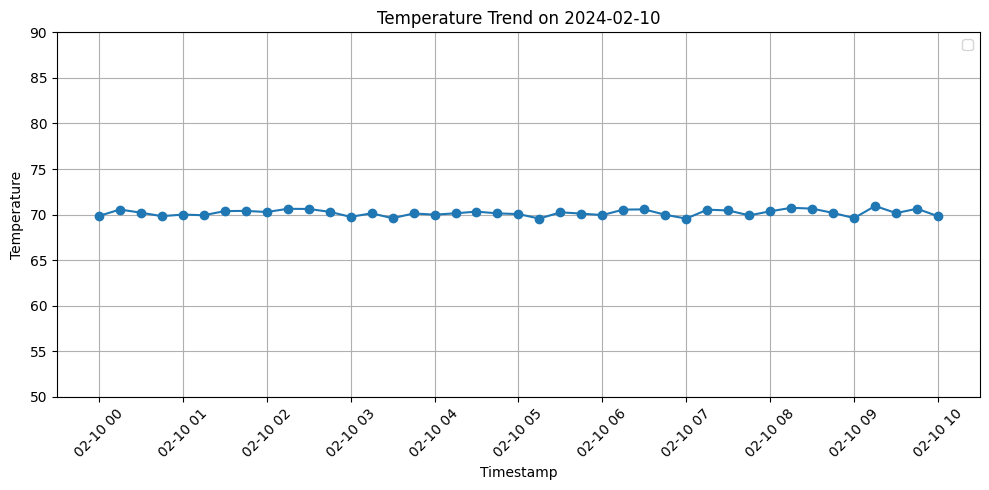

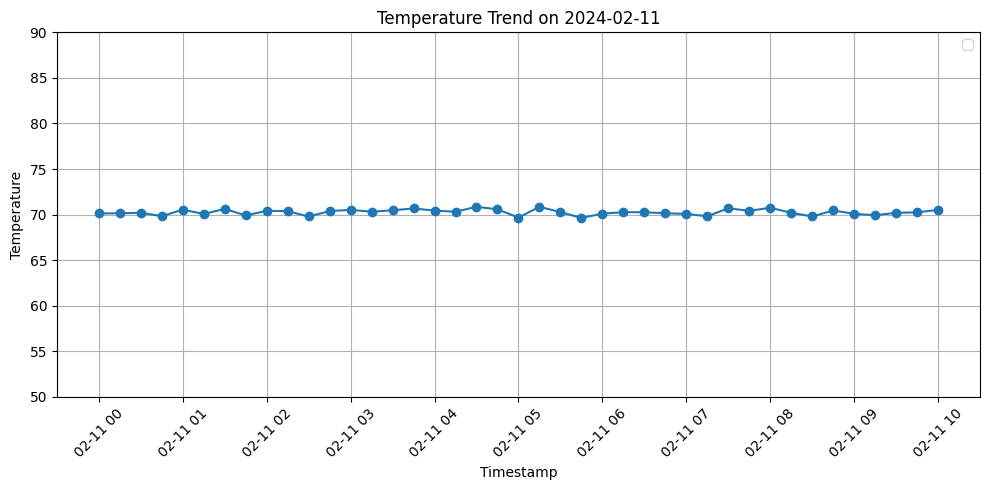

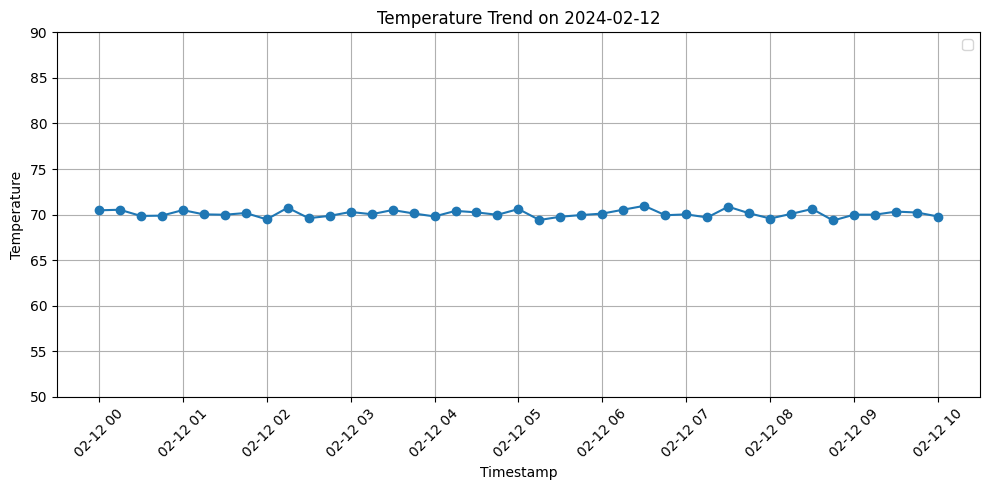

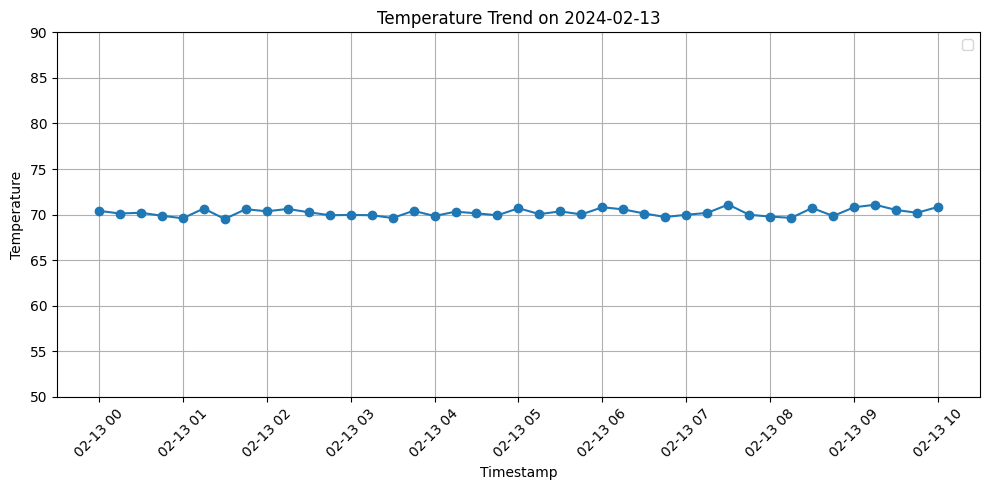

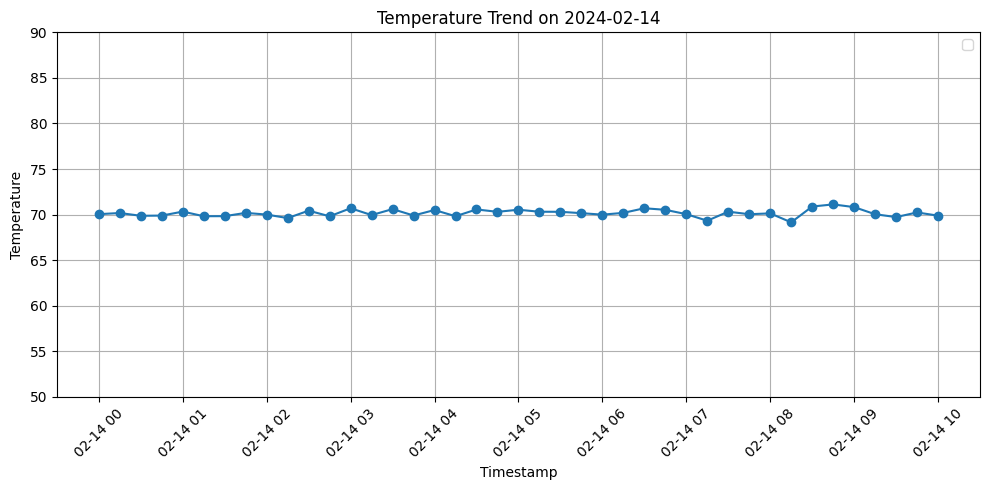

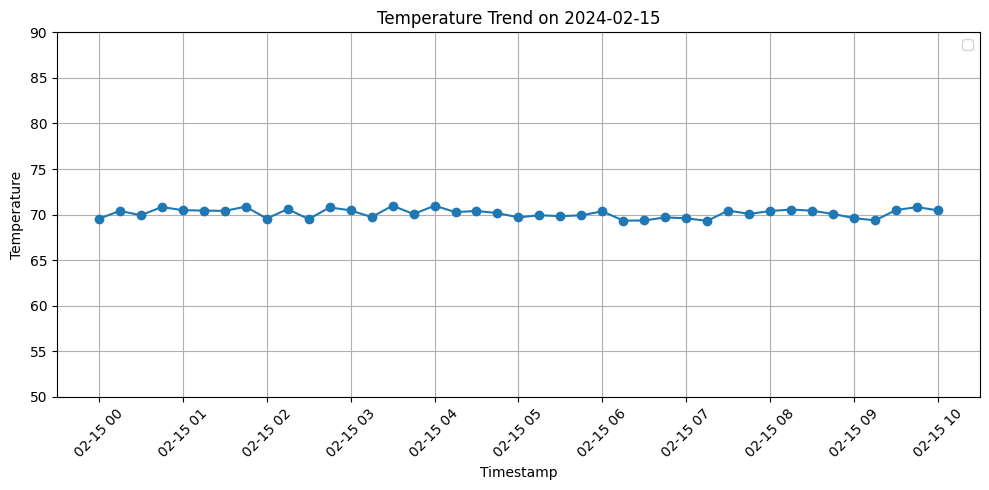

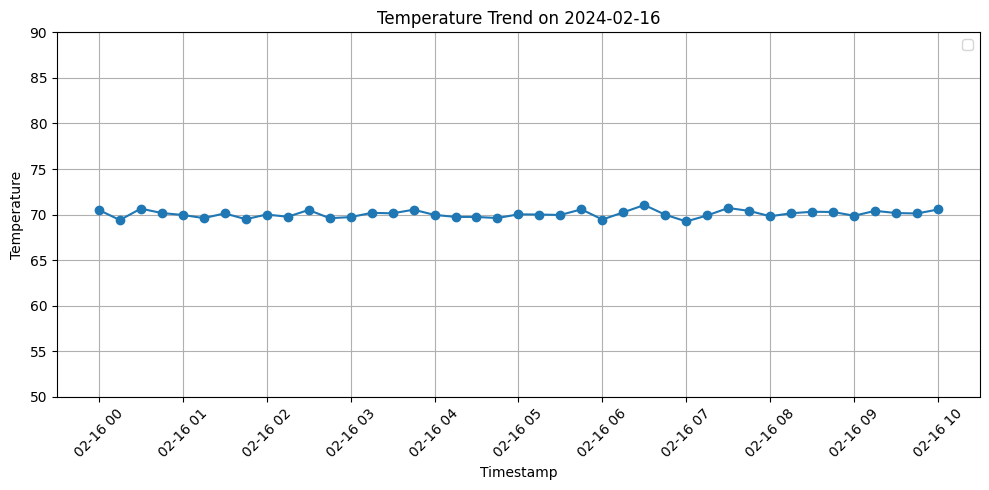

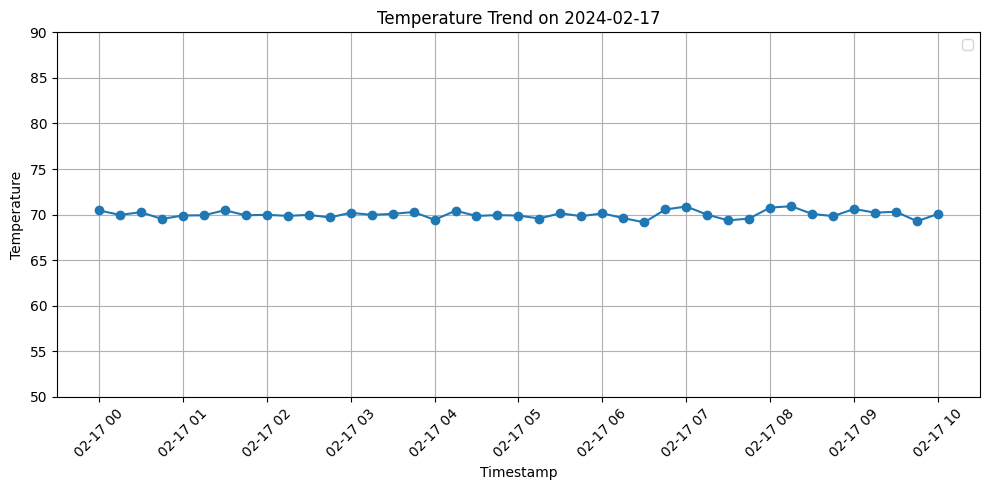

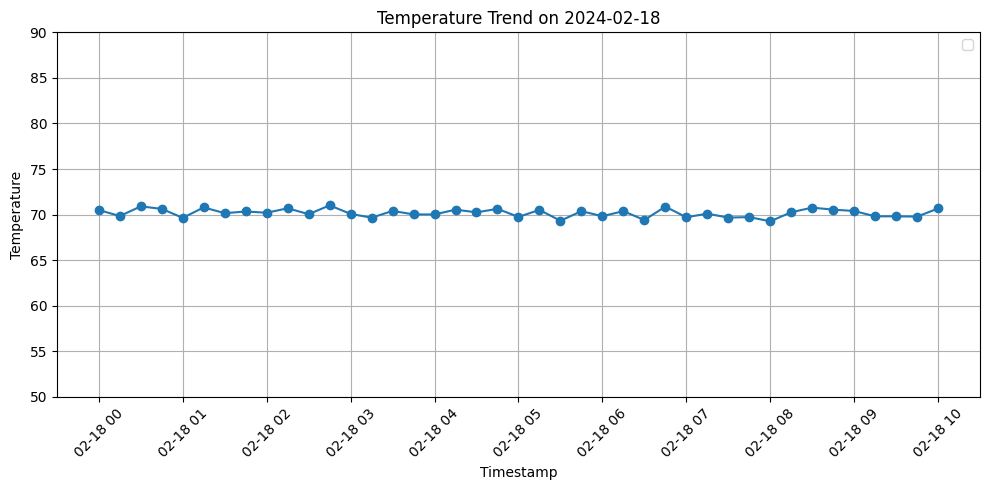

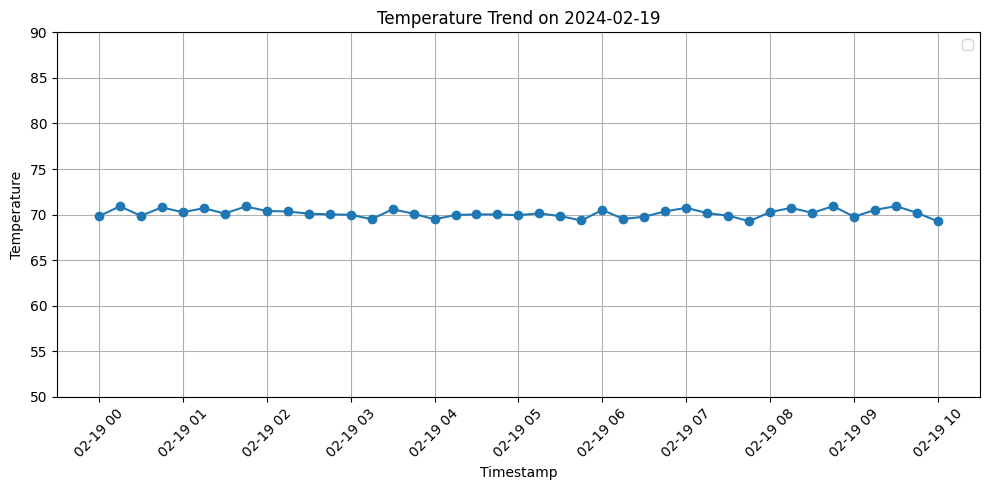

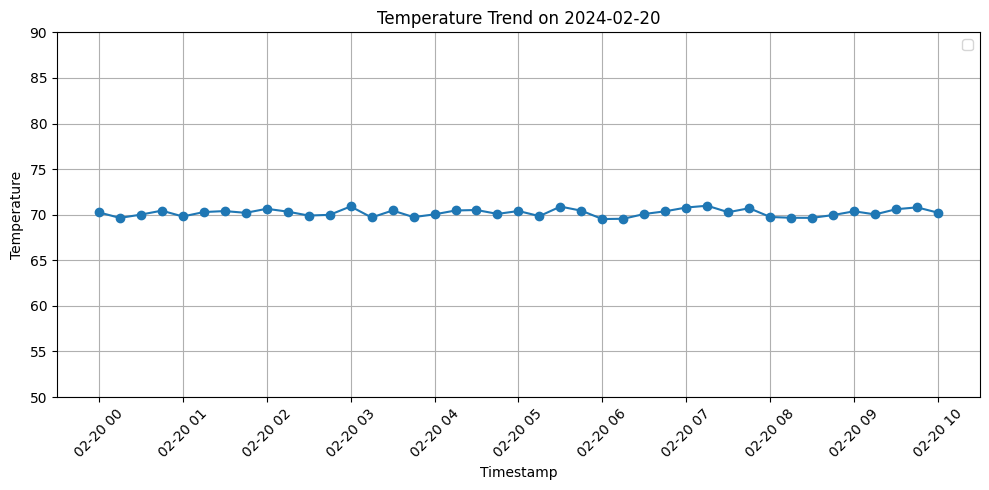

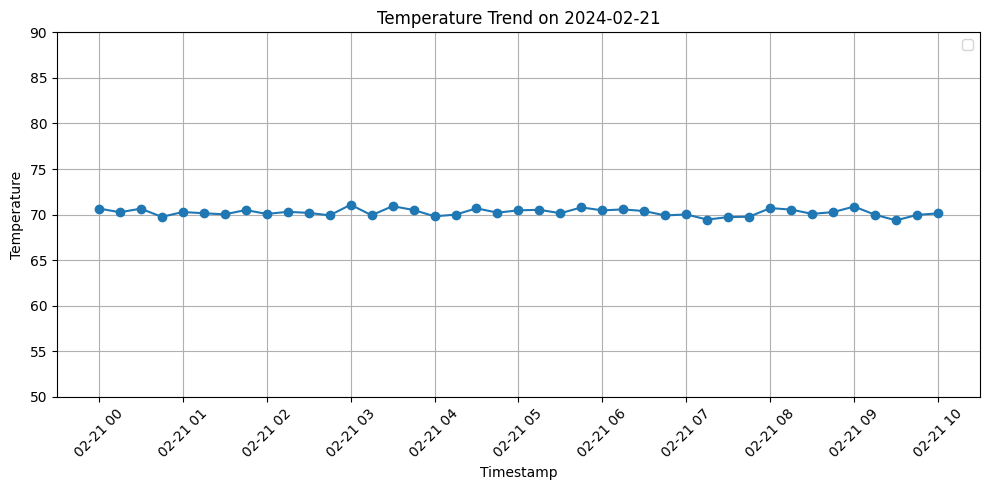

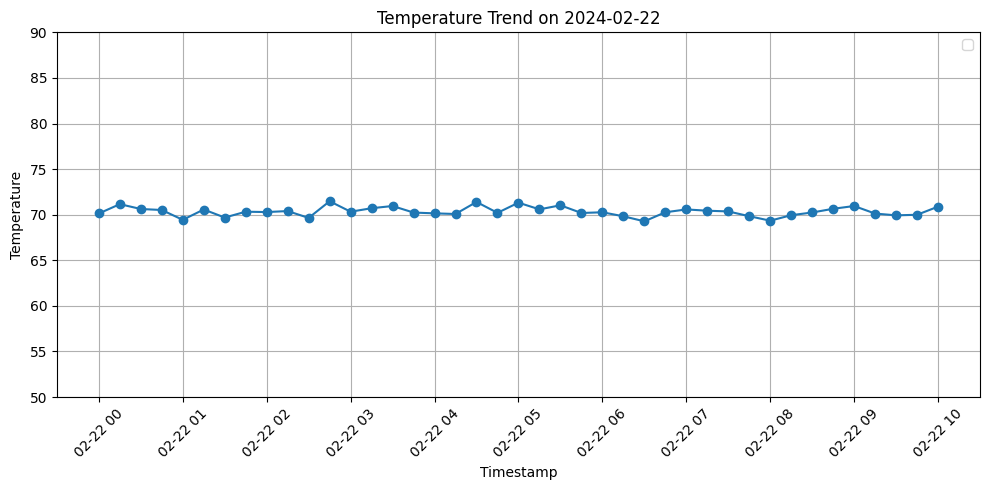

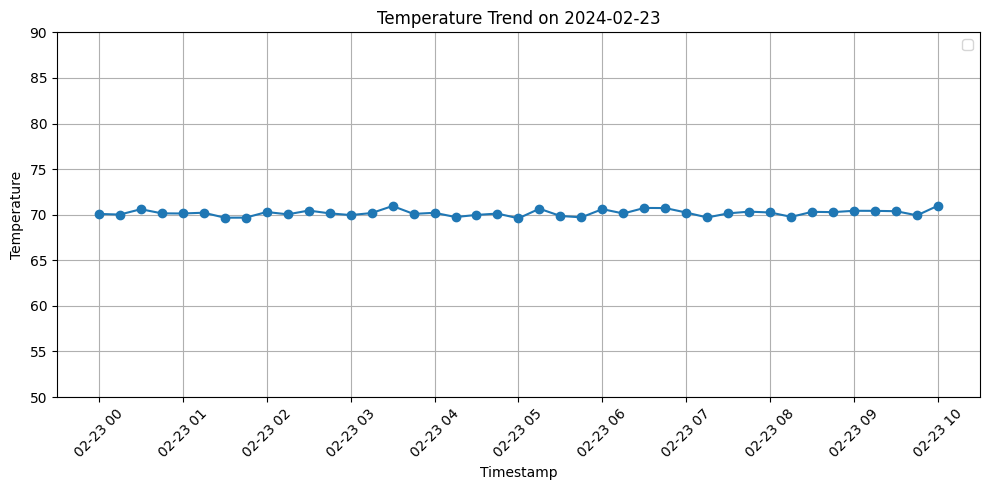

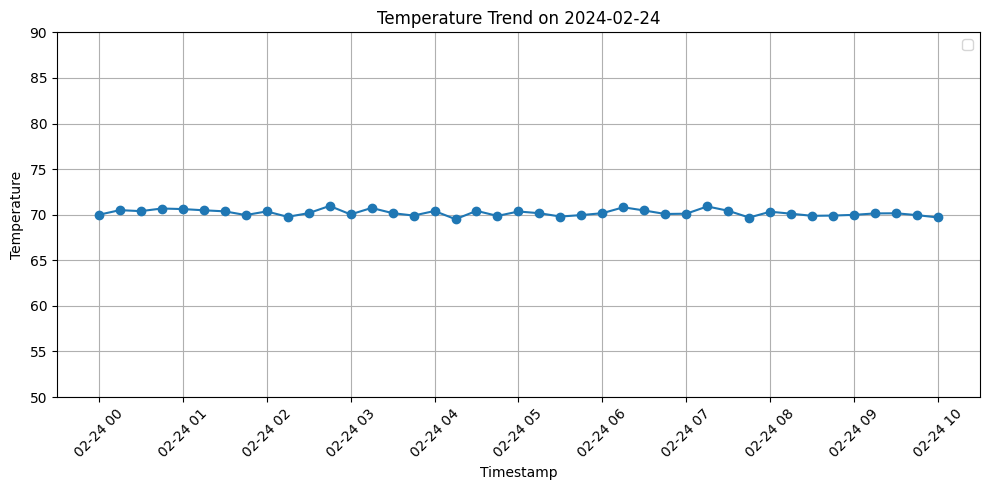

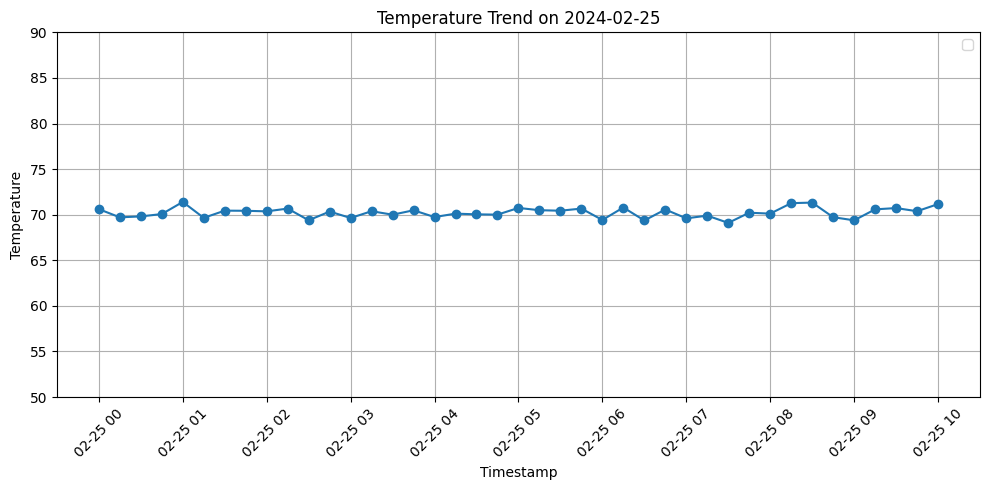

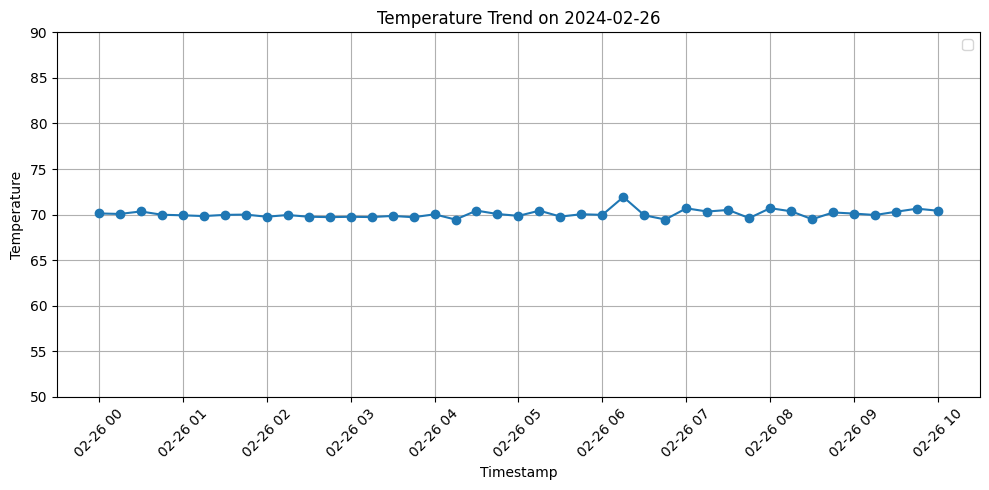

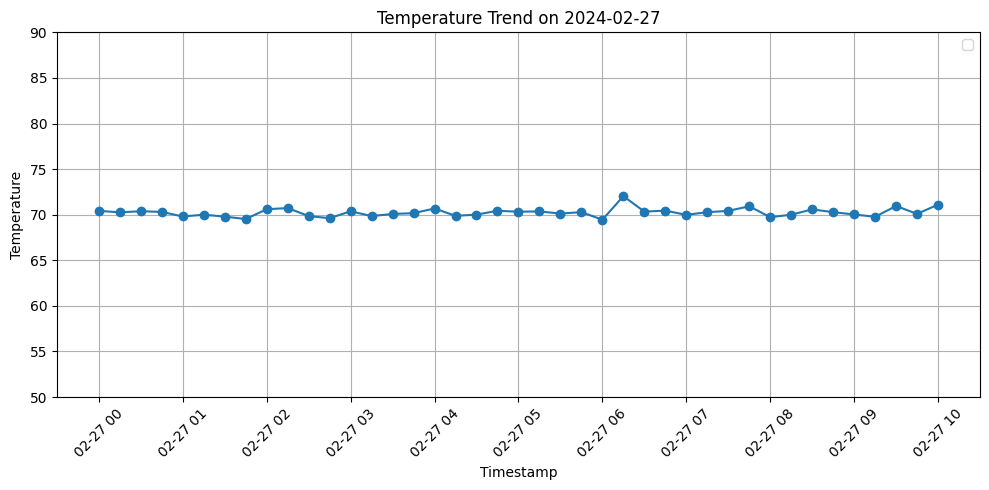

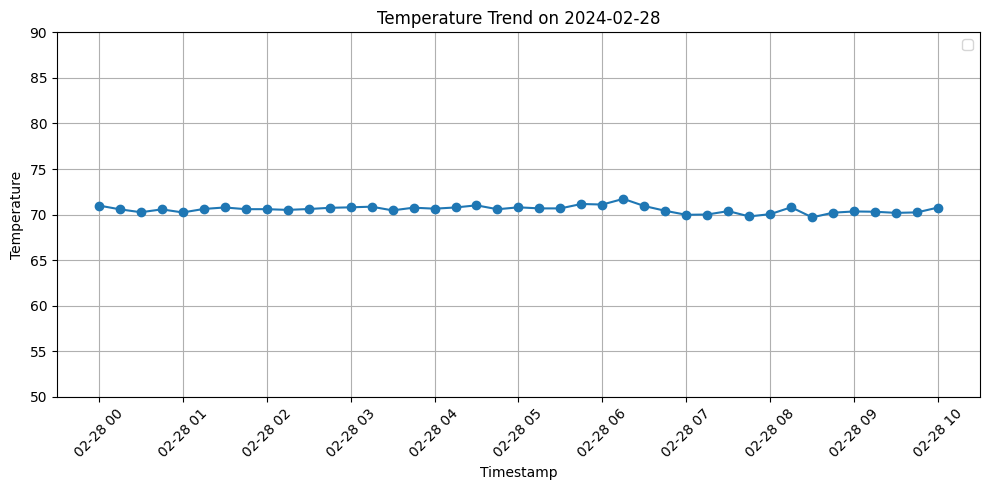

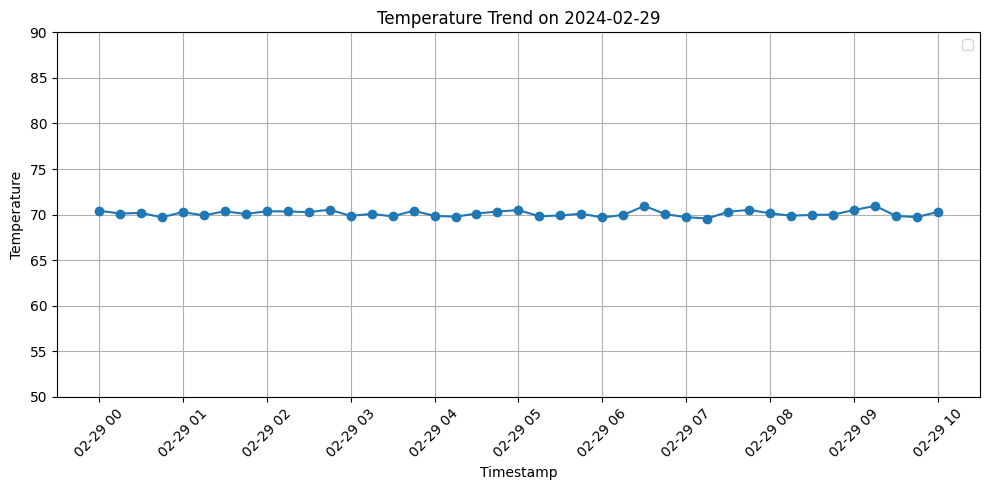

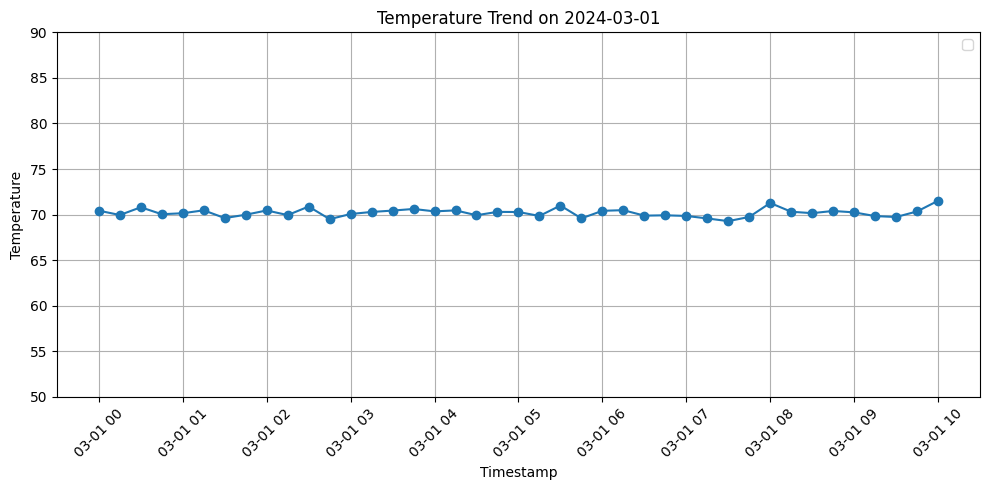

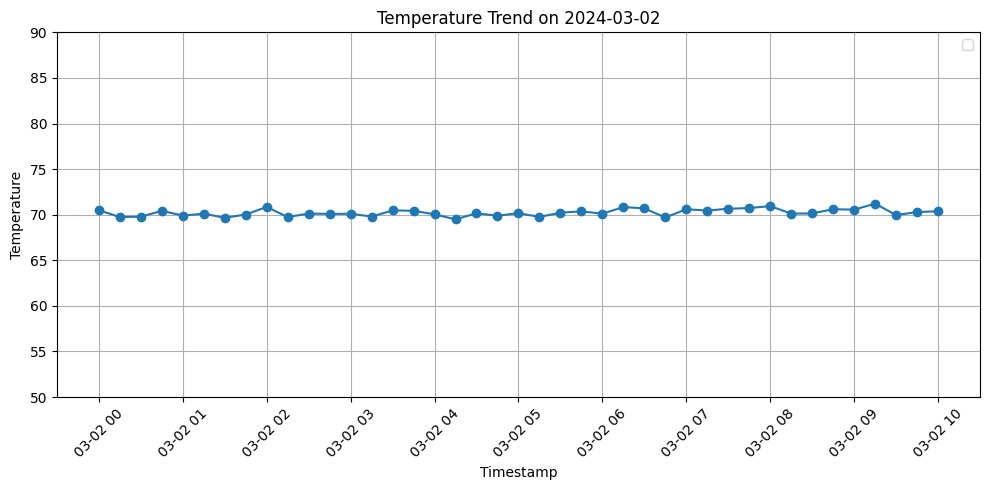

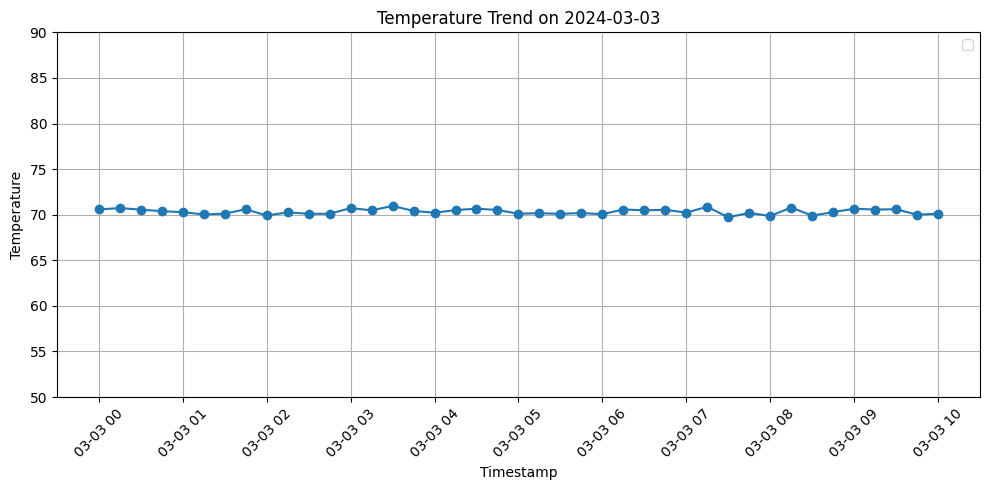

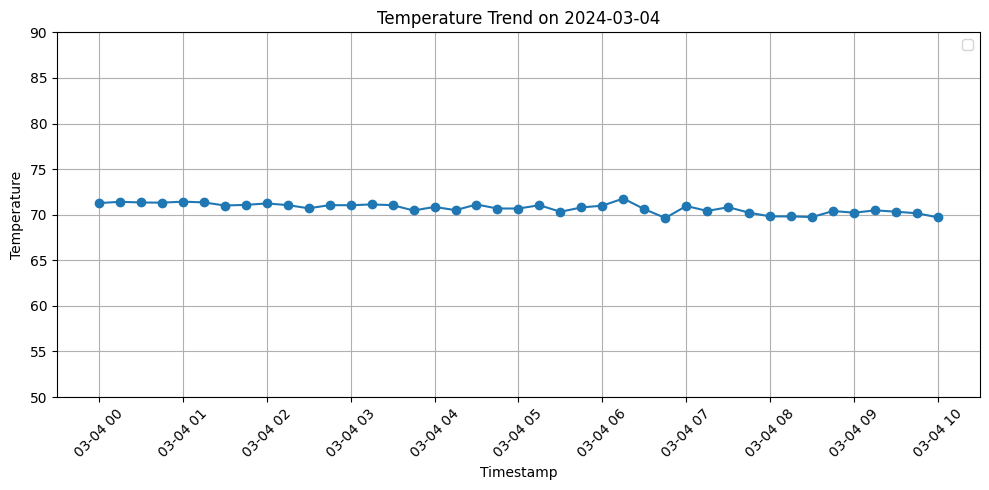

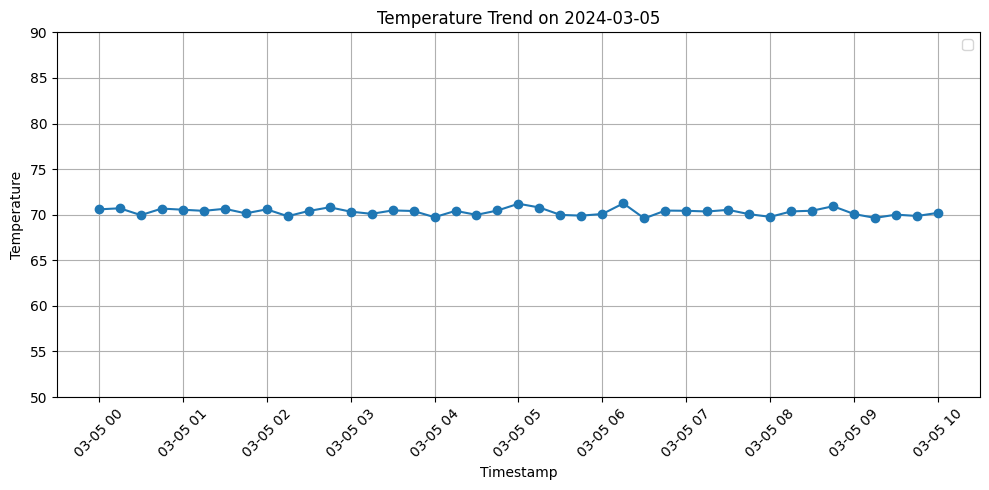

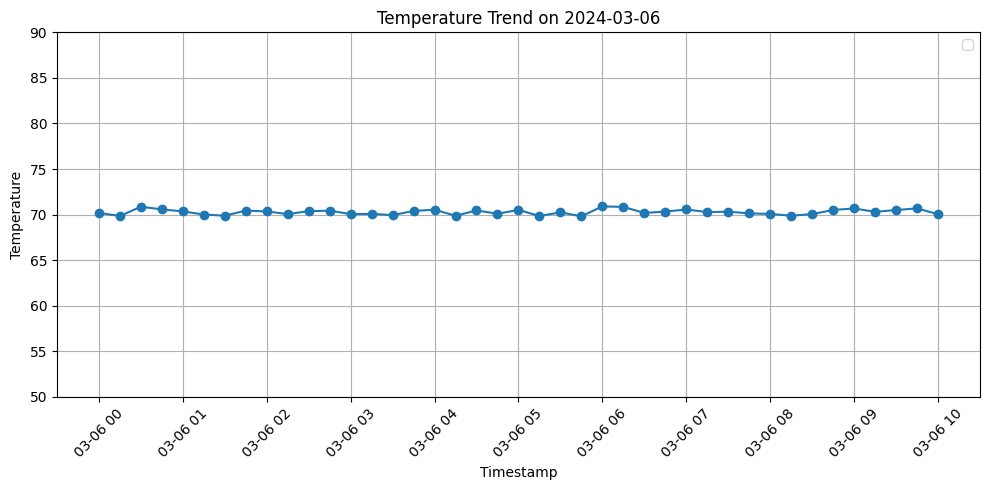

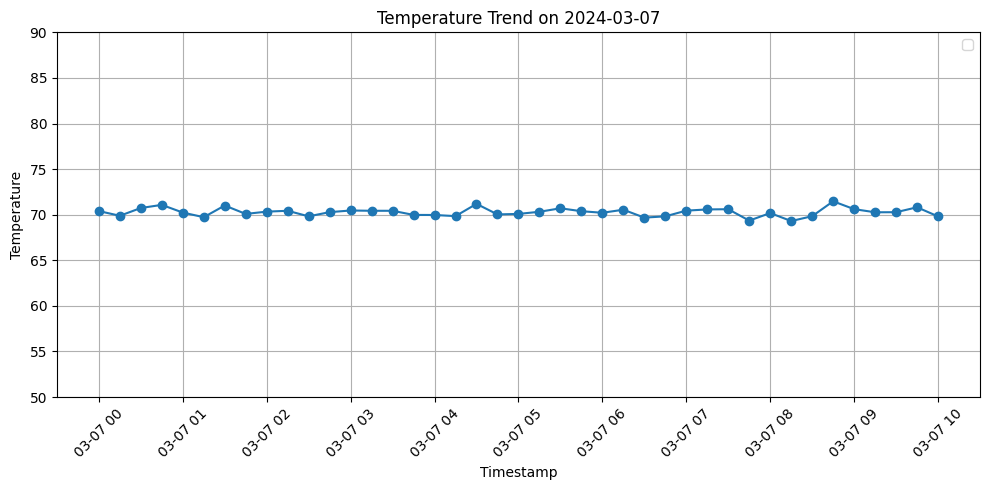

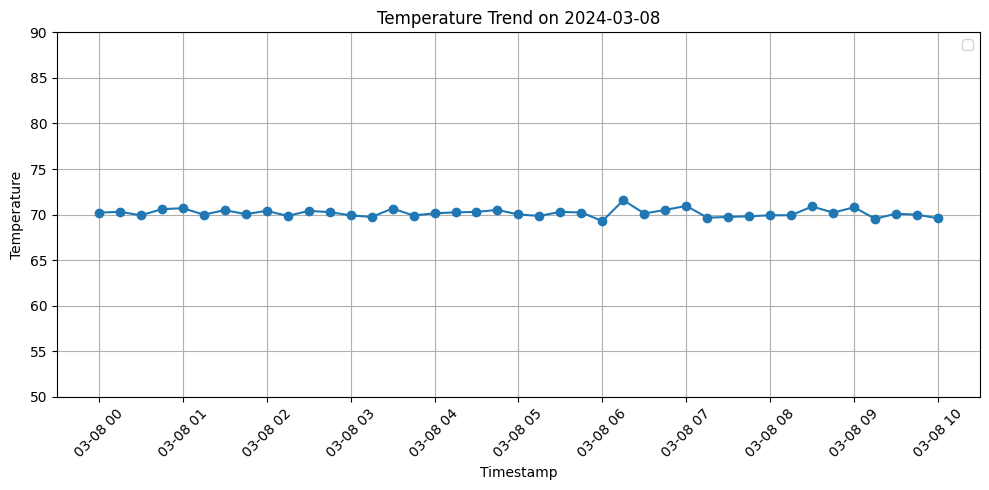

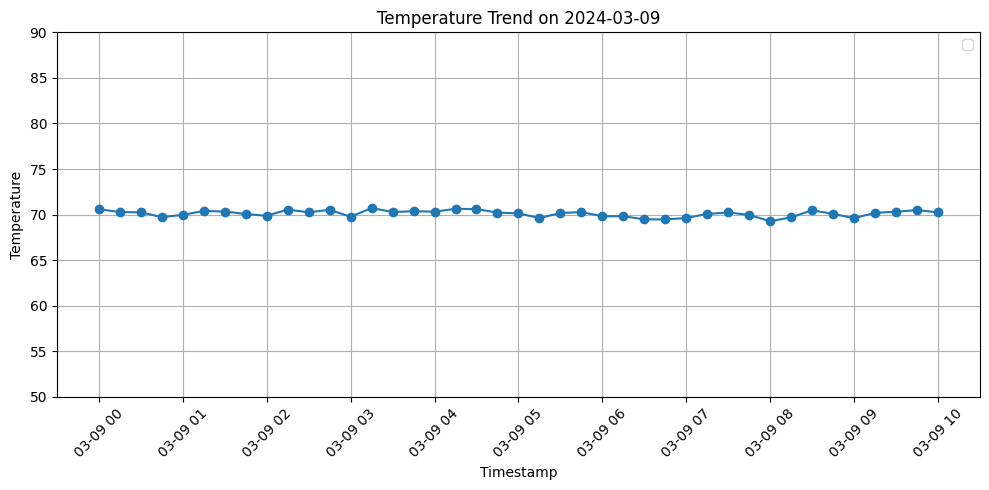

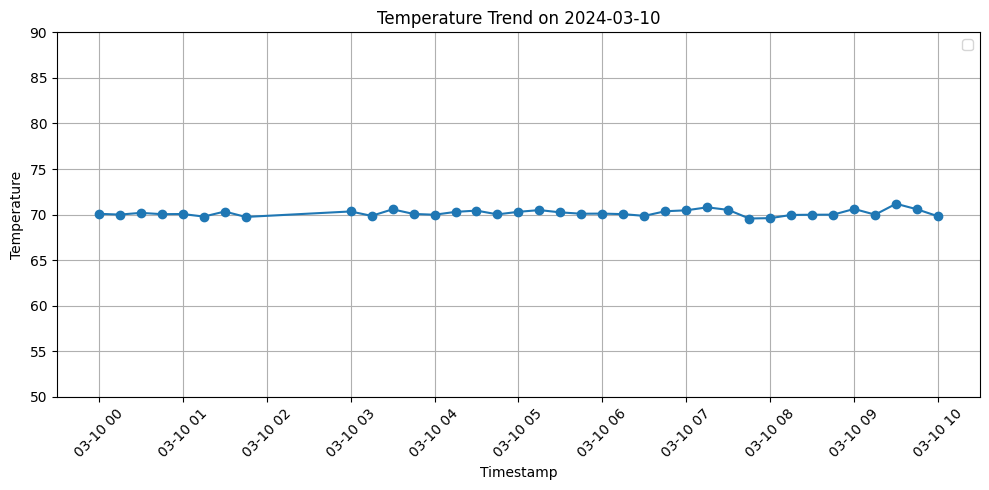

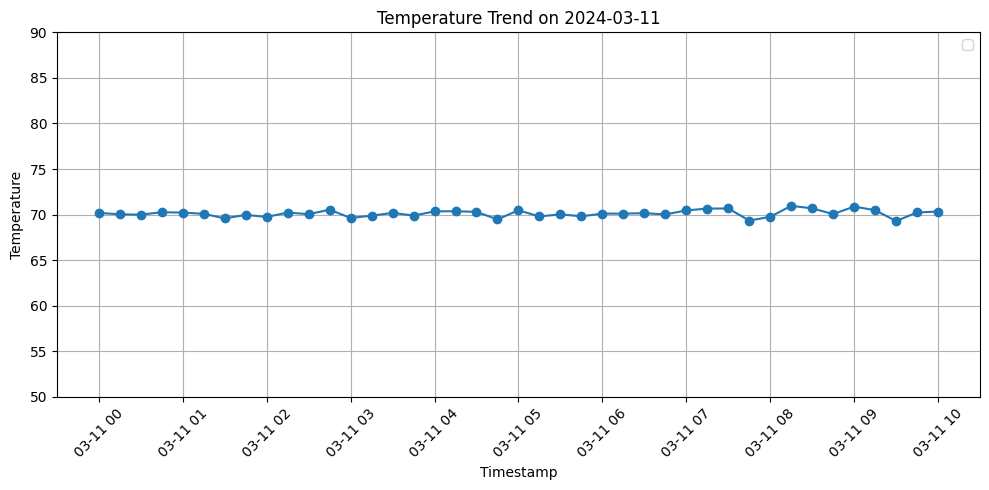

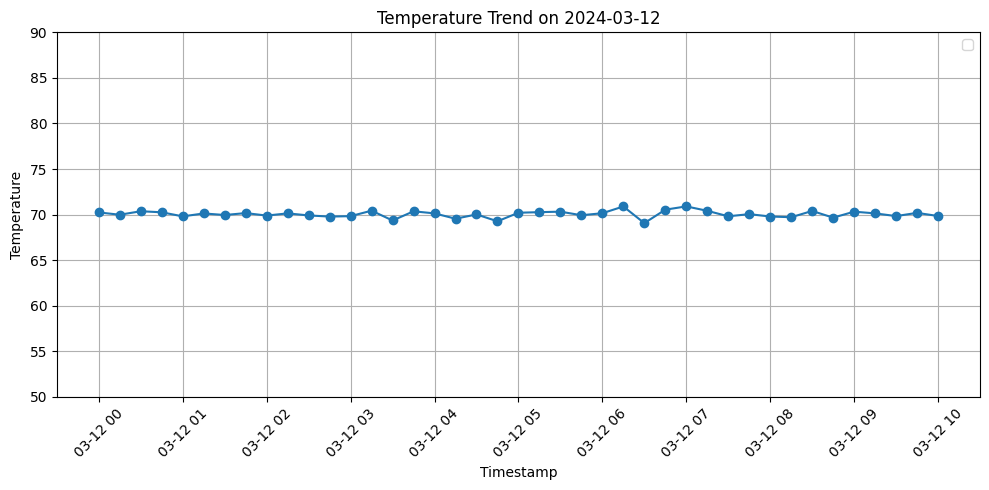

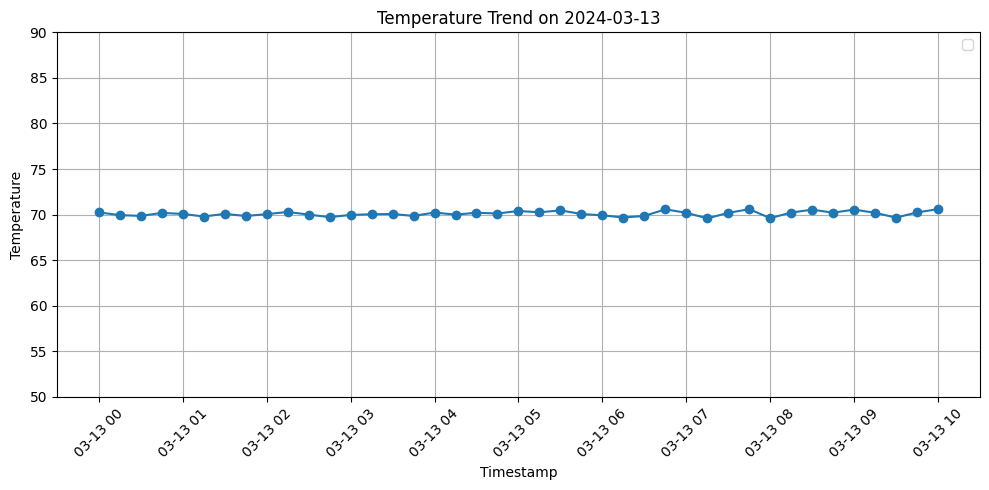

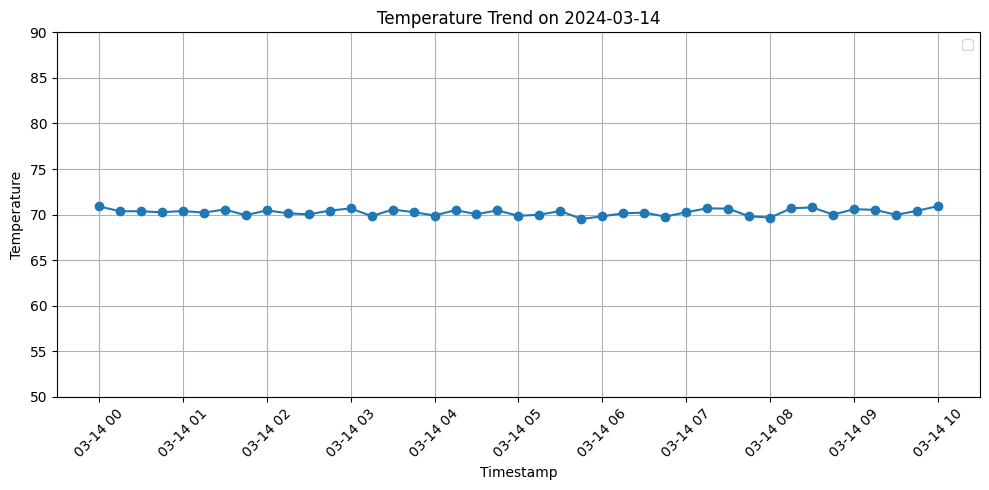

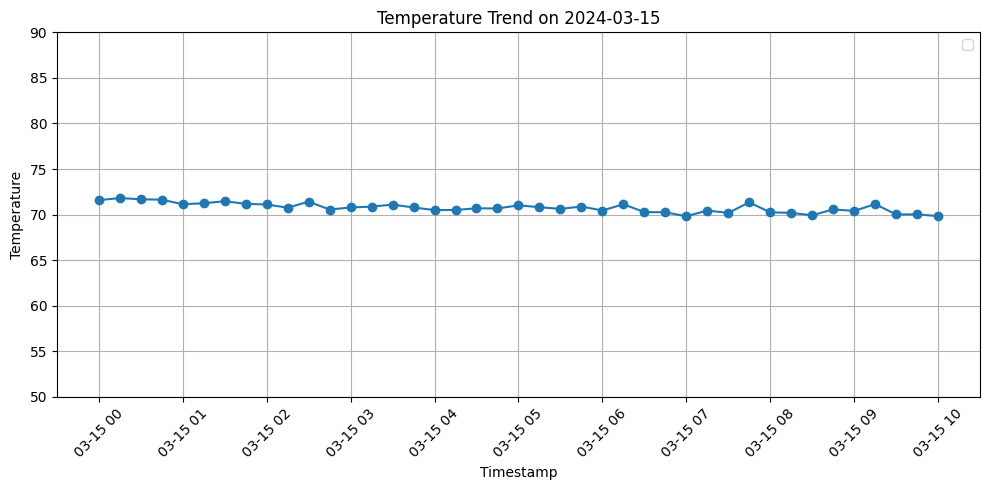

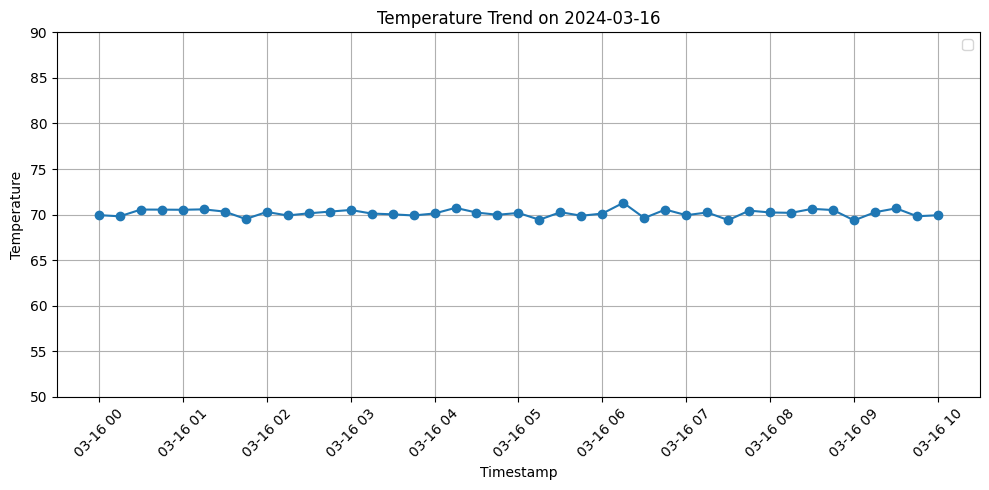

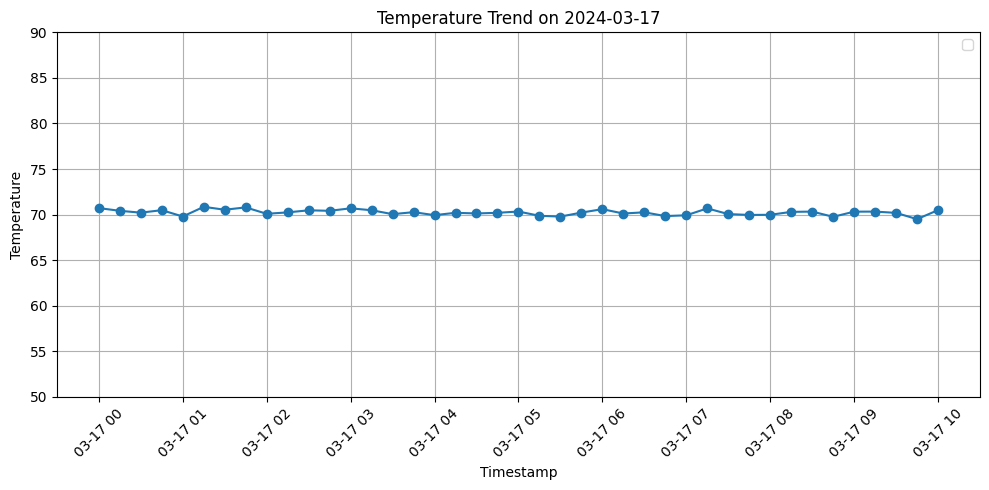

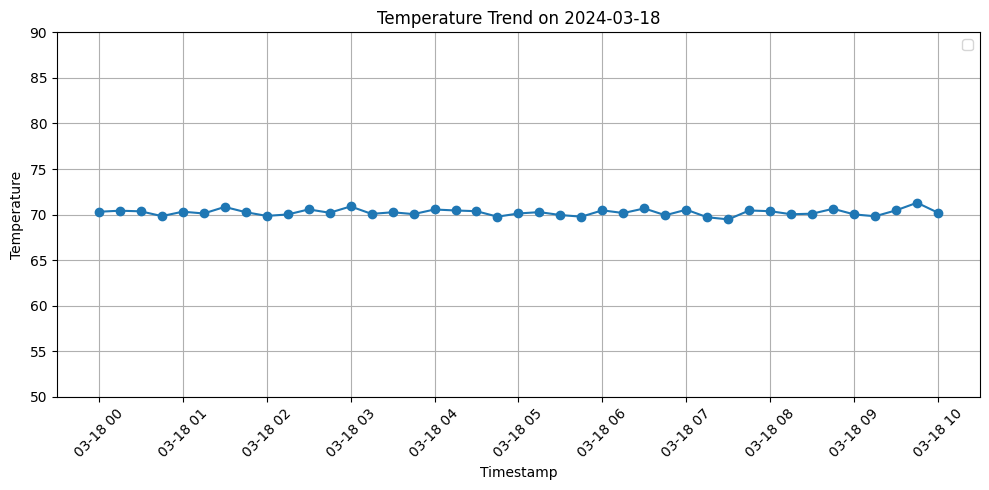

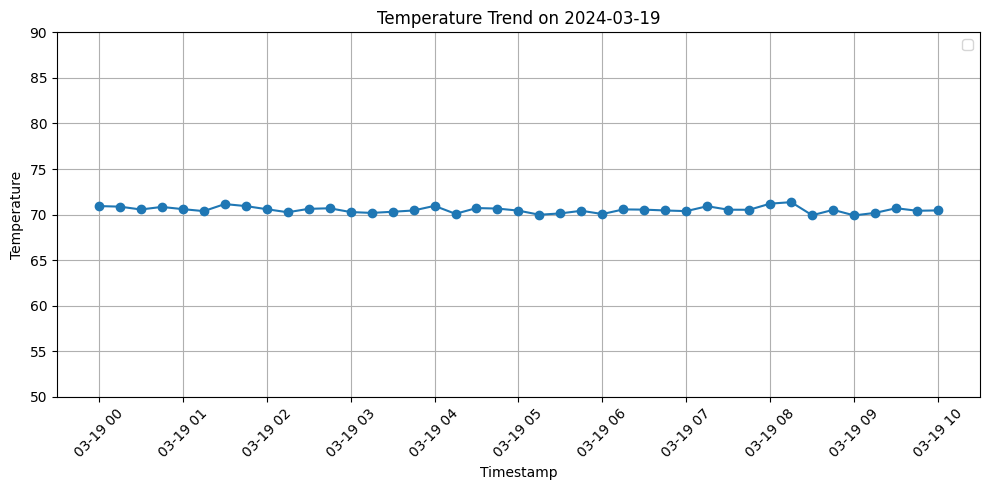

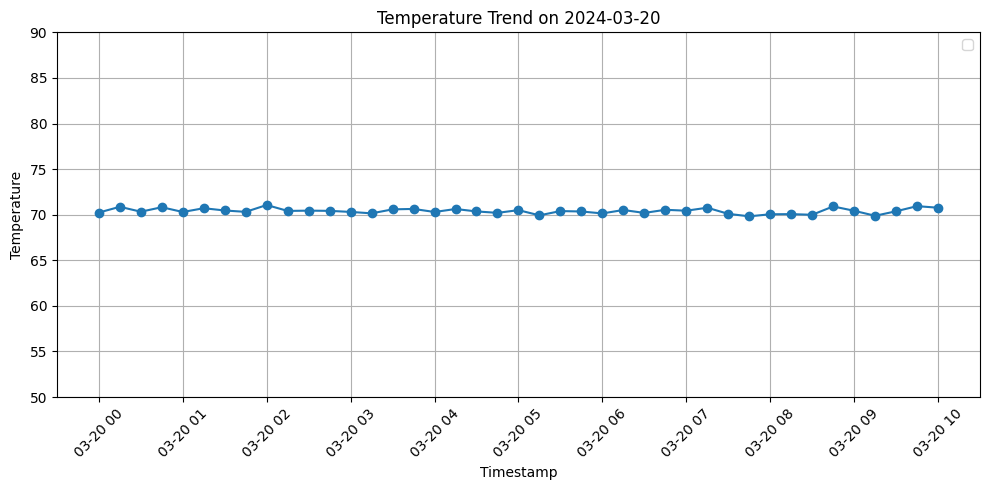

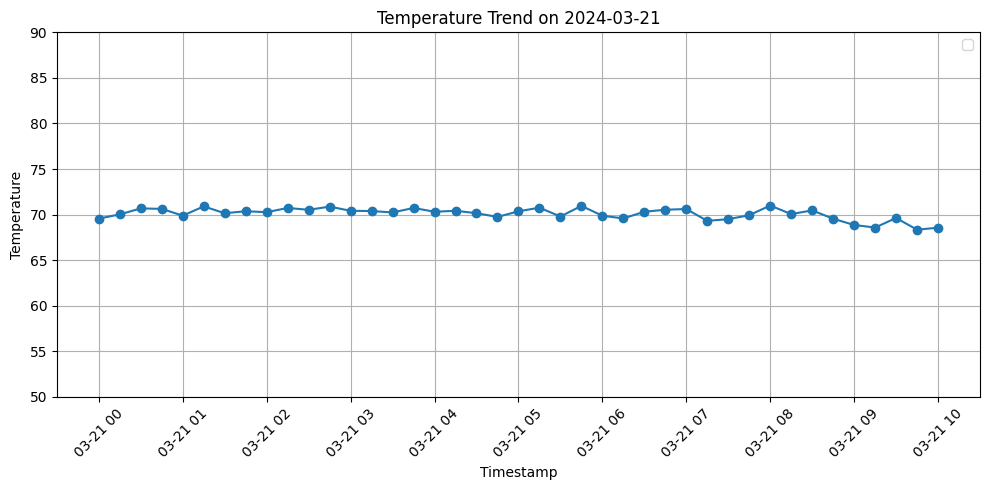

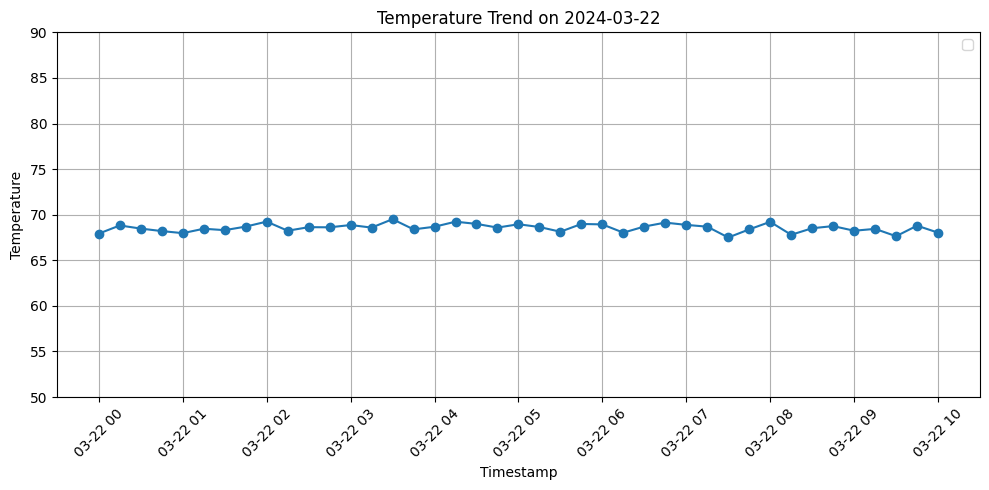

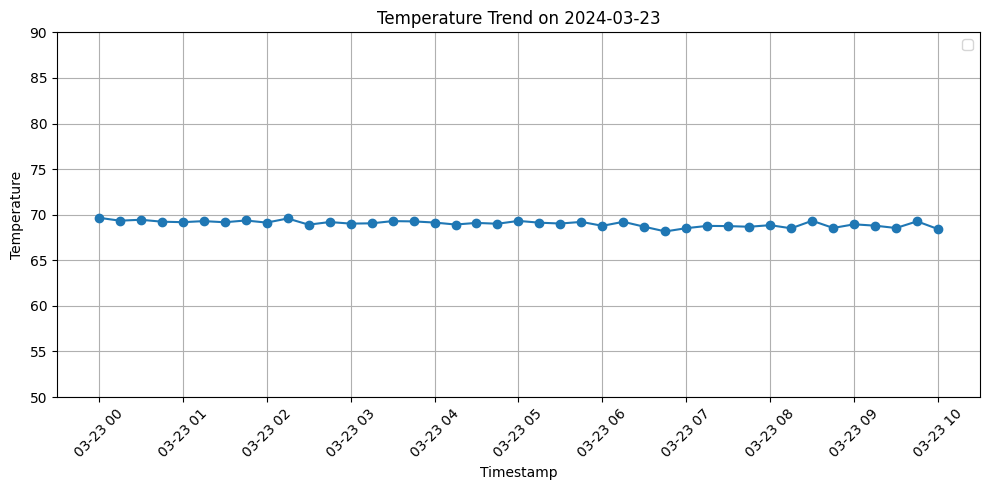

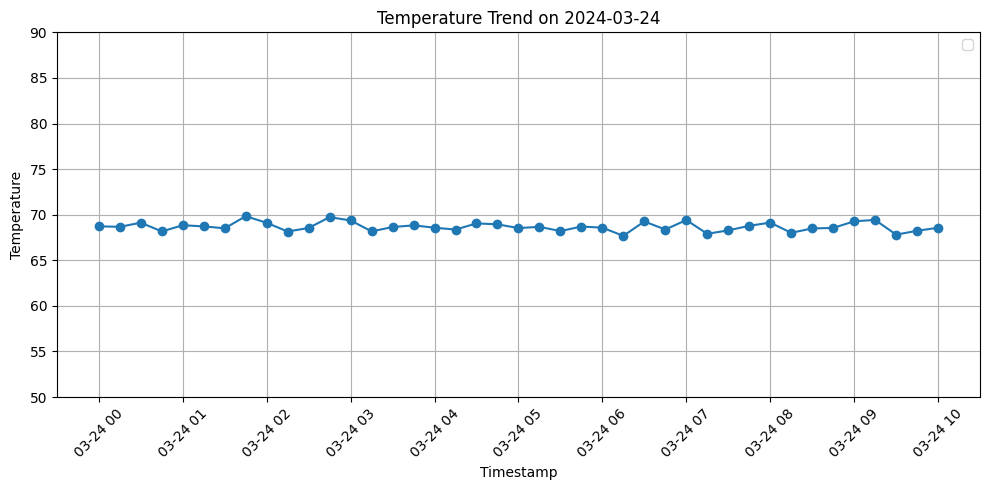

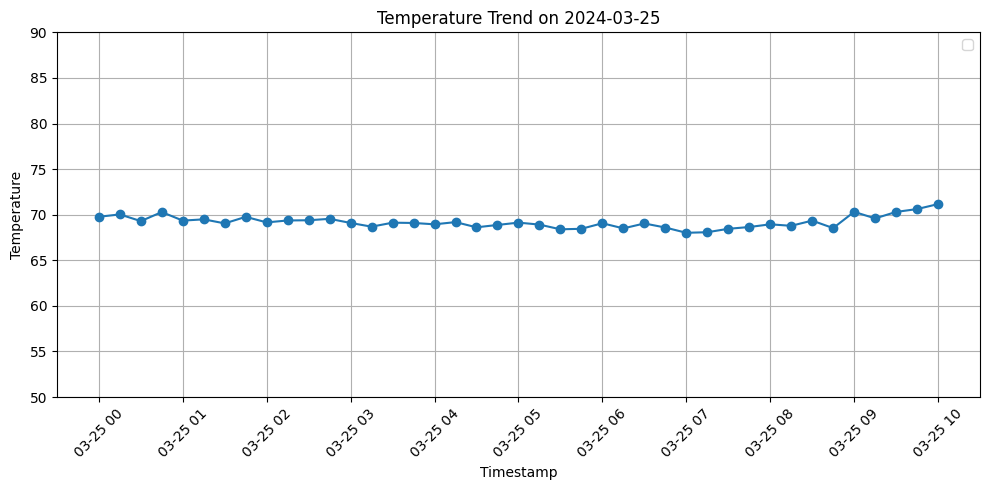

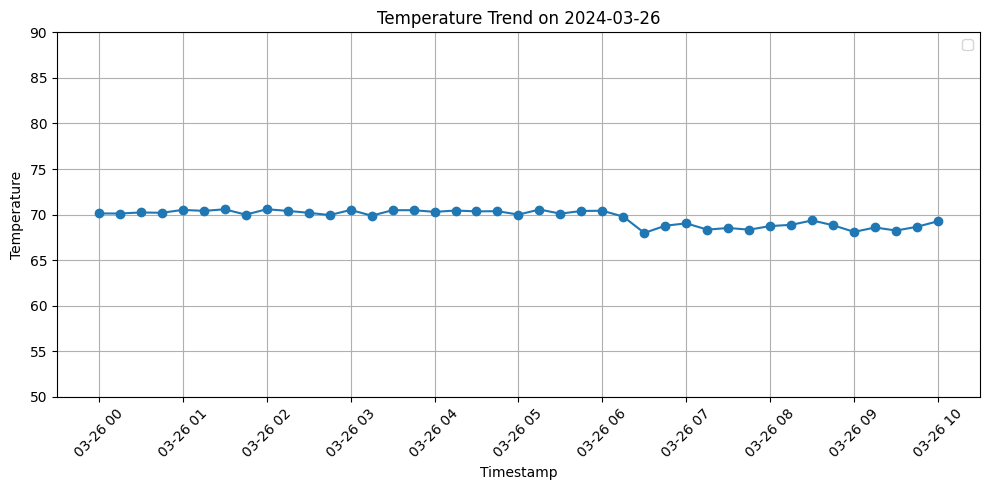

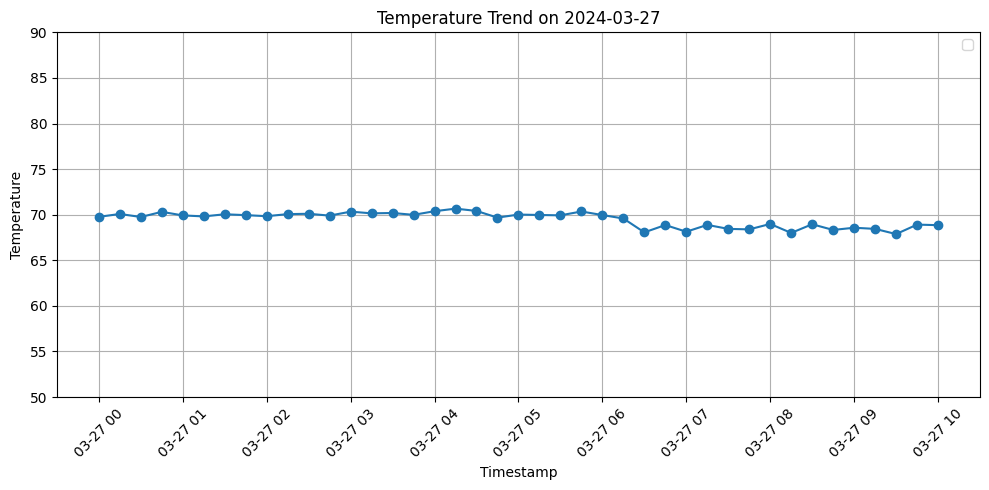

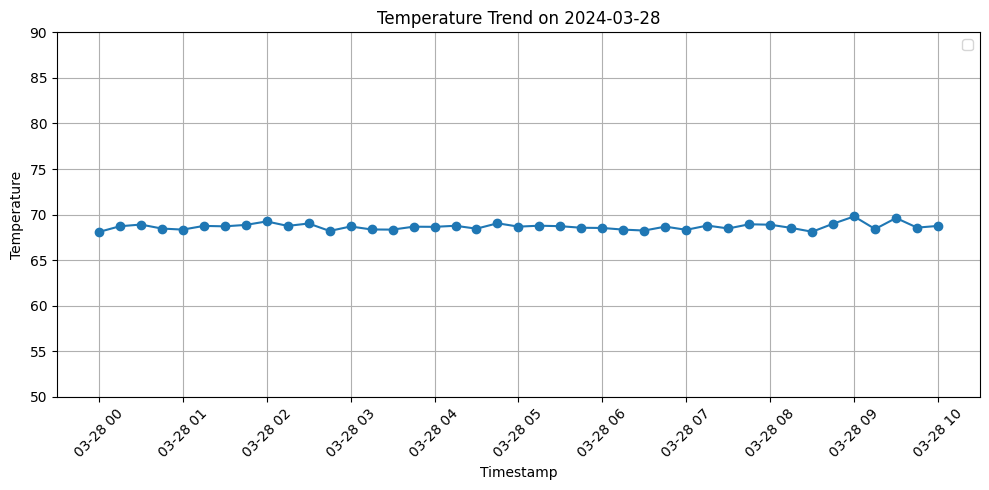

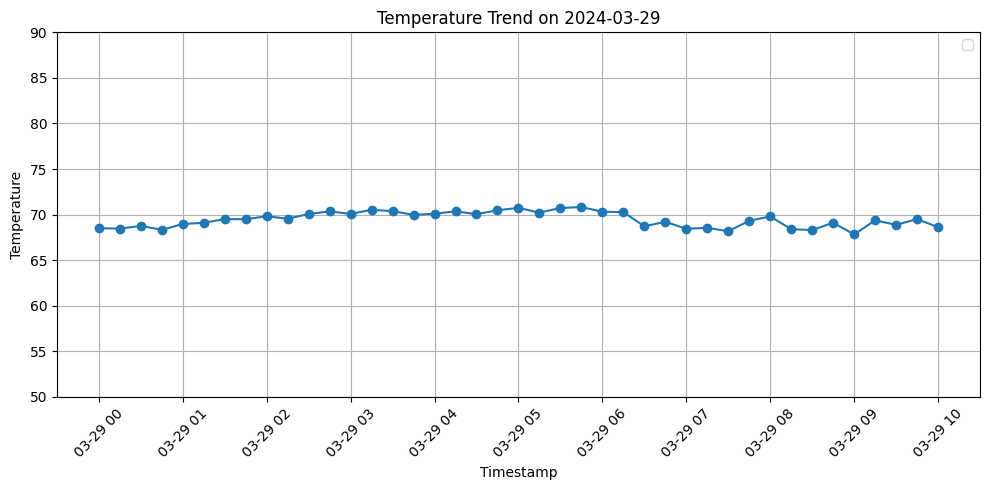

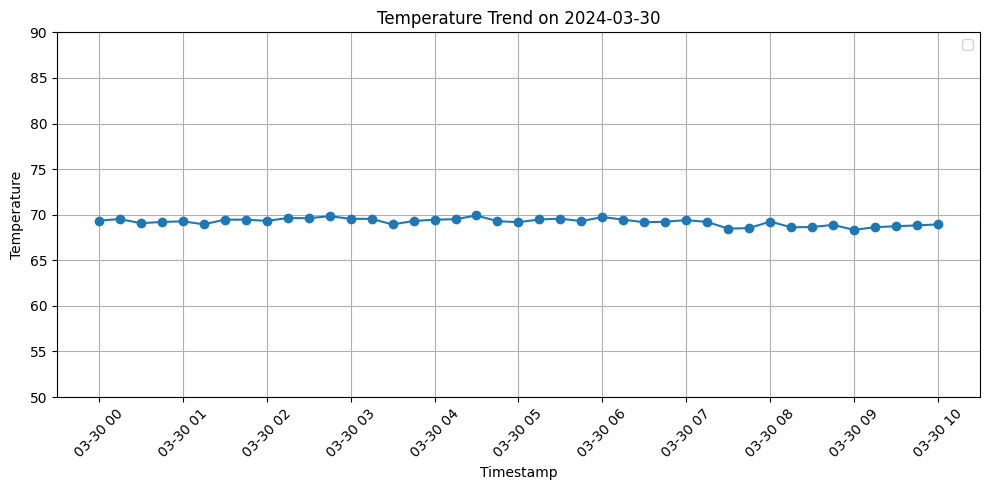

In [5]:
start_date = pd.to_datetime("2023-11-01").date()
end_date = pd.to_datetime("2024-03-30").date()
start_time = "00:00:00"
end_time = "10:00:00"
df_filtered_by_date = filtered_df[
    (filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)
]

for date in pd.date_range(start=start_date, end=end_date).date:
    daily_data  = df_filtered_by_date[(df_filtered_by_date['timestamp'].dt.date == date) & \
                                        (df_filtered_by_date['timestamp'].dt.time >= pd.to_datetime(start_time).time()) & \
                                        (df_filtered_by_date['timestamp'].dt.time <= pd.to_datetime(end_time).time())]
    
    if daily_data.empty:
        continue
    
    # Plotting placeholder
    plt.figure(figsize=(10, 5))
    plt.plot(daily_data['timestamp'], daily_data['RmTmp'], marker='o', linestyle='-')
    plt.title(f"Temperature Trend on {date}")
    plt.xlabel('Timestamp')
    plt.ylabel('Temperature')
    plt.ylim(50, 90)
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()